In [1]:
#pip install geopy


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.stats as sp
import matplotlib.pyplot as plt
import re
import json
import math
from geopy.distance import geodesic
from scipy import stats

In [3]:
df=pd.read_csv("C:/Users/dilar/Desktop/veri (2).csv")

In [4]:
df.head()

,listingId,realtyId,no,title,descriptionPhoneNumbers,description,price,currency,currencyId,startDate,...,realtyIdentificationNo,listingPropertyOrder,listingId.1,curr rency,ccurrency,enddDate,curreency,endDaate,are eas,ccurrencyId
0,78883-704,43672903,704,ÇİFTÇİ EMLAK 'tan BİLGE HAST. YANI ARA KAT ANA...,[],"<h2 style=\""text-align: center;\""><strong styl...",2500000,TL,1.0,2025-02-07T07:33:35.387+0000,...,NaN,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",78883-704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,54537-3457,42399668,3457,SAKARYA KARASU'DA YAZLIK DAİRENİZ EMRE FİLİZFİ...,[],"<p style=\""text-align: center;\""><br></p>\n<p ...",1500000,TL,1.0,2025-01-10T11:50:32.547+0000,...,NaN,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",54537-3457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,116181-160,40773651,160,"Sapanca,Kırkpınar’da Satılık 4+1 Villa",[],<p>https://app.immoviewer.com/portal/tour/2907...,19500000,TL,1.0,2025-02-05T06:56:17.923+0000,...,NaN,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",116181-160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18262-757,42174714,757,EMSALSİZ PROJE KARASU MERKEZDE HAVUZLU LÜKS 3+...,[],"<p><br></p>\n<p style=\""text-align: center;\"">...",3350000,TL,1.0,2025-02-12T12:23:38.413+0000,...,NaN,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",18262-757,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,131612-1792,44126172,1792,"3+1 MERKEZİ KONUMDA , BAHÇELİ , DENİZE YAKIN S...","[{""number"":""+905322368449"",""extension"":null,""f...",<p><strong>SATILIK OLAN VİLLA İSTANBUL'A 2 SAA...,3700000,TL,1.0,2025-02-01T09:09:15.317+0000,...,NaN,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",131612-1792,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(2180, 135)

In [6]:
df.describe

<bound method NDFrame.describe of         listingId  realtyId    no  \
0       78883-704  43672903   704   
1      54537-3457  42399668  3457   
2      116181-160  40773651   160   
3       18262-757  42174714   757   
4     131612-1792  44126172  1792   
...           ...       ...   ...   
2175   24006-2593  43617262  2593   
2176    150512-17  43793751    17   
2177    18262-750  42096198   750   
2178   121878-505  43954752   505   
2179   144178-340  44093747   340   

                                                  title  \
0     ÇİFTÇİ EMLAK 'tan BİLGE HAST. YANI ARA KAT ANA...   
1     SAKARYA KARASU'DA YAZLIK DAİRENİZ EMRE FİLİZFİ...   
2                Sapanca,Kırkpınar’da Satılık 4+1 Villa   
3     EMSALSİZ PROJE KARASU MERKEZDE HAVUZLU LÜKS 3+...   
4     3+1 MERKEZİ KONUMDA , BAHÇELİ , DENİZE YAKIN S...   
...                                                 ...   
2175  **BU FIRSAT KAÇMAZ**KARASU SAHİLDE DENİZE 2.PA...   
2176  GEYVE EMLAKTAN PAMUKOVA MERKEZ DE SATILIK 3

In [7]:
print(df.isnull().sum())

listingId                     0
realtyId                      0
no                            0
title                         0
descriptionPhoneNumbers       0
                           ... 
enddDate                   2179
curreency                  2179
endDaate                   2179
are   eas                  2179
ccurrencyId                2179
Length: 135, dtype: int64


In [8]:
df.dropna(axis=1, how='all') 
#Eğer bir sütunun tüm değerleri eksikse (hepsi NaN ise), o sütunu sil.
#(Eğer sadece bazıları NaN ise, o sütun kalır.)

,listingId,realtyId,no,title,descriptionPhoneNumbers,description,price,currency,currencyId,startDate,...,realtyIdentificationNo,listingPropertyOrder,listingId.1,curr rency,ccurrency,enddDate,curreency,endDaate,are eas,ccurrencyId
0,78883-704,43672903,704,ÇİFTÇİ EMLAK 'tan BİLGE HAST. YANI ARA KAT ANA...,[],"<h2 style=\""text-align: center;\""><strong styl...",2500000,TL,1.0,2025-02-07T07:33:35.387+0000,...,NaN,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",78883-704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,54537-3457,42399668,3457,SAKARYA KARASU'DA YAZLIK DAİRENİZ EMRE FİLİZFİ...,[],"<p style=\""text-align: center;\""><br></p>\n<p ...",1500000,TL,1.0,2025-01-10T11:50:32.547+0000,...,NaN,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",54537-3457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,116181-160,40773651,160,"Sapanca,Kırkpınar’da Satılık 4+1 Villa",[],<p>https://app.immoviewer.com/portal/tour/2907...,19500000,TL,1.0,2025-02-05T06:56:17.923+0000,...,NaN,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",116181-160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18262-757,42174714,757,EMSALSİZ PROJE KARASU MERKEZDE HAVUZLU LÜKS 3+...,[],"<p><br></p>\n<p style=\""text-align: center;\"">...",3350000,TL,1.0,2025-02-12T12:23:38.413+0000,...,NaN,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",18262-757,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,131612-1792,44126172,1792,"3+1 MERKEZİ KONUMDA , BAHÇELİ , DENİZE YAKIN S...","[{""number"":""+905322368449"",""extension"":null,""f...",<p><strong>SATILIK OLAN VİLLA İSTANBUL'A 2 SAA...,3700000,TL,1.0,2025-02-01T09:09:15.317+0000,...,NaN,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",131612-1792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,24006-2593,43617262,2593,**BU FIRSAT KAÇMAZ**KARASU SAHİLDE DENİZE 2.PA...,"[{""number"":""+905323884886"",""extension"":null,""f...","<p style=\""text-align: center;\""><strong style...",1785000,TL,1.0,2024-12-31T07:31:10.250+0000,...,NaN,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",24006-2593,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2176,150512-17,43793751,17,GEYVE EMLAKTAN PAMUKOVA MERKEZ DE SATILIK 3+1 ...,"[{""number"":""+905061575355"",""extension"":null,""f...",<p>GEYVE EMLAKTAN PAMUKOVA ÇARŞI MERKEZ DE 3+1...,2849000,TL,1.0,2025-02-24T23:58:02.690+0000,...,NaN,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",150512-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2177,18262-750,42096198,750,KIR YAPI İNŞAAT'TAN SON 2 VİLLA MÜSTAKİL BAHÇE...,"[{""number"":""+905442228854"",""extension"":null,""f...","<p style=\""text-align: center;\""><strong>KIROĞ...",7500000,TL,1.0,2025-02-24T05:53:44.107+0000,...,NaN,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",18262-750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,121878-505,43954752,505,KARASU'DA EN UCUZ DENİZ GÖREN 2 +1 MUTFAK AYRI...,"[{""number"":""+902163434313"",""extension"":null,""f...","<p><br></p> \n<p><br></p> \n<p style=\""color:r...",1650000,TL,1.0,2024-12-29T13:53:03.117+0000,...,NaN,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",121878-505,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(df.isnull().sum())

listingId                     0
realtyId                      0
no                            0
title                         0
descriptionPhoneNumbers       0
                           ... 
enddDate                   2179
curreency                  2179
endDaate                   2179
are   eas                  2179
ccurrencyId                2179
Length: 135, dtype: int64


In [10]:
threshold= 0.95
df= df.loc[:, df.isnull().mean()< threshold]

In [11]:
print(df.isnull().sum())

listingId                  0
realtyId                   0
no                         0
title                      0
descriptionPhoneNumbers    0
                          ..
petAllowed                 0
doubleBedCount             0
singleBedCount             0
listingPropertyOrder       0
listingId.1                0
Length: 84, dtype: int64


In [12]:
df.shape

(2180, 84)

In [13]:
df.tail()

,listingId,realtyId,no,title,descriptionPhoneNumbers,description,price,currency,currencyId,startDate,...,entertainmentAllowed,guestCount,invoiceIncluded,maximumStay,minimumStay,petAllowed,doubleBedCount,singleBedCount,listingPropertyOrder,listingId.1
2175,24006-2593,43617262,2593,**BU FIRSAT KAÇMAZ**KARASU SAHİLDE DENİZE 2.PA...,"[{""number"":""+905323884886"",""extension"":null,""f...","<p style=\""text-align: center;\""><strong style...",1785000,TL,1.0,2024-12-31T07:31:10.250+0000,...,False,0,False,0,0,False,0,0,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",24006-2593
2176,150512-17,43793751,17,GEYVE EMLAKTAN PAMUKOVA MERKEZ DE SATILIK 3+1 ...,"[{""number"":""+905061575355"",""extension"":null,""f...",<p>GEYVE EMLAKTAN PAMUKOVA ÇARŞI MERKEZ DE 3+1...,2849000,TL,1.0,2025-02-24T23:58:02.690+0000,...,False,0,False,0,0,False,0,0,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",150512-17
2177,18262-750,42096198,750,KIR YAPI İNŞAAT'TAN SON 2 VİLLA MÜSTAKİL BAHÇE...,"[{""number"":""+905442228854"",""extension"":null,""f...","<p style=\""text-align: center;\""><strong>KIROĞ...",7500000,TL,1.0,2025-02-24T05:53:44.107+0000,...,False,0,False,0,0,False,0,0,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",18262-750
2178,121878-505,43954752,505,KARASU'DA EN UCUZ DENİZ GÖREN 2 +1 MUTFAK AYRI...,"[{""number"":""+902163434313"",""extension"":null,""f...","<p><br></p> \n<p><br></p> \n<p style=\""color:r...",1650000,TL,1.0,2024-12-29T13:53:03.117+0000,...,False,0,False,0,0,False,0,0,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",121878-505
2179,144178-340,44093747,340,KARASU KAYMAKAMLIK KARŞISINDA EŞYALI 4+1 FIRSA...,"[{""number"":""+905423829171"",""extension"":null,""f...","<h2><strong style=\""color: rgb(255, 255, 255);...",1250000,TL,1.0,2025-01-25T11:43:45.110+0000,...,False,0,False,0,0,False,0,0,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",144178-340


In [14]:
only_zero_cols=df.columns[(df==0).all()]
df=df.drop(columns=only_zero_cols)

In [15]:
df.shape

(2180, 74)

In [16]:
print(df['tagProducts'])

0       []
1       []
2       []
3       []
4       []
        ..
2175    []
2176    []
2177    []
2178    []
2179    []
Name: tagProducts, Length: 2180, dtype: object


In [17]:
df=df.drop(columns=['tagProducts'])

In [18]:
df=df.drop(columns=['featuringProducts'])

In [19]:
df=df.drop(columns=['floorAreaRatio'])

In [20]:
df=df.drop(columns=['currencyId'])

In [21]:
df.head()

,listingId,realtyId,no,title,descriptionPhoneNumbers,description,price,currency,startDate,endDate,...,isVideoTypeVimeo,stale,searchScore,whatsAppNumber,onlineVisit,hasBranded,hasUpdateBooster,registerState,listingPropertyOrder,listingId.1
0,78883-704,43672903,704,ÇİFTÇİ EMLAK 'tan BİLGE HAST. YANI ARA KAT ANA...,[],"<h2 style=\""text-align: center;\""><strong styl...",2500000,TL,2025-02-07T07:33:35.387+0000,2025-05-08T07:33:35.387+0000,...,False,False,NaN,"{""countryCode"":""+90"",""areaCode"":""545"",""phoneNu...",True,False,False,Kat Mülkiyeti,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",78883-704
1,54537-3457,42399668,3457,SAKARYA KARASU'DA YAZLIK DAİRENİZ EMRE FİLİZFİ...,[],"<p style=\""text-align: center;\""><br></p>\n<p ...",1500000,TL,2025-01-10T11:50:32.547+0000,2025-04-13T08:24:27.627+0000,...,False,False,NaN,"{""countryCode"":""+90"",""areaCode"":""546"",""phoneNu...",False,True,False,Kat Mülkiyeti,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",54537-3457
2,116181-160,40773651,160,"Sapanca,Kırkpınar’da Satılık 4+1 Villa",[],<p>https://app.immoviewer.com/portal/tour/2907...,19500000,TL,2025-02-05T06:56:17.923+0000,2025-05-06T06:56:17.923+0000,...,False,False,50.385391,"{""countryCode"":""+90"",""areaCode"":""539"",""phoneNu...",True,False,False,Kat Mülkiyeti,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",116181-160
3,18262-757,42174714,757,EMSALSİZ PROJE KARASU MERKEZDE HAVUZLU LÜKS 3+...,[],"<p><br></p>\n<p style=\""text-align: center;\"">...",3350000,TL,2025-02-12T12:23:38.413+0000,2025-05-13T13:02:20.187+0000,...,False,False,28.141878,"{""countryCode"":""+90"",""areaCode"":""544"",""phoneNu...",True,True,False,Kat İrtifakı,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",18262-757
4,131612-1792,44126172,1792,"3+1 MERKEZİ KONUMDA , BAHÇELİ , DENİZE YAKIN S...","[{""number"":""+905322368449"",""extension"":null,""f...",<p><strong>SATILIK OLAN VİLLA İSTANBUL'A 2 SAA...,3700000,TL,2025-02-01T09:09:15.317+0000,2025-05-02T09:09:15.317+0000,...,False,False,NaN,"{""countryCode"":""+90"",""areaCode"":""532"",""phoneNu...",True,False,False,Kat Mülkiyeti,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",131612-1792


In [22]:
df['currency'] = df['currency'].str.upper().replace('TRY','TL')

In [23]:
all_true_cols=df.columns[(df==True).all()]
print(list(all_true_cols))

[]


In [24]:
all_false_cols=df.columns[(df==False).all()]
print(list(all_false_cols))

[]


In [25]:
df.dtypes

listingId                  object
realtyId                    int64
no                          int64
title                      object
descriptionPhoneNumbers    object
                            ...  
hasBranded                   bool
hasUpdateBooster             bool
registerState              object
listingPropertyOrder       object
listingId.1                object
Length: 70, dtype: object

In [26]:
print(df.columns.tolist())

['listingId', 'realtyId', 'no', 'title', 'descriptionPhoneNumbers', 'description', 'price', 'currency', 'startDate', 'endDate', 'contact', 'images', 'areas', 'district', 'county', 'city', 'residence', 'timeShareName', 'room', 'livingRoom', 'bathRoom', 'isMapHidden', 'mapLocation', 'streetView', 'createdDate', 'updatedDate', 'listingUpdatedDate', 'sqm', 'numberOfBuilding', 'entranceHeight', 'bedCount', 'floor', 'age', 'heating', 'fuel', 'build', 'buildState', 'land', 'usage', 'credit', 'deposit', 'barter', 'byTransfer', 'landRegisterName', 'housingComplex', 'rental', 'authorizedRealtor', 'furnished', 'detailUrl', 'redirectLink', 'detailDescription', 'firm', 'firmUser', 'category', 'subCategory', 'attributes', 'mainCategory', 'fee', 'sides', 'roomAndLivingRoom', 'isVideoTypeVimeo', 'stale', 'searchScore', 'whatsAppNumber', 'onlineVisit', 'hasBranded', 'hasUpdateBooster', 'registerState', 'listingPropertyOrder', 'listingId.1']


In [27]:
df['image_count'] = df['images'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)

# Toplam görsel sayısını hesapla
total_images = df['image_count'].sum()

print("Toplam yuklenen resim sayisi:",total_images)

Toplam yuklenen resim sayisi: 58974


In [28]:
df=df.drop(columns=['images'])

In [29]:
yonler = ['kuzey', 'guney', 'dogu', 'bati']

df['bulunan_yonler'] = df['sides'].apply(
    lambda x: ', '.join([y for y in yonler if y in str(x).lower()])
)

In [30]:
print(df['bulunan_yonler'])

0       kuzey
1       kuzey
2            
3            
4            
        ...  
2175    kuzey
2176         
2177    kuzey
2178         
2179    kuzey
Name: bulunan_yonler, Length: 2180, dtype: object


In [31]:
df=df.drop(columns=['sides'])

In [32]:
df.head()

,listingId,realtyId,no,title,descriptionPhoneNumbers,description,price,currency,startDate,endDate,...,searchScore,whatsAppNumber,onlineVisit,hasBranded,hasUpdateBooster,registerState,listingPropertyOrder,listingId.1,image_count,bulunan_yonler
0,78883-704,43672903,704,ÇİFTÇİ EMLAK 'tan BİLGE HAST. YANI ARA KAT ANA...,[],"<h2 style=\""text-align: center;\""><strong styl...",2500000,TL,2025-02-07T07:33:35.387+0000,2025-05-08T07:33:35.387+0000,...,NaN,"{""countryCode"":""+90"",""areaCode"":""545"",""phoneNu...",True,False,False,Kat Mülkiyeti,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",78883-704,21,kuzey
1,54537-3457,42399668,3457,SAKARYA KARASU'DA YAZLIK DAİRENİZ EMRE FİLİZFİ...,[],"<p style=\""text-align: center;\""><br></p>\n<p ...",1500000,TL,2025-01-10T11:50:32.547+0000,2025-04-13T08:24:27.627+0000,...,NaN,"{""countryCode"":""+90"",""areaCode"":""546"",""phoneNu...",False,True,False,Kat Mülkiyeti,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",54537-3457,22,kuzey
2,116181-160,40773651,160,"Sapanca,Kırkpınar’da Satılık 4+1 Villa",[],<p>https://app.immoviewer.com/portal/tour/2907...,19500000,TL,2025-02-05T06:56:17.923+0000,2025-05-06T06:56:17.923+0000,...,50.385391,"{""countryCode"":""+90"",""areaCode"":""539"",""phoneNu...",True,False,False,Kat Mülkiyeti,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",116181-160,15,
3,18262-757,42174714,757,EMSALSİZ PROJE KARASU MERKEZDE HAVUZLU LÜKS 3+...,[],"<p><br></p>\n<p style=\""text-align: center;\"">...",3350000,TL,2025-02-12T12:23:38.413+0000,2025-05-13T13:02:20.187+0000,...,28.141878,"{""countryCode"":""+90"",""areaCode"":""544"",""phoneNu...",True,True,False,Kat İrtifakı,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",18262-757,18,
4,131612-1792,44126172,1792,"3+1 MERKEZİ KONUMDA , BAHÇELİ , DENİZE YAKIN S...","[{""number"":""+905322368449"",""extension"":null,""f...",<p><strong>SATILIK OLAN VİLLA İSTANBUL'A 2 SAA...,3700000,TL,2025-02-01T09:09:15.317+0000,2025-05-02T09:09:15.317+0000,...,NaN,"{""countryCode"":""+90"",""areaCode"":""532"",""phoneNu...",True,False,False,Kat Mülkiyeti,"{""fuelName"":15,""city"":2,""roomAndLivingRoom"":8,...",131612-1792,60,


In [33]:
df.shape

(2180, 70)

In [34]:

# Sütun isimlerini al
sutunlar = df.columns

# .txt dosyasına yaz
with open("sutun_isimleri.txt", "w", encoding="utf-8") as f:
    for isim in sutunlar:
        f.write(isim + "\n")

print("Sütun isimleri 'sutun_isimleri.txt' dosyasına yazıldı.")

Sütun isimleri 'sutun_isimleri.txt' dosyasına yazıldı.


In [35]:
print(df.columns.tolist())

['listingId', 'realtyId', 'no', 'title', 'descriptionPhoneNumbers', 'description', 'price', 'currency', 'startDate', 'endDate', 'contact', 'areas', 'district', 'county', 'city', 'residence', 'timeShareName', 'room', 'livingRoom', 'bathRoom', 'isMapHidden', 'mapLocation', 'streetView', 'createdDate', 'updatedDate', 'listingUpdatedDate', 'sqm', 'numberOfBuilding', 'entranceHeight', 'bedCount', 'floor', 'age', 'heating', 'fuel', 'build', 'buildState', 'land', 'usage', 'credit', 'deposit', 'barter', 'byTransfer', 'landRegisterName', 'housingComplex', 'rental', 'authorizedRealtor', 'furnished', 'detailUrl', 'redirectLink', 'detailDescription', 'firm', 'firmUser', 'category', 'subCategory', 'attributes', 'mainCategory', 'fee', 'roomAndLivingRoom', 'isVideoTypeVimeo', 'stale', 'searchScore', 'whatsAppNumber', 'onlineVisit', 'hasBranded', 'hasUpdateBooster', 'registerState', 'listingPropertyOrder', 'listingId.1', 'image_count', 'bulunan_yonler']


In [36]:
df.shape

(2180, 70)

Aşağıdaki sütunlar veri setinden çıkarılmıştır. Gerekçeleri her maddeyle birlikte açıklanmıştır:
- **`realtyId`**:  
  ➤ bir kimlik (ID) sütunudur kullanılmayacağı için kaldırılmıştır.

- **`listingId.1`**:  
  ➤ Tekrarlayan bir kimlik (ID) sütunudur ve listingId sütununda bu bilgi yer aldığı için kaldırılmıştır.

- **`no`**:  
  ➤ İşimize yaramayan, anlamsız bir ID sütunudur. Analiz açısından katkısı olmadığından dolayı veri setinden çıkarılmıştır.

- **`title`**:  
  ➤ İçeriğinde zaten diğer sütunlarda bulunan anahtar kelimeleri barındırmaktadır. Ekstra bilgi sağlamadığı için kaldırılmıştır.

- **`recirectLink`**:  
  ➤ İlanın türünü (örneğin: daire, villa) belirtmektedir. Bu bilgi zaten ayrı bir sütun olarak mevcut olduğundan dolayı tekrarlı olduğu için çıkarılmıştır.

- **`detailUrl`**:  
  ➤ Örnek: `sakarya-karasu-yali-satilik/daire/54537-3457`  
  ➤ İçeriğinde il, ilçe, konut tipi ve listing ID gibi zaten başka sütunlarda yer alan bilgiler bulunduğundan dolayı veri setinden kaldırılmıştır.


In [37]:
df['detailUrl']

0       sakarya-adapazari-kurtulus-satilik/daire/78883...
1            sakarya-karasu-yali-satilik/daire/54537-3457
2       sakarya-sapanca-kirkpinar-soguksu-satilik/vill...
3          sakarya-karasu-kabakoz-satilik/daire/18262-757
4         sakarya-kocaali-yayla-satilik/villa/131612-1792
                              ...                        
2175         sakarya-karasu-yali-satilik/villa/24006-2593
2176     sakarya-pamukova-elperek-satilik/daire/150512-17
2177          sakarya-karasu-yeni-satilik/villa/18262-750
2178      sakarya-karasu-aziziye-satilik/daire/121878-505
2179      sakarya-karasu-incilli-satilik/daire/144178-340
Name: detailUrl, Length: 2180, dtype: object

In [38]:
import pandas as pd

def extract_details_fixed(url):
    try:
        if url.startswith("en/"):
            url = url[3:]  # "en/" kısmını bağlantının başından kaldırıyoruz

        # Bağlantıyı parçalara ayırıyoruz
        parts = url.split('/')
        
        # İlan türünü her zaman "satilik" olarak belirliyoruz
        offer_type = "satilik"
        
        # İlk parçayı '-' karakterine göre bölüyoruz
        location_part = parts[0]
        location_parts = location_part.split('-')
        
        # Şehri "sakarya" olarak belirliyoruz
        city = "sakarya"
        
        # İlçeyi "sakarya"dan sonra gelen kısımdan alıyoruz
        district = location_parts[1] if len(location_parts) > 1 else None
        
        # Mahalleyi ilçe ile "satilik" arasındaki kısımdan alıyoruz
        if "satilik" in location_parts:
            satilik_index = location_parts.index("satilik")
            neighborhood = '-'.join(location_parts[2:satilik_index]) if satilik_index > 2 else None
        else:
            neighborhood = '-'.join(location_parts[2:])  # "satilik" yoksa, geriye kalan kelimeleri alıyoruz
        
        # Emlak türü, "satilik"ten sonraki kelime olacak
        property_type = parts[1] if len(parts) > 1 else None
        
        return pd.Series([city, district, neighborhood, offer_type, property_type])
    
    except Exception as e:
        # Hata durumunda (örneğin geçersiz bağlantı)
        return pd.Series([None, None, None, None, None])

df[['city2', 'district2', 'neighborhood', 'offer_type', 'property_type']] = df['detailUrl'].apply(extract_details_fixed)

print(df[['detailUrl', 'city2', 'district2', 'neighborhood', 'offer_type', 'property_type']])


                                              detailUrl    city2  district2  \
0     sakarya-adapazari-kurtulus-satilik/daire/78883...  sakarya  adapazari   
1          sakarya-karasu-yali-satilik/daire/54537-3457  sakarya     karasu   
2     sakarya-sapanca-kirkpinar-soguksu-satilik/vill...  sakarya    sapanca   
3        sakarya-karasu-kabakoz-satilik/daire/18262-757  sakarya     karasu   
4       sakarya-kocaali-yayla-satilik/villa/131612-1792  sakarya    kocaali   
...                                                 ...      ...        ...   
2175       sakarya-karasu-yali-satilik/villa/24006-2593  sakarya     karasu   
2176   sakarya-pamukova-elperek-satilik/daire/150512-17  sakarya   pamukova   
2177        sakarya-karasu-yeni-satilik/villa/18262-750  sakarya     karasu   
2178    sakarya-karasu-aziziye-satilik/daire/121878-505  sakarya     karasu   
2179    sakarya-karasu-incilli-satilik/daire/144178-340  sakarya     karasu   

           neighborhood offer_type property_type  


In [39]:
city_counts = df['city2'].value_counts()
print(city_counts)
print()
print()

district_counts = df['district2'].value_counts()
print(district_counts)
print()
print()

neighborhood_counts = df['neighborhood'].value_counts()
print(neighborhood_counts)
print()
print()

offer_type_counts = df['offer_type'].value_counts()
print(offer_type_counts)
print()
print()

property_type_counts = df['property_type'].value_counts()
print(property_type_counts)

city2
sakarya    2180
Name: count, dtype: int64


district2
karasu        888
kocaali       339
adapazari     283
serdivan      219
sapanca       159
arifiye        58
erenler        46
hendek         42
pamukova       38
geyve          34
akyazi         31
kaynarca       11
ferizli        10
tarakli         9
sogutlu         8
karapurcek      2
silivri         1
ergene          1
pinarhisar      1
Name: count, dtype: int64


neighborhood
yali          681
aziziye       295
yeni           88
alandere       77
kemalpasa      71
             ... 
bacikoy         1
hizirtepe       1
memnuniye       1
kalburcu        1
karamanlar      1
Name: count, Length: 214, dtype: int64


offer_type
satilik    2180
Name: count, dtype: int64


property_type
daire           1306
villa            613
mustakil-ev      159
yazlik            48
bina              23
ciftlik-evi        8
bahce              5
tarla              4
imarli-konut       3
bungalov           3
prefabrik          3
kosk              

**property_type** sütunu kalıyor

In [40]:
# property_type sütunundaki değerleri düzenleme (baş harf büyük + Türkçe karakter düzeltmesi)
df['property_type'] = df['property_type'].replace({
    'daire': 'Daire',
    'villa': 'Villa',
    'mustakil-ev': 'Müstakil Ev',
    'ciftlik-evi': 'Çiftlik Evi',
    'yazlik': 'Yazlık',
    'bina': 'Bina',
    'koy-evi': 'Köy Evi',
    'bahce': 'Bahçe',
    'imarli-konut': 'İmarlı Konut',
    'tarla': 'Tarla',
    'konutticaret': 'Konut Ticaret',
    'bungalov': 'Bungalov',
    'residence': 'Villa',
    'prefabrik': 'Prefabrik',
    'kosk': 'Köşk'
})


In [41]:
print(df['property_type'].unique())

['Daire' 'Villa' 'Müstakil Ev' 'Çiftlik Evi' 'Yazlık' 'Bina' 'Köy Evi'
 'Bahçe' 'İmarlı Konut' 'Tarla' 'Konut Ticaret' 'Bungalov' 'Prefabrik'
 'Köşk']


In [42]:
df = df.drop(columns=['city2', 'district2', 'neighborhood', 'offer_type'], inplace=False) 

In [43]:
df = df.drop(columns=['realtyId','no', 'redirectLink','listingId.1'])

In [44]:
df.shape

(2180, 67)

In [45]:
df['descriptionPhoneNumbers'].isnull().sum()

0

In [46]:
df['descriptionPhoneNumbers'].isnull().sum()

In [47]:
df['descriptionPhoneNumbers'].isnull().sum()

1409

In [48]:
# 'descriptionPhoneNumbers' sütunundaki her bir satır için telefon numarasını çekme
df['descriptionPhoneNumbers'] = df['descriptionPhoneNumbers'].apply(
    lambda x: json.loads(x)[0]['number'] if x and x != '[]' else None
)

In [49]:
df['descriptionPhoneNumbers']

0                None
1                None
2                None
3                None
4       +905322368449
            ...      
2175    +905323884886
2176    +905061575355
2177    +905442228854
2178    +902163434313
2179    +905423829171
Name: descriptionPhoneNumbers, Length: 2180, dtype: object

In [50]:
df['whatsAppNumber'].isnull().sum()

91

In [51]:
df['whatsAppNumber']

0       {"countryCode":"+90","areaCode":"545","phoneNu...
1       {"countryCode":"+90","areaCode":"546","phoneNu...
2       {"countryCode":"+90","areaCode":"539","phoneNu...
3       {"countryCode":"+90","areaCode":"544","phoneNu...
4       {"countryCode":"+90","areaCode":"532","phoneNu...
                              ...                        
2175    {"countryCode":"+90","areaCode":"540","phoneNu...
2176    {"countryCode":"+90","areaCode":"506","phoneNu...
2177    {"countryCode":"+90","areaCode":"542","phoneNu...
2178    {"countryCode":"+90","areaCode":"533","phoneNu...
2179    {"countryCode":"+90","areaCode":"542","phoneNu...
Name: whatsAppNumber, Length: 2180, dtype: object

In [52]:
# 'whatsAppNumber' sütunundaki her bir satır için birleşmiş telefon numarasını alma
df['whatsAppNumber'] = df['whatsAppNumber'].apply(
    lambda x: f"{json.loads(x)['countryCode']}{json.loads(x)['areaCode']}{json.loads(x)['phoneNumber']}" 
    if isinstance(x, str) and x != 'NaN' else None
)

In [53]:
df['whatsAppNumber']

0       +905459541404
1       +905465463854
2       +905396698161
3       +905442228854
4       +905322368449
            ...      
2175    +905408005454
2176    +905061575355
2177    +905424234359
2178    +905335636458
2179    +905423829171
Name: whatsAppNumber, Length: 2180, dtype: object

### ☎️ İletişim Bilgisi İşlemleri – `contact` Sütunu

Veri setinde iki adet telefon numarası sütunu (descriptionPhoneNumbers,whatsAppNumber) bulunduğundan dolayı, bu iki alanı birleştiren yeni bir **`contact`** sütunu oluşturulmuştur. İşleme dair kurallar aşağıda açıklanmıştır:

- ✅ **Eğer iki numara birbirine eşitse:**  
  ➤ Yalnızca bir tanesi `contact` sütununa yazılır.

- ✅ **Eğer iki numara farklıysa:**  
  ➤ Her iki numara **virgül ile ayrılarak** `contact` sütununa eklenir.  
  ➤ Örnek: `05321234567, 05329876543`

- ✅ **Eğer numaralardan biri `None` (boş) ise:**  
  ➤ Sadece mevcut olan numara yazılır.

> 🔄 Bu işlem, gereksiz tekrarların önüne geçmek ve iletişim bilgilerini sadeleştirmek amacıyla yapılmıştır.


In [54]:
# Yeni 'Contact' sütununu oluşturma
df['Contact'] = df.apply(
    lambda row: row['descriptionPhoneNumbers'] if row['descriptionPhoneNumbers'] == row['whatsAppNumber'] 
    else f"{row['descriptionPhoneNumbers']}, {row['whatsAppNumber']}" 
    if row['descriptionPhoneNumbers'] and row['whatsAppNumber'] else row['descriptionPhoneNumbers'] or row['whatsAppNumber'], 
    axis=1
)


In [55]:
df['Contact']

0                      +905459541404
1                      +905465463854
2                      +905396698161
3                      +905442228854
4                      +905322368449
                    ...             
2175    +905323884886, +905408005454
2176                   +905061575355
2177    +905442228854, +905424234359
2178    +902163434313, +905335636458
2179                   +905423829171
Name: Contact, Length: 2180, dtype: object

In [56]:
df['Contact'].isnull().sum()

77

In [57]:
df = df.drop(columns=['descriptionPhoneNumbers', 'whatsAppNumber', 'contact'])

In [58]:
# 'attributes' sütunundaki örnek birkaç satırı kontrol edelim
print(df['attributes'].head())


0    {"inAttributes":[{"id":1,"name":"ADSL"},{"id":...
1    {"inAttributes":[{"id":1,"name":"ADSL"},{"id":...
2    {"inAttributes":[{"id":16,"name":"Balkon"},{"i...
3    {"inAttributes":[],"outAttributes":[],"locatio...
4    {"inAttributes":[{"id":1,"name":"ADSL"},{"id":...
Name: attributes, dtype: object


In [59]:
def parse_to_dict(x):
    if isinstance(x, str):
        try:
            return json.loads(x)  # Geçerli JSON string'ini çözümler ve sözlük döndürür
        except json.JSONDecodeError:
            return None  # Eğer JSON hatalıysa None döner
    return x  # Eğer zaten sözlükse olduğu gibi döner

# 'attributes' sütunundaki JSON string'lerini sözlük formatına çevirelim
df['attributes'] = df['attributes'].apply(parse_to_dict)

# Şimdi 'attributes' sütunundaki ilk 5 satırı görelim
print(df['attributes'].head())

0    {'inAttributes': [{'id': 1, 'name': 'ADSL'}, {...
1    {'inAttributes': [{'id': 1, 'name': 'ADSL'}, {...
2    {'inAttributes': [{'id': 16, 'name': 'Balkon'}...
3    {'inAttributes': [], 'outAttributes': [], 'loc...
4    {'inAttributes': [{'id': 1, 'name': 'ADSL'}, {...
Name: attributes, dtype: object


In [60]:
# 'inAttributes', 'outAttributes', 'locationAttributes' sütunlarını sayalım
df['inAttributes_count'] = df['attributes'].apply(lambda x: len(x.get('inAttributes', [])) if isinstance(x, dict) else 0)
df['outAttributes_count'] = df['attributes'].apply(lambda x: len(x.get('outAttributes', [])) if isinstance(x, dict) else 0)
df['locationAttributes_count'] = df['attributes'].apply(lambda x: len(x.get('locationAttributes', [])) if isinstance(x, dict) else 0)
df['roomSocialInstitutionAttributes_count'] = df['attributes'].apply(lambda x: len(x.get('roomSocialInstitutionAttributes', [])) if isinstance(x, dict) else 0)
df['roomAttributes_count'] = df['attributes'].apply(lambda x: len(x.get('roomAttributes', [])) if isinstance(x, dict) else 0)
df['infrastructureAttributes_count'] = df['attributes'].apply(lambda x: len(x.get('infrastructureAttributes', [])) if isinstance(x, dict) else 0)
df['usageAttributes_count'] = df['attributes'].apply(lambda x: len(x.get('usageAttributes', [])) if isinstance(x, dict) else 0)
df['dormitoryAttributes_count'] = df['attributes'].apply(lambda x: len(x.get('dormitoryAttributes', [])) if isinstance(x, dict) else 0)
df['dormitoryLocationAttributes_count'] = df['attributes'].apply(lambda x: len(x.get('dormitoryLocationAttributes', [])) if isinstance(x, dict) else 0)
df['serviceAttributes_count'] = df['attributes'].apply(lambda x: len(x.get('serviceAttributes', [])) if isinstance(x, dict) else 0)

# Sonuçları yazdıralım
print(df[['inAttributes_count', 'outAttributes_count', 'locationAttributes_count', 'roomSocialInstitutionAttributes_count',
          'roomAttributes_count', 'infrastructureAttributes_count', 'usageAttributes_count',
          'dormitoryAttributes_count', 'dormitoryLocationAttributes_count', 'serviceAttributes_count']])


      inAttributes_count  outAttributes_count  locationAttributes_count  \
0                     10                    2                        11   
1                     13                    1                         3   
2                      8                    4                         3   
3                      0                    0                         0   
4                     14                    4                        12   
...                  ...                  ...                       ...   
2175                  25                    4                         6   
2176                  13                    4                        11   
2177                  19                    3                         6   
2178                   3                    2                         4   
2179                  15                    2                        10   

      roomSocialInstitutionAttributes_count  roomAttributes_count  \
0                             

In [61]:
df[['inAttributes_count', 'outAttributes_count', 'locationAttributes_count', 
    'roomSocialInstitutionAttributes_count', 'roomAttributes_count', 
    'infrastructureAttributes_count', 'usageAttributes_count', 
    'dormitoryAttributes_count', 'dormitoryLocationAttributes_count', 
    'serviceAttributes_count']] = df[['inAttributes_count', 'outAttributes_count', 'locationAttributes_count', 
                                      'roomSocialInstitutionAttributes_count', 'roomAttributes_count', 
                                      'infrastructureAttributes_count', 'usageAttributes_count', 
                                      'dormitoryAttributes_count', 'dormitoryLocationAttributes_count', 
                                      'serviceAttributes_count']].replace(0, None)

In [62]:
null_counts = df[['inAttributes_count', 'outAttributes_count', 'locationAttributes_count', 
                  'roomSocialInstitutionAttributes_count', 'roomAttributes_count', 
                  'infrastructureAttributes_count', 'usageAttributes_count', 
                  'dormitoryAttributes_count', 'dormitoryLocationAttributes_count', 
                  'serviceAttributes_count']].isnull().sum()

# Null sayıları yazdıralım
print(null_counts)

inAttributes_count                        607
outAttributes_count                      1043
locationAttributes_count                  879
roomSocialInstitutionAttributes_count    2180
roomAttributes_count                     2180
infrastructureAttributes_count           2175
usageAttributes_count                    2175
dormitoryAttributes_count                2180
dormitoryLocationAttributes_count        2180
serviceAttributes_count                  2180
dtype: int64


Boş Sütunların Temizlenmesi

In [63]:
# Belirtilen sütunları kaldıralım
df = df.drop(columns=[
    'roomSocialInstitutionAttributes_count',
    'roomAttributes_count',
    'infrastructureAttributes_count',
    'usageAttributes_count',
    'dormitoryAttributes_count',
    'dormitoryLocationAttributes_count',
    'serviceAttributes_count'
])


In [64]:
df=df.drop(columns=['attributes'])

In [65]:
null_counts = df[['inAttributes_count', 'outAttributes_count', 'locationAttributes_count']].isnull().sum()
print(null_counts)


inAttributes_count           607
outAttributes_count         1043
locationAttributes_count     879
dtype: int64


### 🔍 Eksik Değerleri Doldurma

Veri setimizde bazı sütunlarda **eksik (null/NaN) değerler** bulunmaktadır.

1. **Eksik değerler "0" ile doldurulmadı:**  
   ➤ Çünkü bu durum, "hiç özellik yok" gibi yanlış bir anlam yaratabilir. Bu da modeli yanıltabilir.

2. **Eksikliği bir bilgi olarak koruyoruz:**  
   ➤ Her eksik sütun için ek bir **işaret sütunu (`_is_missing`)** oluşturulmuştur.  
   ➤ Bu sütun, ilgili değerin eksik olup olmadığını belirtir (`True`/`False`).  
   ➤ Bu sayede model, eksikliğin sınıflandırma üzerinde etkili olup olmadığını öğrenebilir.

3. **Eksik değerler medyan ile doldurulmuştur:**  
   ➤ **Medyan**, uç (aykırı) değerlerden etkilenmediği için genellikle **ortalama**ya göre daha güvenilirdir.  
   ➤ Bu, modelin daha doğru ve kararlı çalışmasına katkı sağlar.

> ✅ Eksiklikleri tamamen kaybetmiyoruz.  
> ✅ Medyan ile doldurarak modeli dengede tutuyoruz.  
> ✅ `_is_missing` bayraklarını daha sonra **feature selection** aşamasında kullanarak, eksikliğin model performansına katkısı olup olmadığını test edebiliriz.


In [66]:
for col in ['inAttributes_count', 'outAttributes_count', 'locationAttributes_count']:
    # Eksik değerleri işaretleyen yeni bir sütun oluştur
    df[col + '_is_missing'] = df[col].isnull().astype(int)
    
    # Eksik olanları medyan ile doldur
    df[col] = df[col].fillna(df[col].median())

In [67]:
null_counts = df[['inAttributes_count', 'outAttributes_count', 'locationAttributes_count']].isnull().sum()
print(null_counts)

inAttributes_count          0
outAttributes_count         0
locationAttributes_count    0
dtype: int64


In [68]:
df['price'].mean()

4956055.039908257

In [69]:
df['price'].isna().sum()

0

### 💰 Fiyat Kategorileştirme – `price_category` Sütunu

Veri setindeki `price` (fiyat) sütunu, istatistiksel çeyreklere göre 3 kategoriye ayrılmıştır:

- **1. çeyrek (Q1)** ve **3. çeyrek (Q3)** değerleri hesaplandı.
- Fiyatlar bu değerlere göre:
  - `düşük` (Q1 ve altı),
  - `orta` (Q1–Q3 arası),
  - `yüksek` (Q3 ve üzeri)  
  olarak sınıflandırıldı.
- Elde edilen sınıflar yeni bir **`price_category`** sütununa eklendi.

> ✅ Bu işlem, fiyatları daha anlamlı gruplara ayırarak analiz ve modelleme sürecinde kolaylık sağlar.


In [70]:
# Çeyrekleri hesapla
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

# Fonksiyon tanımla
def categorize_price(price):
    if price <= q1:
        return 'düşük'
    elif price <= q3:
        return 'orta'
    else:
        return 'yüksek'

# Yeni sütunu oluştur
df['price_category'] = df['price'].apply(categorize_price)

print(q1)
print(q3)

# Kontrol etmek için ilk 10 satırı yazdıralım
print(df[['price', 'price_category']].head(10))

2100000.0
5500000.0
      price price_category
0   2500000           orta
1   1500000          düşük
2  19500000         yüksek
3   3350000           orta
4   3700000           orta
5   2150000           orta
6  21000000         yüksek
7   1600000          düşük
8   5250000           orta
9   4100000           orta


In [71]:
df['credit'].isna().sum()

77

In [72]:
df['credit']

0       {"id":101802,"name":"Uygun"}
1       {"id":101802,"name":"Uygun"}
2       {"id":101802,"name":"Uygun"}
3       {"id":101802,"name":"Uygun"}
4       {"id":101802,"name":"Uygun"}
                    ...             
2175    {"id":101802,"name":"Uygun"}
2176    {"id":101802,"name":"Uygun"}
2177    {"id":101802,"name":"Uygun"}
2178    {"id":101802,"name":"Uygun"}
2179    {"id":101802,"name":"Uygun"}
Name: credit, Length: 2180, dtype: object

In [73]:
df['credit'].replace('{"id":101802,"name":"Uygun"}','True',inplace=True)
df['credit'].replace('{"id":101802,"name":"Available"}','True',inplace=True)
df['credit'].replace('{"id":101803,"name":"Uygun de�il"}','False',inplace=True)
df['credit'].replace('{"id":101803,"name":"Not Available"}','False',inplace=True)
df['credit'].replace('{"id":101803,"name":"Uygun degil"}','False',inplace=True)
df['credit'].replace('{"id":101801,"name":"Bilinmiyor"}',np.nan,inplace=True) 
df['credit'].replace('{"id":101803,"name":"Uygundeğil"}','False',inplace=True)
df['credit'].replace('{"id":101803,"name":"Uygun değil"}','False',inplace=True)

In [74]:
df['credit'].head(10)

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: credit, dtype: object

In [75]:
print(df['credit'].value_counts(dropna=False))


credit
True     1898
False     204
NaN        78
Name: count, dtype: int64


In [76]:
df['barter'].isna().sum() #takas

248

In [77]:
df['barter'].replace('{"id":102101,"name":"Yapılır"}','True',inplace=True)
df['barter'].replace('{"id":102102,"name":"Yapılmaz"}','False',inplace=True)
df['barter'].replace('{"id":102101,"name":"Makes"}','True',inplace=True)            
df['barter'].replace('{"id":102102,"name":"Yapilmaz"}','False',inplace=True)
df['barter'].replace('{"id":102101,"name":"Yapilir"}','True',inplace=True)
df['barter'].replace('{"id":102102,"name":"Not Done"}','False',inplace=True)
df['barter'].replace('{"id":102101,"name":"Yap�l�r"}','True',inplace=True)
df['barter'].replace('{"id":102102,"name":"Yap�lmaz"}','False',inplace=True)

df['barter'].replace('{"id":0,"name":null}',np.nan,inplace=True)

In [78]:
print(df['barter'].value_counts(dropna=False))


barter
True     1110
False     808
NaN       262
Name: count, dtype: int64



- **`byTransfer` Kolonu:**
  - `byTransfer` kolonundaki tüm değerler `True` olduğu için, bu kolon veri setinde anlamlı bir bilgi sunmamaktadır.
  - Bu nedenle, tekrarlayan ve bilgi içermeyen bu kolon veri setinden **kaldırılmıştır**.

- **`deposit` Kolonu:**
  - `deposit` kolonunda çok fazla boş değer (`NaN`) bulunmakta ve kalan değerlerin çoğu `False` olarak belirlenmiştir.
  - Bu durumda, `deposit` kolonunun veri setine katkısı sınırlı olduğundan, **bu kolon da kaldırılmıştır**.


In [79]:
df = df.drop(columns=['byTransfer','deposit']) 

In [80]:
df['fee']

0        {"amount":200,"currencyCode":"TL"}
1                                       NaN
2       {"amount":1000,"currencyCode":"TL"}
3                                       NaN
4                                       NaN
                       ...                 
2175                                    NaN
2176                                    NaN
2177                                    NaN
2178                                    NaN
2179                                    NaN
Name: fee, Length: 2180, dtype: object

In [81]:
df['fee'].isna().sum()

1788

### Fee Sütununun Dönüştürülmesi ve Amount Değerinin Çekilmesi

Bu kod parçası, bir DataFrame (`df`) üzerinde belirli bir sütun olan **`fee`** sütununu işleyerek, her bir hücredeki değeri belirli bir mantığa göre dönüştürür. Aşağıda, adım adım açıklamalar yer almaktadır:

1. **`extract_amount` Fonksiyonu:**
   - **Amaç:** Bu fonksiyon, **`fee`** sütunundaki her bir hücreyi işleyip, içerisindeki `amount` değerini çıkararak dönüşüm yapar.
   
   - **İşleyiş:**
     - **Eğer değer 'false' ya da `NaN` ise:** 
       - Bu durumlar için fonksiyon `0` döndürür. Bu, geçerli bir miktar olmadığında (boş ya da yanlış değer) 0 kabul edilmesini sağlar.
     - **Veri Bir String Olarak Geliyorsa:**
       - `ast.literal_eval(val)` kullanılarak, string formatındaki veriler bir Python sözlüğüne (dictionary) dönüştürülür.
       - Bu sözlükten, `amount` anahtarı kullanılarak `amount` değeri çekilir. Eğer `amount` anahtarı mevcut değilse, varsayılan olarak `0` değeri döndürülür.
     - **Hata Durumunda:** Eğer dönüşüm veya veri çekme sırasında bir hata oluşursa, fonksiyon `0` döndürür.

2. **`df['fee'].apply(extract_amount)` İfadesi:**
   - **Amaç:** Bu ifade, DataFrame'deki **`fee`** sütunundaki her bir hücreyi `extract_amount` fonksiyonuyla işler.
   - Her bir hücre için, fonksiyon çalıştırılır ve dönüşen değerler **yeni bir `fee`** sütunu olarak DataFrame'e eklenir.

### Sonuç:
Sonuç olarak, `fee` sütunundaki veriler, `amount` değerine odaklanarak düzenlenmiş olur ve veritabanındaki bozuk veya geçersiz veriler (örneğin `NaN` veya `'false'`) sıfır (`0`) ile değiştirilir. Böylece, veri analizi veya modelleme için daha tutarlı bir sütun elde edilir.


In [82]:
import pandas as pd
import numpy as np
import ast

def extract_amount(val):
    if pd.isna(val):
        return np.nan
    if val in ['false', False]:
        return 0
    if isinstance(val, dict):  # Eğer zaten dict ise
        return float(val.get("amount", 0))
    try:
        data = ast.literal_eval(val)  # string → dict
        return float(data.get("amount", 0))
    except Exception as e:
        print(f"Hata: {e} | Değer: {val}")
        return 0

# fee sütununu dönüştür
df['fee'] = df['fee'].apply(extract_amount)



In [83]:
df['fee'].head(10)

0     200.0
1       NaN
2    1000.0
3       NaN
4       NaN
5       1.0
6       1.0
7     500.0
8       NaN
9       NaN
Name: fee, dtype: float64

In [84]:
df['fee'].value_counts()

fee
1.0       70
100.0     40
200.0     36
500.0     35
250.0     17
          ..
3.5        1
950.0      1
15.0       1
3.0        1
1050.0     1
Name: count, Length: 64, dtype: int64

In [85]:
df['fee'] = df['fee'].replace(0, np.nan)

In [86]:
df['fee'].isna().sum()

1788

In [87]:
df["fee"].drop_duplicates().nsmallest(20)
#en küçük 20 değeri sırala

5        1.00
677      1.10
574      1.20
1683     1.25
271      1.40
213      1.50
1929     1.70
16       2.00
1641     2.20
407      2.50
740      3.00
537      3.50
76       4.00
1917     5.00
221      5.80
900     10.00
738     15.00
1086    20.00
100     25.00
876     40.00
Name: fee, dtype: float64

In [88]:
df["fee"].drop_duplicates().nlargest(10)

861     11000.0
1312     8000.0
387      5000.0
1969     4250.0
51       3500.0
445      3000.0
2104     2900.0
471      2500.0
1730     2000.0
56       1750.0
Name: fee, dtype: float64

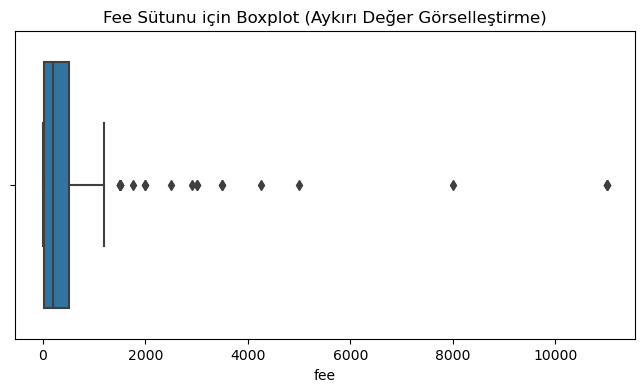

In [89]:
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['fee'])
plt.title("Fee Sütunu için Boxplot (Aykırı Değer Görselleştirme)")
plt.show()

In [90]:
# fee sütununda eksik veri olup olmadığını kontrol et
df["fee_is_missing"] = df["fee"].isnull()

# Kontrol: kaç tane eksik değer var
print(df["fee_is_missing"].value_counts())

fee_is_missing
True     1788
False     392
Name: count, dtype: int64


In [91]:
df["fee_is_missing"].head(10)

0    False
1     True
2    False
3     True
4     True
5    False
6    False
7    False
8     True
9     True
Name: fee_is_missing, dtype: bool

In [92]:
# Geçersiz sayılacak değerler listesi
invalid_fee_values = [1.00, 1.10, 1.20, 1.25, 1.40, 1.50, 1.70, 2.00, 2.20, 2.50, 3.00, 3.50, 4.00, 5.00, 5.80]

# Bu değerlere sahip olanları NaN yap
df.loc[df["fee"].isin(invalid_fee_values), "fee"] = np.nan

# fee_is_missing sütununu buna göre güncelle
df["fee_is_missing"] = df["fee"].isnull()

In [93]:
df["fee"].head(10)

0     200.0
1       NaN
2    1000.0
3       NaN
4       NaN
5       NaN
6       NaN
7     500.0
8       NaN
9       NaN
Name: fee, dtype: float64

In [94]:
df['fee'].isna().sum()

1882

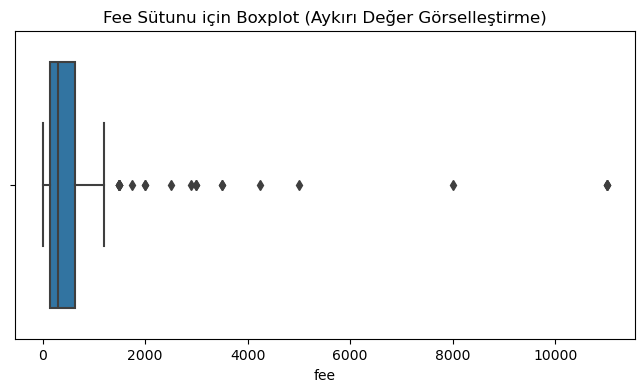

In [95]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['fee'])
plt.title("Fee Sütunu için Boxplot (Aykırı Değer Görselleştirme)")
plt.show()

Bu kod, **fiyat kategorilerine** (`price_category`) göre iki farklı sütundaki (`credit` ve `barter`) **"True"** ve **"False"** değerlerinin **yüzde dağılımını** hesaplar.


In [96]:
# Her fiyat kategorisinde kaç tane "True" ve "False" olduğu
print(df.groupby('price_category')['credit'].value_counts(normalize=True))
print(df.groupby('price_category')['barter'].value_counts(normalize=True))
# Örneğin “yüksek” fiyat kategorisindekilerin yüzde kaçında credit=True olduğu

price_category  credit
düşük           True      0.907547
                False     0.092453
orta            True      0.911069
                False     0.088931
yüksek          True      0.881553
                False     0.118447
Name: proportion, dtype: float64
price_category  barter
düşük           True      0.690377
                False     0.309623
orta            True      0.553038
                False     0.446962
yüksek          True      0.518124
                False     0.481876
Name: proportion, dtype: float64



##### **`credit` Sütunu İçin Dağılım:**
Bu sonuç, her fiyat kategorisindeki `credit` sütunundaki **True** ve **False** değerlerinin yüzdesini gösterir:
- **Düşük fiyat kategorisi:** `credit=True` olanlar %90.75, `credit=False` olanlar ise %9.25.
- **Orta fiyat kategorisi:** `credit=True` olanlar %91.11, `credit=False` olanlar ise %8.89.
- **Yüksek fiyat kategorisi:** `credit=True` olanlar %88.16, `credit=False` olanlar ise %11.84.

##### **`barter` Sütunu İçin Dağılım:**
Bu sonuç da her fiyat kategorisindeki `barter` sütunundaki **True** ve **False** değerlerinin yüzdesini gösterir:
- **Düşük fiyat kategorisi:** `barter=True` olanlar %69.04, `barter=False` olanlar ise %30.96.
- **Orta fiyat kategorisi:** `barter=True` olanlar %55.30, `barter=False` olanlar ise %44.70.
- **Yüksek fiyat kategorisi:** `barter=True` olanlar %51.81, `barter=False` olanlar ise %48.19.


In [97]:
# Her fiyat kategorisindeki ortalama fee miktarını hesapla
print(df.groupby('price_category')['fee'].mean())

price_category
düşük      619.583333
orta       497.906977
yüksek    1181.785714
Name: fee, dtype: float64


In [98]:
df['credit'].isna().sum()

78

In [99]:
df['barter'].isna().sum()

262

### 1. **Boolean Değerlerine Dönüştürme:**
   - `df['credit']` ve `df['barter']` kolonlarındaki `'True'` ve `'False'` string değerleri, Python'daki boolean (`True`, `False`) değerlerine dönüştürülmüştür.

### 2. **Eksik Verilerin Fiyat Kategorisine Göre Doldurulması:**
   - Eksik (`NaN`) değerlerin, `price_category` bazında gruplama yapılarak doldurulması sağlanmıştır.
   - Her bir `price_category` grubu için, `credit` ve `barter` kolonlarındaki eksik veriler, o gruptaki en sık görülen değer mode ile doldurulmuştur.
   - Bu işlemde kullanılan `fill_with_mode` fonksiyonu, bir grup için mode değeri boş değilse (yani grupta tek bir yaygın değer varsa) bu değeri kullanarak eksik veriyi doldurmuştur. Eğer mode değeri mevcut değilse, eksik değerler `False` ile doldurulmuştur.


In [100]:
# True/False olarak işaretle
df['credit'] = df['credit'].map({'True': True, 'False': False})
df['barter'] = df['barter'].map({'True': True, 'False': False})

# Eksik verileri fiyat kategorisine göre mode ile doldur
fill_with_mode = lambda x: x.fillna(x.mode()[0] if not x.mode().empty else False)
df['credit'] = df.groupby('price_category')['credit'].transform(fill_with_mode)
df['barter'] = df.groupby('price_category')['barter'].transform(fill_with_mode)

# Kontrol edelim
missing_credit = df['credit'].isna().sum()
missing_barter = df['barter'].isna().sum()

print(missing_credit, missing_barter)

0 0


In [101]:
print(df["barter"].value_counts())

barter
True     1372
False     808
Name: count, dtype: int64


In [102]:
df['searchScore']

0             NaN
1             NaN
2       50.385391
3       28.141878
4             NaN
          ...    
2175          NaN
2176          NaN
2177    60.259280
2178          NaN
2179          NaN
Name: searchScore, Length: 2180, dtype: float64

In [103]:
df['searchScore'].isna().sum()


1840

In [104]:
df = df.drop(columns=['searchScore'])

In [105]:
df.shape

(2180, 69)

In [106]:
df['stale']

0       False
1       False
2       False
3       False
4       False
        ...  
2175    False
2176    False
2177    False
2178    False
2179    False
Name: stale, Length: 2180, dtype: bool

In [107]:
df['stale'].isnull().sum()

0

In [108]:
# 'stale' sütunundaki True ve False değerlerinin sayısını alalım
stale_counts = df['stale'].value_counts()

# Sonuçları yazdırma
print(stale_counts)

stale
False    2103
True       77
Name: count, dtype: int64


In [109]:
import pandas as pd

# Convert to datetime and drop timezone info
df['updatedDate'] = pd.to_datetime(df['updatedDate']).dt.tz_localize(None)

# Calculate freshness using today's date
today = pd.Timestamp.today().normalize()
df['days_since_update'] = (today - df['updatedDate']).dt.days

print(df['days_since_update'].describe())

count    2180.000000
mean      101.779817
std        23.851444
min        69.000000
25%        82.000000
50%        95.000000
75%       116.000000
max       168.000000
Name: days_since_update, dtype: float64


In [110]:
df.groupby('stale')['days_since_update'].describe()

,count,mean,std,min,25%,50%,75%,max
stale,,,,,,,,
False,2103.0,101.792677,23.098243,72.0,82.0,95.0,116.0,166.0
True,77.0,101.428571,39.424621,69.0,76.0,78.0,159.0,168.0


In [111]:
# Create 'stale_predicted' column based on threshold
df['Stale_corrected'] = df['days_since_update'] > 90

# View descriptive statistics
df.groupby('Stale_corrected')['days_since_update'].describe()

,count,mean,std,min,25%,50%,75%,max
Stale_corrected,,,,,,,,
False,949.0,81.118019,4.635305,69.0,78.0,81.0,85.0,90.0
True,1231.0,117.708367,20.197808,91.0,101.0,112.0,131.0,168.0


In [112]:
# Compare the actual 'stale' column with the expected one
df['stale_correct?'] = df['stale'] == df['Stale_corrected']

# Count how many rows are mismatched
incorrect_count = (~df['stale_correct?']).sum()
print(f"Number of incorrect stale entries: {incorrect_count}")


Number of incorrect stale entries: 1264


^^ Cok fazla farkli degerler oldugu icin bence 120 olsun

In [113]:
# stale=False but expected_stale=True (should have been stale)
false_but_should_be_true = df[(df['stale'] == False) & (df['Stale_corrected'] == True)]
print(f"Stale=False but expected to be True: {len(false_but_should_be_true)}")
print(false_but_should_be_true['days_since_update'].describe())

print()

# stale=True but expected_stale=False (should have been stale)
true_but_should_be_false = df[(df['stale'] == True) & (df['Stale_corrected'] == False)]
print(f"Stale=True but expected to be False: {len(true_but_should_be_false)}")
print(true_but_should_be_false['days_since_update'].describe())

Stale=False but expected to be True: 1209
count    1209.000000
mean      116.885856
std        19.400115
min        91.000000
25%       100.000000
50%       112.000000
75%       130.000000
max       166.000000
Name: days_since_update, dtype: float64

Stale=True but expected to be False: 55
count    55.000000
mean     76.836364
std       2.514872
min      69.000000
25%      76.000000
50%      76.000000
75%      78.000000
max      89.000000
Name: days_since_update, dtype: float64


In [114]:
# var olan 'stale' yanlisiklar iceriyor, 'expected_stale' kullanilacak
df = df.drop(columns=['stale', 'stale_correct?']) 

In [115]:
print(df[['startDate', 'endDate', 'createdDate', 'updatedDate', 'listingUpdatedDate']].dtypes)

startDate                     object
endDate                       object
createdDate                   object
updatedDate           datetime64[ns]
listingUpdatedDate            object
dtype: object


In [116]:
print(f"startDate null değerleri {df['startDate'].isna().sum()}")
print(f"endDate null değerleri {df['endDate'].isna().sum()}")
print(f"createdDate null değerleri {df['createdDate'].isna().sum()}")
print(f"updatedDate null değerleri {df['updatedDate'].isna().sum()}")
print(f"listingUpdatedDate null değerleri {df['listingUpdatedDate'].isna().sum()}")

startDate null değerleri 0
endDate null değerleri 2
createdDate null değerleri 0
updatedDate null değerleri 0
listingUpdatedDate null değerleri 0


In [117]:
import re

# Fix function to truncate timezone offset to 4 digits
def fix_timezone(s):
    return re.sub(r'(\+\d{4})\d*$', r'\1', s)

# Apply the fix and convert to date
for col in ['startDate', 'endDate', 'createdDate', 'updatedDate', 'listingUpdatedDate']:
    df[col] = df[col].astype(str).apply(fix_timezone)
    df[col] = pd.to_datetime(df[col], errors='coerce').dt.date  # use errors='coerce' to handle any remaining bad rows

# View result
print(df[['listingUpdatedDate','updatedDate', 'createdDate', 'startDate' , 'endDate']].head())

  listingUpdatedDate updatedDate createdDate   startDate     endDate
0         2024-11-08  2025-02-07  2024-11-08  2025-02-07  2025-05-08
1         2025-01-13  2025-01-13  2024-03-23  2025-01-10  2025-04-13
2         2023-09-21  2025-02-05  2023-05-11  2025-02-05  2025-05-06
3         2025-02-12  2025-02-12  2024-02-08  2025-02-12  2025-05-13
4         2025-02-01  2025-02-01  2025-02-01  2025-02-01  2025-05-02


In [118]:
# Karşılaştırma yap
aynilar = df[df['startDate'] == df['createdDate']]
farklilar = df[df['startDate'] != df['createdDate']]

# Sonuçları yazdır
print(f"Aynı olan kayıt sayısı: {len(aynilar)}")
print(f"Farklı olan kayıt sayısı: {len(farklilar)}")


Aynı olan kayıt sayısı: 1226
Farklı olan kayıt sayısı: 954


In [119]:
# Karşılaştırma yap
aynilar = df[df['listingUpdatedDate'] == df['updatedDate']]
farklilar = df[df['listingUpdatedDate'] != df['updatedDate']]

# Sonuçları yazdır
print(f"Aynı olan kayıt sayısı: {len(aynilar)}")
print(f"Farklı olan kayıt sayısı: {len(farklilar)}")

Aynı olan kayıt sayısı: 1385
Farklı olan kayıt sayısı: 795


In [120]:
# Karşılaştırma yap
aynilar = df[df['startDate'] == df['updatedDate']]
farklilar = df[df['startDate'] != df['updatedDate']]

# Sonuçları yazdır
print(f"Aynı olan kayıt sayısı: {len(aynilar)}")
print(f"Farklı olan kayıt sayısı: {len(farklilar)}")

Aynı olan kayıt sayısı: 1386
Farklı olan kayıt sayısı: 794


In [121]:
# Karşılaştırma yap
aynilar = df[df['startDate'] == df['listingUpdatedDate']]
farklilar = df[df['startDate'] != df['listingUpdatedDate']]

# Sonuçları yazdır
print(f"Aynı olan kayıt sayısı: {len(aynilar)}")
print(f"Farklı olan kayıt sayısı: {len(farklilar)}")

Aynı olan kayıt sayısı: 905
Farklı olan kayıt sayısı: 1275


In [122]:
# Karşılaştırma yap
aynilar = df[df['createdDate'] == df['updatedDate']]
farklilar = df[df['createdDate'] != df['updatedDate']]

# Sonuçları yazdır
print(f"Aynı olan kayıt sayısı: {len(aynilar)}")
print(f"Farklı olan kayıt sayısı: {len(farklilar)}")

Aynı olan kayıt sayısı: 793
Farklı olan kayıt sayısı: 1387


In [123]:
# Karşılaştırma yap
aynilar = df[df['createdDate'] == df['listingUpdatedDate']]
farklilar = df[df['createdDate'] != df['listingUpdatedDate']]

# Sonuçları yazdır
print(f"Aynı olan kayıt sayısı: {len(aynilar)}")
print(f"Farklı olan kayıt sayısı: {len(farklilar)}")

Aynı olan kayıt sayısı: 1357
Farklı olan kayıt sayısı: 823


In [124]:
# createdDate ve updatedDate sütunlarını datetime formatına çevir
df['createdDate'] = pd.to_datetime(df['createdDate'])
df['startDate'] = pd.to_datetime(df['startDate'])

# DateFarki sütununu oluştur (gün cinsinden fark)
df['DateFarki'] = (df['startDate'] - df['createdDate']).dt.days
df['DateFarki'].describe()

count    2177.000000
mean       70.789159
std       206.355751
min         0.000000
25%         0.000000
50%         0.000000
75%        52.000000
max      3471.000000
Name: DateFarki, dtype: float64

In [125]:
# createdDate ve updatedDate sütunlarını datetime formatına çevir
df['createdDate'] = pd.to_datetime(df['createdDate'])
df['startDate'] = pd.to_datetime(df['startDate'])

# updateFrequency sütununu oluştur (gün cinsinden fark)
df['DateFarki'] = (df['createdDate'] - df['startDate']).dt.days
df['DateFarki'].describe()

count    2177.000000
mean      -70.789159
std       206.355751
min     -3471.000000
25%       -52.000000
50%         0.000000
75%         0.000000
max         0.000000
Name: DateFarki, dtype: float64

<h4> ^ startDate createdDate'ten daha yenidir demek </h4>

In [126]:
# createdDate ve updatedDate sütunlarını datetime formatına çevir
df['updatedDate'] = pd.to_datetime(df['updatedDate'])
df['listingUpdatedDate'] = pd.to_datetime(df['listingUpdatedDate'])

# updateFrequency sütununu oluştur (gün cinsinden fark)
df['DateFarki'] = (df['updatedDate'] - df['listingUpdatedDate']).dt.days
df['DateFarki'].describe()

count    2180.000000
mean       38.088991
std       121.509556
min         0.000000
25%         0.000000
50%         0.000000
75%        17.000000
max      1735.000000
Name: DateFarki, dtype: float64

In [127]:
# createdDate ve updatedDate sütunlarını datetime formatına çevir
df['updatedDate'] = pd.to_datetime(df['updatedDate'])
df['listingUpdatedDate'] = pd.to_datetime(df['listingUpdatedDate'])

# updateFrequency sütununu oluştur (gün cinsinden fark)
df['DateFarki'] = ( df['listingUpdatedDate'] - df['updatedDate']).dt.days
df['DateFarki'].describe()

count    2180.000000
mean      -38.088991
std       121.509556
min     -1735.000000
25%       -17.000000
50%         0.000000
75%         0.000000
max         0.000000
Name: DateFarki, dtype: float64

<h4> ^ updatedDate listingUpdatedDate'ten daha yenidir demek </h4>

### 📌 Not: `updatedDate` ve `startDate` sütunların kullanımının tercih etme nedeni:

Veri setinde `startDate`, `createdDate`, `updatedDate` ve `listingUpdatedDate` olmak üzere 4 farklı tarih sütunu bulunmaktaydı. Yapılan analizler sonucunda:

- `startDate` ile `createdDate` sütunlarının büyük ölçüde benzer olduğu,ancak bazı kayıtlarda farklılık gösterdiği,
- `startDate` sütunu `createdDate` sütun'den daha yeni olduğu,
- `listingUpdatedDate` ile `updatedDate` sütunlarının büyük ölçüde benzer olduğu,ancak bazı kayıtlarda farklılık gösterdiği,
- `listingUpdatedDate` sütunu `updatedDate` sütun'den daha yeni olduğu,
- `updatedDate` sütununun `startDate` ile yani ilanın oluşturulma tarihi ile çokça benzer değerlere sahip olduğu,
- `listingUpdatedDate` sütununun `createdDate` ile yani ilanın oluşturulma tarihi ile çokça benzer değerlere sahip olduğu,

Bu nedenle, analizlerde yalnızca **`startDate`** ve **`updatedDate`** sütunu kullanılmaya karar verilmiştir.


In [128]:
df = df.drop(columns=['DateFarki'])

In [129]:
df['startDate'] = pd.to_datetime(df['startDate'], errors='coerce')
df['endDate'] = pd.to_datetime(df['endDate'], errors='coerce')

# startDate ve endDate farkından durationDate sütunu oluştur (gün cinsinden)
df['duration'] = (df['endDate'] - df['startDate']).dt.days

In [130]:
df['duration']

0        90.0
1        93.0
2        90.0
3        90.0
4        90.0
        ...  
2175    148.0
2176     92.0
2177     92.0
2178    152.0
2179    121.0
Name: duration, Length: 2180, dtype: float64

In [131]:
df['duration'].isna().sum()

7

In [132]:
# duration sütunundaki boşlukları ortalama ile doldur
if 'duration' in df.columns:
    mean_duration = df['duration'].mean()
    df['duration'] = df['duration'].fillna(mean_duration)

In [133]:
df['duration'].describe()

count    2180.000000
mean      100.484123
std        30.344244
min        90.000000
25%        90.000000
50%        90.000000
75%        92.000000
max       433.000000
Name: duration, dtype: float64

In [134]:
df['duration'].dtypes

dtype('float64')

In [135]:
# startDate ve endDate sütunlarını kaldır
#df = df.drop(['startDate', 'endDate'], axis=1, inplace=False)

### 🔍 Aykırı Değer Tespiti ve Temizlenmesi (Outlier Detection with IQR)


-Büyük çoğunluk 90–95 aralığında yoğunlaşmış.
-Ancak 150’nin üzerinde ve özellikle 200–400 arasında dikkat çekici sayıda aykırı değer (outlier) var.

### 🧮 IQR Yöntemi

- **IQR** yalnızca çeyrek dilimlere odaklanır ve bu nedenle veri setinin yapısını daha doğru yansıtır.
- **Q1** (25. yüzdelik) ve Q3 (75. yüzdelik) arasındaki fark alınarak hesaplanan IQR sayesinde, veri setindeki normal dağılım dışına çıkan değerler kolaylıkla belirlenebilir.

Aykırı değerler, doğrudan silinmek yerine **medyan** ile değiştirildi çünkü:

- **Uç** değerlerden etkilenmez, 


---


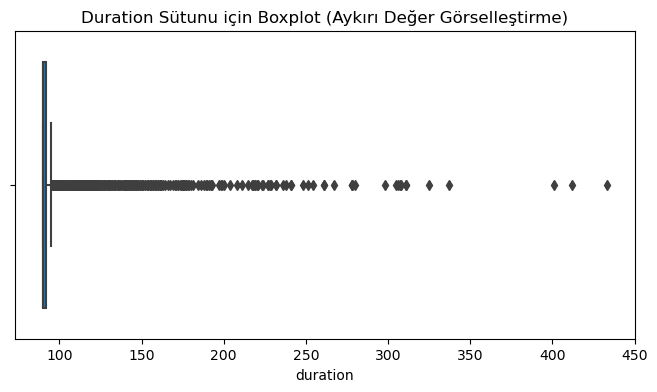

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['duration'])
plt.title("Duration Sütunu için Boxplot (Aykırı Değer Görselleştirme)")
plt.show()


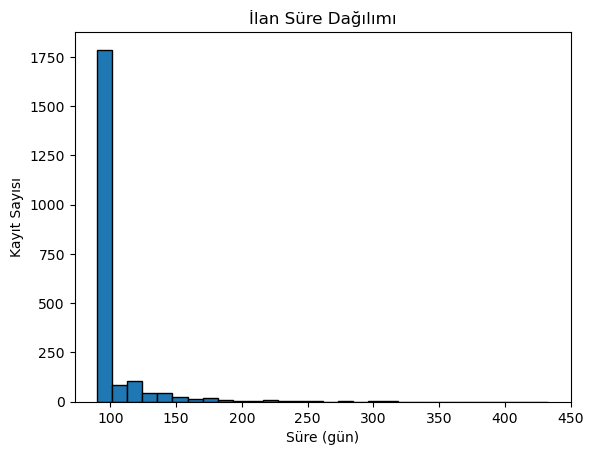

In [137]:
import matplotlib.pyplot as plt

plt.hist(df['duration'].dropna(), bins=30, edgecolor='black')
plt.xlabel("Süre (gün)")
plt.ylabel("Kayıt Sayısı")
plt.title("İlan Süre Dağılımı")
plt.show()


In [138]:
# createdDate ve updatedDate sütunlarını datetime formatına çevir
df['createdDate'] = pd.to_datetime(df['createdDate'])
df['listingUpdatedDate'] = pd.to_datetime(df['listingUpdatedDate'])

# updateFrequency sütununu oluştur (gün cinsinden fark)
df['updateFrequency'] = (df['listingUpdatedDate'] - df['createdDate']).dt.days

# İlk birkaç satırı kontrol et
print(df[['createdDate', 'listingUpdatedDate', 'updateFrequency']].head())
print()
df['updateFrequency'].describe()

  createdDate listingUpdatedDate  updateFrequency
0  2024-11-08         2024-11-08                0
1  2024-03-23         2025-01-13              296
2  2023-05-11         2023-09-21              133
3  2024-02-08         2025-02-12              370
4  2025-02-01         2025-02-01                0



count    2180.000000
mean       45.565138
std       161.201853
min         0.000000
25%         0.000000
50%         0.000000
75%        22.000000
max      3469.000000
Name: updateFrequency, dtype: float64

In [139]:
# createdDate ve updatedDate sütunlarını datetime formatına çevir
df['startDate'] = pd.to_datetime(df['startDate'])
df['listingUpdatedDate'] = pd.to_datetime(df['listingUpdatedDate'])

# updateFrequency sütununu oluştur (gün cinsinden fark)
df['updateFrequency'] = (df['listingUpdatedDate'] - df['startDate']).dt.days

# İlk birkaç satırı kontrol et
print(df[['startDate', 'listingUpdatedDate', 'updateFrequency']].head())
print()
df['updateFrequency'].describe()

   startDate listingUpdatedDate  updateFrequency
0 2025-02-07         2024-11-08            -91.0
1 2025-01-10         2025-01-13              3.0
2 2025-02-05         2023-09-21           -503.0
3 2025-02-12         2025-02-12              0.0
4 2025-02-01         2025-02-01              0.0



count    2177.000000
mean      -25.224621
std       127.669152
min     -1735.000000
25%        -6.000000
50%         0.000000
75%         2.000000
max       343.000000
Name: updateFrequency, dtype: float64

In [140]:
# createdDate ve updatedDate sütunlarını datetime formatına çevir
df['createdDate'] = pd.to_datetime(df['createdDate'])
df['updatedDate'] = pd.to_datetime(df['updatedDate'])

# updateFrequency sütununu oluştur (gün cinsinden fark)
df['updateFrequency'] = (df['updatedDate'] - df['createdDate']).dt.days

# İlk birkaç satırı kontrol et
print(df[['createdDate', 'updatedDate', 'updateFrequency']].head())
print()
df['updateFrequency'].describe()

  createdDate updatedDate  updateFrequency
0  2024-11-08  2025-02-07               91
1  2024-03-23  2025-01-13              296
2  2023-05-11  2025-02-05              636
3  2024-02-08  2025-02-12              370
4  2025-02-01  2025-02-01                0



count    2180.000000
mean       83.654128
std       209.903019
min         0.000000
25%         0.000000
50%        11.000000
75%        86.000000
max      3471.000000
Name: updateFrequency, dtype: float64

In [141]:
# createdDate ve updatedDate sütunlarını datetime formatına çevir
df['startDate'] = pd.to_datetime(df['startDate'])
df['updatedDate'] = pd.to_datetime(df['updatedDate'])

# updateFrequency sütununu oluştur (gün cinsinden fark)
df['updateFrequency'] = (df['updatedDate'] - df['startDate']).dt.days

# İlk birkaç satırı kontrol et
print(df[['startDate', 'updatedDate', 'updateFrequency']].head())
print()
df['updateFrequency'].describe()

   startDate updatedDate  updateFrequency
0 2025-02-07  2025-02-07              0.0
1 2025-01-10  2025-01-13              3.0
2 2025-02-05  2025-02-05              0.0
3 2025-02-12  2025-02-12              0.0
4 2025-02-01  2025-02-01              0.0



count    2177.000000
mean       12.906752
std        31.664951
min         0.000000
25%         0.000000
50%         0.000000
75%         9.000000
max       343.000000
Name: updateFrequency, dtype: float64

In [142]:
#'updatedDate' ile 'startDate' kullanılacak
df['updateFrequency'].describe()

count    2177.000000
mean       12.906752
std        31.664951
min         0.000000
25%         0.000000
50%         0.000000
75%         9.000000
max       343.000000
Name: updateFrequency, dtype: float64

In [143]:
df['updateFrequency'].dtypes

dtype('float64')

In [144]:
df['updateFrequency'].isna().sum()

3

In [145]:
# updateFrequency sütunundaki 0 degerleri medyan ile doldur
if 'updateFrequency' in df.columns:
    median_update = df.loc[df['updateFrequency'] != 0, 'updateFrequency'].median()
    df.loc[df['updateFrequency'] == 0, 'updateFrequency'] = median_update
    
df['updateFrequency'].isna().sum()

3

In [146]:
# Stale sutünü yeterlı oldugundan dolayı updateFrequency'e gerek yok
df=df.drop(columns=['updateFrequency'])  

In [147]:
df = df.drop(columns=['endDate','startDate','createdDate','updatedDate','listingUpdatedDate'])

In [148]:
# Tarih sutünlerinden çıkadığımız anlamlı sutünler:
print(df[['duration', 'days_since_update', 'Stale_corrected']].head())

   duration  days_since_update  Stale_corrected
0      90.0                100             True
1      93.0                125             True
2      90.0                102             True
3      90.0                 95             True
4      90.0                106             True


In [149]:
#################################################

- Tüm metinleri **küçük harfe** çevirir.  

- Metinlerin **başında veya sonunda bulunan gereksiz boşlukları** temizler.  


In [150]:
for col in ['areas', 'district', 'county', 'city']:
    df[col] = df[col].str.lower().str.strip()

In [151]:
columns_to_check = ['areas', 'district', 'county', 'city', 'mapLocation', 'isMapHidden', 'streetView']

null_counts = df[columns_to_check].isnull().sum()

print(null_counts)


areas           1
district        0
county          0
city            0
mapLocation     0
isMapHidden     0
streetView     77
dtype: int64


In [152]:
df[columns_to_check].head()

,areas,district,county,city,mapLocation,isMapHidden,streetView
0,"[{""id"":1055,""name"":""i̇stiklal""}]","{""id"":15148,""name"":""kurtuluş"",""tier"":2}","{""id"":2068,""name"":""adapazarı"",""tier"":2}","{""id"":54,""name"":""sakarya"",""tier"":2}","{""lat"":40.78177696011071,""lon"":30.400175993150...",False,False
1,"[{""id"":5451,""name"":""diğer""}]","{""id"":15223,""name"":""yalı"",""tier"":2}","{""id"":1442,""name"":""karasu"",""tier"":2}","{""id"":54,""name"":""sakarya"",""tier"":2}","{""lat"":41.10962272499753,""lon"":30.692469430880...",False,False
2,"[{""id"":5371,""name"":""diğer""},{""id"":6180,""name"":...","{""id"":97323,""name"":""kırkpınar soğuksu"",""tier"":3}","{""id"":1595,""name"":""sapanca"",""tier"":3}","{""id"":54,""name"":""sakarya"",""tier"":2}","{""lat"":40.701133631737555,""lon"":30.21435713528...",False,False
3,"[{""id"":5451,""name"":""diğer""}]","{""id"":15224,""name"":""kabakoz"",""tier"":2}","{""id"":1442,""name"":""karasu"",""tier"":2}","{""id"":54,""name"":""sakarya"",""tier"":2}","{""lat"":41.10212238429355,""lon"":30.681114194206...",False,False
4,"[{""id"":5617,""name"":""diğer""}]","{""id"":17452,""name"":""yayla"",""tier"":4}","{""id"":1818,""name"":""kocaali"",""tier"":4}","{""id"":54,""name"":""sakarya"",""tier"":2}","{""lat"":41.07494321848645,""lon"":30.85647390116245}",False,False


In [153]:
types = df[columns_to_check].dtypes

print(types)

areas          object
district       object
county         object
city           object
mapLocation    object
isMapHidden      bool
streetView     object
dtype: object


In [154]:
# Tekil JSON parse (district, county, city)
def parse_single_json(val):
    if pd.notnull(val):
        obj = json.loads(val)
        return obj.get('name').lower().strip()
    else:
        return None

# Liste JSON parse (areas)
def parse_list_json(val):
    if pd.notnull(val):
        obj_list = json.loads(val)
        if isinstance(obj_list, list) and len(obj_list) > 0:
            return obj_list[0]['name'].lower().strip()  # ilk area'yı al
        else:
            return None
    else:
        return None

# Uygulama
df['area_name'] = df['areas'].apply(parse_list_json)
df['district_name'] = df['district'].apply(parse_single_json)
df['county_name'] = df['county'].apply(parse_single_json)
df['city_name'] = df['city'].apply(parse_single_json)


In [155]:
print(df[['area_name', 'district_name', 'county_name', 'city_name']].head())


   area_name      district_name county_name city_name
0  i̇stiklal           kurtuluş   adapazarı   sakarya
1      diğer               yalı      karasu   sakarya
2      diğer  kırkpınar soğuksu     sapanca   sakarya
3      diğer            kabakoz      karasu   sakarya
4      diğer              yayla     kocaali   sakarya


In [156]:
print(df[['area_name', 'district_name', 'county_name', 'city_name']].isna().sum())

area_name        78
district_name     0
county_name       0
city_name         0
dtype: int64


In [157]:

import unicodedata
# Varsayalım area_name sütunun var
df['area_name'] = df['area_name'].astype(str).str.lower()

# Türkçe karakterleri normalize edelim ve boşlukları temizleyelim
def normalize_text(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    return text.strip().replace(" ", "")

df['area_name'] = df['area_name'].apply(normalize_text)

# Yaygın yanlışları düzeltelim
df['area_name'] = df['area_name'].replace({
    'diger': 'diger',
    'diğer': 'diger',
    'di�er': 'diger',
    'i̇stiklal': 'istiklal',
    'istiklal': 'istiklal',
    'kirsalmahalle': 'kirsalmah',
    'kirsal mahalle': 'kirsalmah',
    'kırsal mahalle': 'kirsalmah',
    'tigcilar': 'tigcilar',
    'tığcılar': 'tigcilar',
    'serdivanmerkez': 'serdivanmerkez',
    'sapancamerkez': 'sapancamerkez',
    'akyazimerkez': 'akyazimerkez',
    'erenlermerkez': 'erenlermerkez',
    'arifiyemerkez': 'arifiyemerkez',
})

# NaN varsa doldur (isteğe bağlı)
df['area_name'] = df['area_name'].replace('nan', np.nan)
df['area_name'] = df['area_name'].fillna('bilinmiyor')

In [158]:
df['county_name'].value_counts()

county_name
karasu        888
kocaali       339
adapazarı     275
serdivan      219
sapanca       159
arifiye        58
erenler        46
hendek         42
pamukova       38
geyve          34
akyazı         30
kaynarca       11
ferizli        10
taraklı         9
söğütlü         8
adapazari       8
karapürçek      1
silivri         1
ergene          1
pınarhisar      1
karap�r�ek      1
akyazi          1
Name: count, dtype: int64

In [159]:
# Gereksiz satırları kaldır
df = df[~df['county_name'].isin(['silivri', 'ergene', 'pınarhisar'])]

# Karakter bozukluğu olan ismi düzelt
df['county_name'] = df['county_name'].replace({'karap�r�ek': 'karapürçek'})
 

In [160]:
df['county_name'].value_counts()

county_name
karasu        888
kocaali       339
adapazarı     275
serdivan      219
sapanca       159
arifiye        58
erenler        46
hendek         42
pamukova       38
geyve          34
akyazı         30
kaynarca       11
ferizli        10
taraklı         9
söğütlü         8
adapazari       8
karapürçek      2
akyazi          1
Name: count, dtype: int64

In [161]:
df['city_name'].value_counts()

city_name
sakarya    2177
Name: count, dtype: int64

In [162]:
import json

# Tekil JSON (district, county, city) için tier alma
def parse_single_json_tier(val):
    if pd.notnull(val):
        obj = json.loads(val)
        return obj.get('tier')
    return None

# Liste JSON (areas) için tier alma (ilk elemanı baz alır)
def parse_list_json_tier(val):
    if pd.notnull(val):
        obj_list = json.loads(val)
        if isinstance(obj_list, list) and len(obj_list) > 0:
            return obj_list[0].get('tier')
    return None

# Uygulama
df['district_tier'] = df['district'].apply(parse_single_json_tier)
df['county_tier'] = df['county'].apply(parse_single_json_tier)


In [163]:
print(df[['district_tier', 'county_tier']].isna().sum())

district_tier    0
county_tier      0
dtype: int64


In [164]:
# Her ikisi de dolu olup aynı olanlar
both_equal = df[
    df['district_tier'].notna() & 
    df['county_tier'].notna() & 
    (df['district_tier'] == df['county_tier'])
]
print(f"Aynı değere sahip olanlar: {len(both_equal)}")

# Her ikisi de dolu olup farklı olanlar
both_different = df[
    df['district_tier'].notna() & 
    df['county_tier'].notna() & 
    (df['district_tier'] != df['county_tier'])
]
print(f"Farklı değere sahip olanlar: {len(both_different)}")


Aynı değere sahip olanlar: 2177
Farklı değere sahip olanlar: 0


In [165]:
# district_tier sütununu sil
df = df.drop(columns='district_tier')

# county_tier sütununu 'tier' olarak yeniden adlandır
df = df.rename(columns={'county_tier': 'tier'})


In [166]:
def extract_lat_lon(val):
    if pd.notnull(val):
        loc = json.loads(val)
        return pd.Series([loc.get('lat'), loc.get('lon')])
    else:
        return pd.Series([None, None])

df[['latitude', 'longitude']] = df['mapLocation'].apply(extract_lat_lon)
#mapLocation'dan latitude ve longitude çıkararak koordinat ayırmak.

### Sakarya Merkezine Olan Mesafenin Hesaplanması

veri setindeki her bir ilan (satır) için Sakarya şehir merkezine olan uzaklığı kilometre cinsinden hesaplar ve bu değeri yeni bir sütun olarak veri çerçevesine ekler:

- Her bir satırda bulunan **`latitude` (enlem)** ve **`longitude` (boylam)** bilgileri alınır.
- Eğer bu iki bilgi **eksik değilse** (`pd.notnull` ile kontrol edilir):
  - `geopy` kütüphanesinin `geodesic()` fonksiyonu kullanılarak, Sakarya şehir merkezinin koordinatları (`40.7808`, `30.4036`) ile ilan konumu arasındaki **coğrafi mesafe** kilometre cinsinden hesaplanır.
- Eğer koordinat bilgileri **eksikse**, mesafe değeri olarak `None` (boş değer) atanır.
- Hesaplanan mesafeler, `distance_to_center_km` adlı yeni bir sütun olarak DataFrame'e eklenir.


In [167]:
# Koordinatlar
sakarya_center = (40.7808, 30.4036)  # Sakarya merkezi
karasu_sahili = (41.7237, 30.2356)  # Karasu sahili
sapanca_golu = (40.7064, 30.0896)  # Sapanca Gölü
sakarya_university = (40.7764, 30.4133)  # Sakarya Üniversitesi

# Mesafe hesaplama fonksiyonu
def distance_to_location(row, location):
    property_loc = (row['latitude'], row['longitude'])
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        return geodesic(location, property_loc).km
    else:
        return None

# Sakarya merkezi, Karasu sahili, Sapanca Gölü ve Sakarya Üniversitesi mesafelerini hesapla
df['distance_to_sakarya_center_km'] = df.apply(lambda row: distance_to_location(row, sakarya_center), axis=1)
df['distance_to_karasu_km'] = df.apply(lambda row: distance_to_location(row, karasu_sahili), axis=1)
df['distance_to_sapanca_km'] = df.apply(lambda row: distance_to_location(row, sapanca_golu), axis=1)
df['distance_to_sakarya_university_km'] = df.apply(lambda row: distance_to_location(row, sakarya_university), axis=1)

# Mesafeyi kategorilere ayıralım
def categorize_distance(distance):
    if distance <= 5:
        return '0-5 km'
    elif distance <= 10:
        return '5-10 km'
    elif distance <= 20:
        return '10-20 km'
    else:
        return '20+ km'

df['sakarya_center_category'] = df['distance_to_sakarya_center_km'].apply(categorize_distance)
df['karasu_category'] = df['distance_to_karasu_km'].apply(categorize_distance)
df['sapanca_category'] = df['distance_to_sapanca_km'].apply(categorize_distance)
df['sakarya_university_category'] = df['distance_to_sakarya_university_km'].apply(categorize_distance)

# Sonuçları kontrol edelim
print(df[['area_name', 'distance_to_sakarya_center_km', 'sakarya_center_category',
          'distance_to_karasu_km', 'karasu_category', 
          'distance_to_sapanca_km', 'sapanca_category',
          'distance_to_sakarya_university_km', 'sakarya_university_category']].head())



  area_name  distance_to_sakarya_center_km sakarya_center_category  \
0  istiklal                       0.308721                  0-5 km   
1     diger                      43.876305                  20+ km   
2     diger                      18.269098                10-20 km   
3     diger                      42.655024                  20+ km   
4     diger                      50.219380                  20+ km   

   distance_to_karasu_km karasu_category  distance_to_sapanca_km  \
0             105.514260          20+ km               27.534329   
1              78.167696          20+ km               67.712763   
2             113.578168          20+ km               10.559525   
3              78.441318          20+ km               66.446416   
4              88.809634          20+ km               76.496409   

  sapanca_category  distance_to_sakarya_university_km  \
0           20+ km                           1.258536   
1           20+ km                          43.840884   

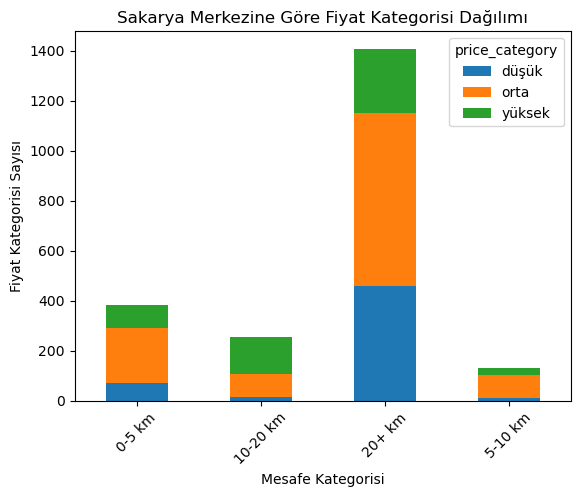

In [168]:
# Mesafeye göre fiyat kategorilerini görselleştirelim
df.groupby('sakarya_center_category')['price_category'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Sakarya Merkezine Göre Fiyat Kategorisi Dağılımı')
plt.xlabel('Mesafe Kategorisi')
plt.ylabel('Fiyat Kategorisi Sayısı')
plt.xticks(rotation=45)
plt.show()

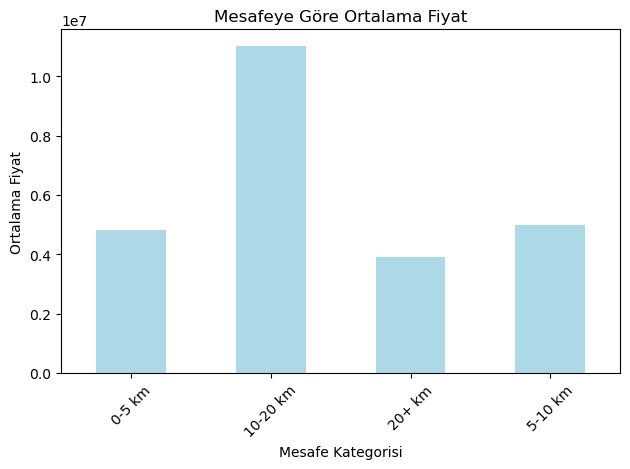

In [169]:
# Her mesafe kategorisi için ortalama fiyat hesaplayalım
avg_price_by_distance = df.groupby('sakarya_center_category')['price'].mean()

# Sonuçları görselleştirelim
avg_price_by_distance.plot(kind='bar', color='lightblue')
plt.title('Mesafeye Göre Ortalama Fiyat')
plt.xlabel('Mesafe Kategorisi')
plt.ylabel('Ortalama Fiyat')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

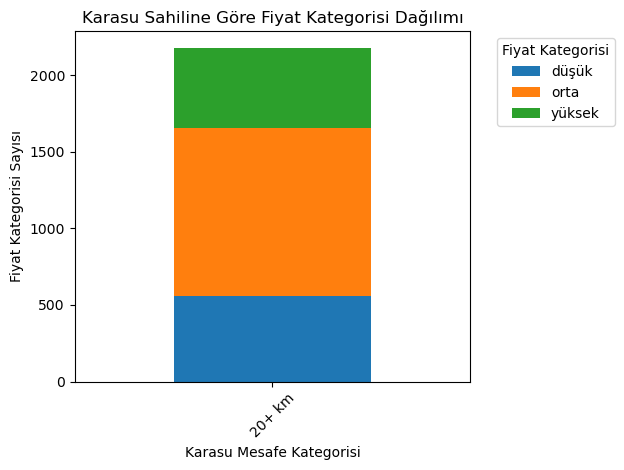

In [170]:
df.groupby('karasu_category')['price_category'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Karasu Sahiline Göre Fiyat Kategorisi Dağılımı')
plt.xlabel('Karasu Mesafe Kategorisi')
plt.ylabel('Fiyat Kategorisi Sayısı')
plt.xticks(rotation=45)
plt.legend(title="Fiyat Kategorisi", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


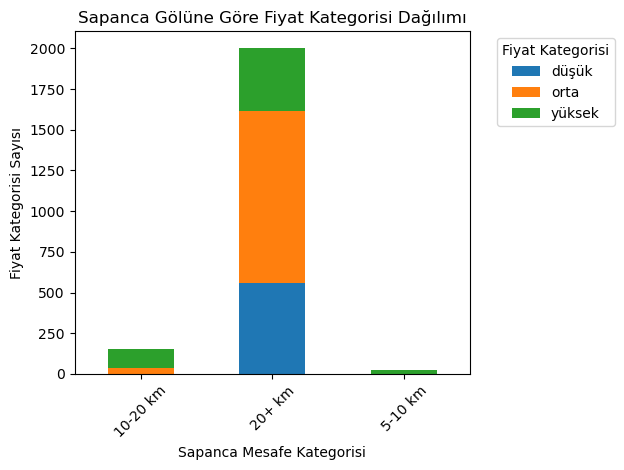

In [171]:
df.groupby('sapanca_category')['price_category'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Sapanca Gölüne Göre Fiyat Kategorisi Dağılımı')
plt.xlabel('Sapanca Mesafe Kategorisi')
plt.ylabel('Fiyat Kategorisi Sayısı')
plt.xticks(rotation=45)
plt.legend(title="Fiyat Kategorisi", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


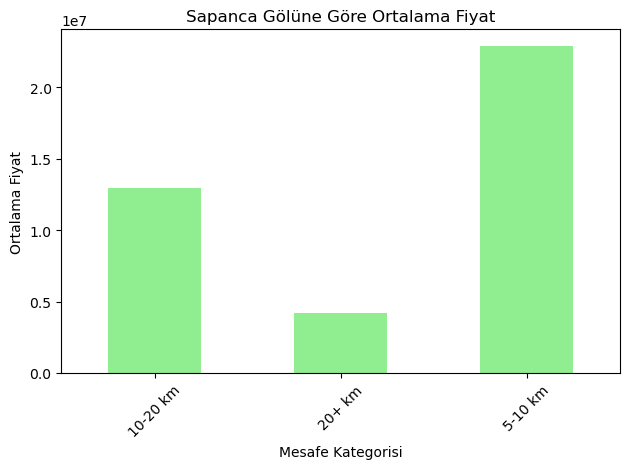

In [172]:
df.groupby('sapanca_category')['price'].mean().plot(kind='bar', color='lightgreen')
plt.title('Sapanca Gölüne Göre Ortalama Fiyat')
plt.xlabel('Mesafe Kategorisi')
plt.ylabel('Ortalama Fiyat')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


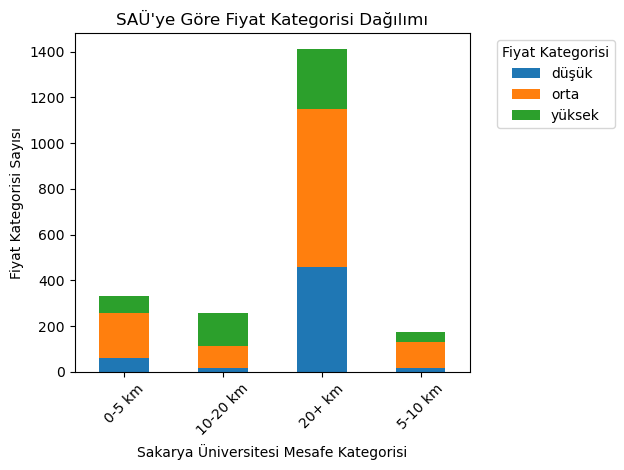

In [173]:
df.groupby('sakarya_university_category')['price_category'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('SAÜ\'ye Göre Fiyat Kategorisi Dağılımı')
plt.xlabel('Sakarya Üniversitesi Mesafe Kategorisi')
plt.ylabel('Fiyat Kategorisi Sayısı')
plt.xticks(rotation=45)
plt.legend(title="Fiyat Kategorisi", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

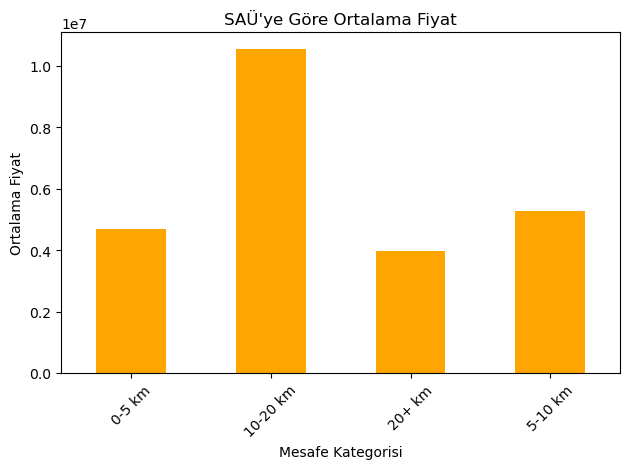

In [174]:
df.groupby('sakarya_university_category')['price'].mean().plot(kind='bar', color='orange')
plt.title('SAÜ\'ye Göre Ortalama Fiyat')
plt.xlabel('Mesafe Kategorisi')
plt.ylabel('Ortalama Fiyat')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [175]:
df['isMapHidden'] = df['isMapHidden'].astype(int)


In [176]:
df['streetView']

0       False
1       False
2       False
3       False
4       False
        ...  
2175    False
2176    False
2177    False
2178    False
2179    False
Name: streetView, Length: 2177, dtype: object

In [177]:
# Önce boolean'a dönüştür
df['streetView'] = df['streetView'].map({True: True, False: False, 'True': True, 'False': False})

# Sonra integer'a çevir
df['streetView'] = df['streetView'].fillna(0).astype(int)


In [178]:
df = df.drop(columns=['areas', 'district', 'county', 'city'])


In [179]:
df.shape


(2177, 77)

In [180]:
columns_to_analyze = ['room', 'livingRoom', 'bathRoom', 'bedCount', 'floor', 'entranceHeight', 'age']
print(df[columns_to_analyze].dtypes)

room               object
livingRoom         object
bathRoom            int64
bedCount          float64
floor              object
entranceHeight    float64
age               float64
dtype: object


In [181]:
df['room'].head()

0    [3]
1    [2]
2    [4]
3    [3]
4    [3]
Name: room, dtype: object

In [182]:
df['room'] = df['room'].str.strip('[]').astype('int64')

In [183]:
df['room'].head()

0    3
1    2
2    4
3    3
4    3
Name: room, dtype: int64

In [184]:
#room SÜTUNUNDA KAÇ ADET NULL DEĞER VAR

df['room'].isnull().sum()

0

In [185]:
df['room'].value_counts()

room
2     789
3     690
4     317
1     222
5      92
6      30
0      10
8      10
7       8
9       3
10      2
12      2
22      1
13      1
Name: count, dtype: int64

In [186]:
df['livingRoom'].head()

0    [1]
1    [1]
2    [1]
3    [1]
4    [1]
Name: livingRoom, dtype: object

In [187]:
# Değerleri ve adetlerini göster
df['livingRoom'].value_counts()

livingRoom
[1]    2061
[2]      65
[0]      40
[3]      10
[4]       1
Name: count, dtype: int64

In [188]:
# Köşeli parantezleri kaldırarak sadece sayıyı alalım
df['livingRoom'] = df['livingRoom'].apply(lambda x: eval(str(x))[0] if isinstance(x, str) and x.startswith('[') else x)

In [189]:
df['livingRoom'].head()

0    1
1    1
2    1
3    1
4    1
Name: livingRoom, dtype: int64

In [190]:
df['livingRoom'].isnull().sum()

0

In [191]:
df['roomAndLivingRoom']

0       ["3+1"]
1       ["2+1"]
2       ["4+1"]
3       ["3+1"]
4       ["3+1"]
         ...   
2175    ["3+1"]
2176    ["3+1"]
2177    ["4+1"]
2178    ["2+1"]
2179    ["4+1"]
Name: roomAndLivingRoom, Length: 2177, dtype: object

In [192]:
# 'roomAndLivingRoom' sütunundaki veriyi işleme
df['roomAndLivingRoom'] = df['roomAndLivingRoom'].apply(lambda x: x.strip('[]"') if isinstance(x, str) else x)
# Sonuçları yazdırma
print(df['roomAndLivingRoom'])

0       3+1
1       2+1
2       4+1
3       3+1
4       3+1
       ... 
2175    3+1
2176    3+1
2177    4+1
2178    2+1
2179    4+1
Name: roomAndLivingRoom, Length: 2177, dtype: object


In [193]:
print(df['roomAndLivingRoom'].value_counts())

roomAndLivingRoom
2+1             777
3+1             680
4+1             293
1+1             212
5+1              74
4+2              20
6+1              19
9 ve üzeri       18
5+2              17
2                11
6+2              10
Stüdyo           10
3+2               5
8+2               5
4                 4
7+2               4
8+3               4
7+1               3
3                 3
3+3 ve üzeri      2
5+3               1
2+2 ve üzeri      1
6+3               1
8+1               1
7+3               1
9veüzeri          1
Name: count, dtype: int64


In [194]:
def normalize_roomAndLivingRoom(value):
    value = str(value).strip().lower()

    if 'stüdyo' in value:
        return '1+0'
    if value in ['9 ve üzeri', '9veüzeri']:
        return '9+0'
    if 've üzeri' in value or 'veüzeri' in value:
        return value.replace(' ve üzeri', '').replace('veüzeri', '')
    return value

    return np.nan
df['roomAndLivingRoom'] = df['roomAndLivingRoom'].apply(normalize_roomAndLivingRoom)
  

In [195]:
# Değerleri ve adetlerini göster
print(df['roomAndLivingRoom'].value_counts())

roomAndLivingRoom
2+1    777
3+1    680
4+1    293
1+1    212
5+1     74
4+2     20
6+1     19
9+0     19
5+2     17
2       11
1+0     10
6+2     10
8+2      5
3+2      5
4        4
7+2      4
8+3      4
7+1      3
3        3
3+3      2
6+3      1
5+3      1
2+2      1
8+1      1
7+3      1
Name: count, dtype: int64


In [196]:
# İstenen değerleri içeren satırları filtrele ve ilgili sütunları seç
filtered_df = df[df['roomAndLivingRoom'].isin(['2', '3', '4', '9+0','3+3','2+2'])][['room', 'livingRoom', 'roomAndLivingRoom']]
# Sonuçları görüntüle
print(filtered_df)

      room  livingRoom roomAndLivingRoom
69       9           3               9+0
251      9           2               9+0
279      2           0                 2
280      0           0               9+0
282      0           0               9+0
285      0           0               9+0
286      0           0               9+0
291      0           0               9+0
292      0           0               9+0
293      0           0               9+0
294      0           0               9+0
297      0           0               9+0
298      0           0               9+0
362      2           0                 2
414      4           0                 4
433      2           0                 2
596      9           2               9+0
611      4           0                 4
616      2           2               2+2
833      2           0                 2
856      3           0                 3
909     10           2               9+0
936      2           0                 2
1013     2      

In [197]:
# room ve livingRoom sütunlarını string olarak birleştir
df['combined_roomLiving'] = df['room'].astype(str) + '+' + df['livingRoom'].astype(str)


In [198]:
# Karşılaştırma: kaç tanesi roomAndLivingRoom ile aynı
matching_count = (df['combined_roomLiving'] == df['roomAndLivingRoom']).sum()
total_count = len(df)

print(f"Eşleşen satır sayısı: {matching_count}")
print(f"Toplam satır sayısı: {total_count}")
print(f"Eşleşme oranı: {matching_count / total_count:.2%}")

Eşleşen satır sayısı: 2140
Toplam satır sayısı: 2177
Eşleşme oranı: 98.30%


In [199]:
# Eşleşmeyen satırları filtrele
mismatch_df = df[df['combined_roomLiving'] != df['roomAndLivingRoom']][['room', 'livingRoom', 'roomAndLivingRoom']]

# Sonuçları göster
print(mismatch_df)

      room  livingRoom roomAndLivingRoom
69       9           3               9+0
251      9           2               9+0
279      2           0                 2
280      0           0               9+0
282      0           0               9+0
285      0           0               9+0
286      0           0               9+0
291      0           0               9+0
292      0           0               9+0
293      0           0               9+0
294      0           0               9+0
297      0           0               9+0
298      0           0               9+0
362      2           0                 2
414      4           0                 4
433      2           0                 2
596      9           2               9+0
611      4           0                 4
833      2           0                 2
856      3           0                 3
909     10           2               9+0
936      2           0                 2
1013     2           0                 2
1015    12      

In [200]:
def extract_room(value):
    value = str(value).strip()
    
    # "3+1", "4+2" gibi ifadeleri yakala
    match = re.match(r'^(\d+)\s*\+', value)
    if match:
        return int(match.group(1))
    
    # Sadece rakam varsa, direkt al (örneğin "3", "4")
    if value.isdigit():
        return int(value)
    
    return np.nan

# Uygula
df['extracted_room'] = df['roomAndLivingRoom'].apply(extract_room)


In [201]:
df['extracted_room'].isnull().sum()

0

In [202]:
# Değerleri ve adetlerini göster
df['extracted_room'].value_counts()

extracted_room
2    789
3    690
4    317
1    222
5     92
6     30
9     19
8     10
7      8
Name: count, dtype: int64

In [203]:
# Değerleri ve adetlerini göster
df['room'].value_counts()

room
2     789
3     690
4     317
1     222
5      92
6      30
0      10
8      10
7       8
9       3
10      2
12      2
22      1
13      1
Name: count, dtype: int64

In [204]:
# extracted_room ile room farklı olan kayıtları bul
differences = df[df['room'] != df['extracted_room']]

# Sonuçları göster
print(f"Farklı olan kayıt sayısı: {len(differences)}")
print(differences[['listingId', 'roomAndLivingRoom', 'room', 'extracted_room','property_type', 'residence']])


Farklı olan kayıt sayısı: 16
       listingId roomAndLivingRoom  room  extracted_room  property_type  \
280   147368-153               9+0     0               9          Bahçe   
282   147368-155               9+0     0               9   İmarlı Konut   
285   147368-158               9+0     0               9          Tarla   
286   147368-159               9+0     0               9          Bahçe   
291   147368-164               9+0     0               9          Bahçe   
292   147368-165               9+0     0               9  Konut Ticaret   
293   147368-166               9+0     0               9          Bahçe   
294   147368-167               9+0     0               9   İmarlı Konut   
297   120340-614               9+0     0               9          Tarla   
298   120340-615               9+0     0               9          Tarla   
909     154659-2               9+0    10               9    Müstakil Ev   
1015  78781-1731               9+0    12               9          Daire

### 🛠 Room Sütunundaki 0 Değerlere göre RoomAndLivingRoom Güncellenmesi

- **Room** sütununda yer alan `0` değerleri, doğrudur.
- Bu değerler, `roomAndLivingRoom` sütunundaki yanlış değerleri düzeltmede kullanılmıştır.


In [205]:
# room == 0 olanları tespit et
zero_room_mask = df['room'] == 0

# Bu kayıtlarda roomAndLivingRoom sütununu "0+0" yap
df.loc[zero_room_mask, 'roomAndLivingRoom'] = '0+0'

# Kaç kayıt güncellendiğini yazdır
print(f'"0+0" olarak güncellenen roomAndLivingRoom sayısı: {zero_room_mask.sum()}')


"0+0" olarak güncellenen roomAndLivingRoom sayısı: 10


In [206]:
def fix_room_and_living_room(row):
    if pd.notna(row['roomAndLivingRoom']) and '+' in row['roomAndLivingRoom']:
        parts = row['roomAndLivingRoom'].split('+', 1)
        current_room_str = parts[0].strip()
        rest = parts[1].strip()
        try:
            if int(current_room_str) != int(row['room']):
                return f"{int(row['room'])}+{rest}"
        except:
            pass
    return row['roomAndLivingRoom']

# Sadece farklı olanları güncelle
mask = (df['room'] != df['extracted_room']) & df['roomAndLivingRoom'].str.contains('\+')
df.loc[mask, 'roomAndLivingRoom'] = df.loc[mask].apply(fix_room_and_living_room, axis=1)


In [207]:
print(f"Düzenlenen kayıt sayısı: {mask.sum()}")


Düzenlenen kayıt sayısı: 16


In [208]:
print(df.loc[mask, ['listingId', 'roomAndLivingRoom', 'room', 'extracted_room','property_type']])

       listingId roomAndLivingRoom  room  extracted_room  property_type
280   147368-153               0+0     0               9          Bahçe
282   147368-155               0+0     0               9   İmarlı Konut
285   147368-158               0+0     0               9          Tarla
286   147368-159               0+0     0               9          Bahçe
291   147368-164               0+0     0               9          Bahçe
292   147368-165               0+0     0               9  Konut Ticaret
293   147368-166               0+0     0               9          Bahçe
294   147368-167               0+0     0               9   İmarlı Konut
297   120340-614               0+0     0               9          Tarla
298   120340-615               0+0     0               9          Tarla
909     154659-2              10+0    10               9    Müstakil Ev
1015  78781-1731              12+0    12               9          Daire
1295   147682-70              10+0    10               9    Müst

HEPSI GUNCELENNDI FARKLI BIR DEGER BULUNMUYOR

In [209]:
df['livingRoom'].describe()

count    2177.000000
mean        1.022049
std         0.265114
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: livingRoom, dtype: float64

In [210]:
# + işaretinden sonra gelen kısmı livingroom_extracted olarak çıkar
df['livingroom_extracted'] = df['roomAndLivingRoom'].str.extract(r'\+\s*(\d+)').astype('Int64')

In [211]:
df['livingroom_extracted']

0       1
1       1
2       1
3       1
4       1
       ..
2175    1
2176    1
2177    1
2178    1
2179    1
Name: livingroom_extracted, Length: 2177, dtype: Int64

In [212]:
livingroom_diff_mask = df['livingroom_extracted'] != df['livingRoom']
diffs = df[livingroom_diff_mask][['listingId', 'roomAndLivingRoom', 'livingRoom', 'livingroom_extracted']]
print(f"Farklı salon sayısı olan kayıt sayısı: {len(diffs)}")
print(diffs)


Farklı salon sayısı olan kayıt sayısı: 7
       listingId roomAndLivingRoom  livingRoom  livingroom_extracted
69     3006-6573               9+0           3                     0
251   85563-1848               9+0           2                     0
596   130312-147               9+0           2                     0
909     154659-2              10+0           2                     0
1015  78781-1731              12+0           1                     0
1996    154749-3              12+0           4                     0
2098  74658-1768              13+0           1                     0


In [213]:
mask = df['livingroom_extracted'] != df['livingRoom']
df.loc[mask, 'roomAndLivingRoom'] = (
    df.loc[mask, 'room'].astype(str) + '+' + df.loc[mask, 'livingRoom'].astype(str)
)


In [214]:
# + işaretinden sonra gelen kısmı livingroom_extracted olarak çıkar
df['livingroom_extractedafter'] = df['roomAndLivingRoom'].str.extract(r'\+\s*(\d+)').astype('Int64')

In [215]:
updated_records = df.loc[mask, ['listingId', 'room', 'livingRoom', 'roomAndLivingRoom', 'livingroom_extracted']]

updated_records

,listingId,room,livingRoom,roomAndLivingRoom,livingroom_extracted
69,3006-6573,9,3,9+3,0
251,85563-1848,9,2,9+2,0
596,130312-147,9,2,9+2,0
909,154659-2,10,2,10+2,0
1015,78781-1731,12,1,12+1,0
1996,154749-3,12,4,12+4,0
2098,74658-1768,13,1,13+1,0


In [216]:
livingroom_diff_mask = df['livingroom_extractedafter'] != df['livingRoom']
diffs = df[livingroom_diff_mask][['listingId', 'roomAndLivingRoom', 'livingRoom', 'livingroom_extractedafter']]
print(f"Farklı salon sayısı olan kayıt sayısı: {len(diffs)}")
print(diffs)

Farklı salon sayısı olan kayıt sayısı: 0
Empty DataFrame
Columns: [listingId, roomAndLivingRoom, livingRoom, livingroom_extractedafter]
Index: []


In [217]:
df = df.drop(columns=['extracted_room'])
df = df.drop(columns=['livingroom_extracted'])
df = df.drop(columns=['livingroom_extractedafter'])
df = df.drop(columns=['combined_roomLiving'])


In [218]:
df['room'].dtype

dtype('int64')

In [219]:
df['room'].describe()

count    2177.000000
mean        2.765273
std         1.323059
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        22.000000
Name: room, dtype: float64

In [220]:
mean_room = df['room'].mean()
median_room = df['room'].median()

print(f"\nOrtalama (mean): {mean_room:.2f}")
print(f"Medyan (median): {median_room}")


Ortalama (mean): 2.77
Medyan (median): 3.0


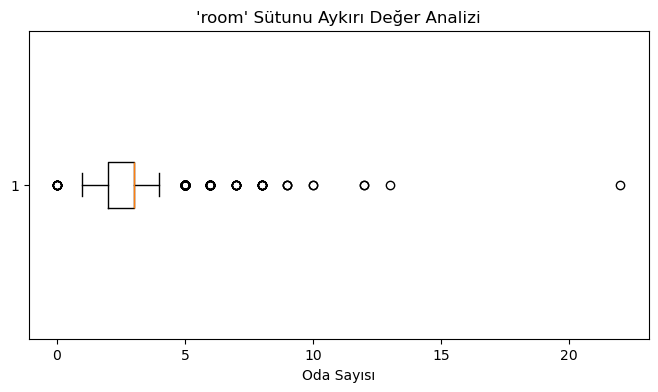

In [221]:
# Kutu grafiği (boxplot) ile görselleştirme
plt.figure(figsize=(8, 4))
plt.boxplot(df['room'], vert=False)
plt.title("'room' Sütunu Aykırı Değer Analizi")
plt.xlabel("Oda Sayısı")
plt.show()


In [222]:
df['room'].value_counts()

room
2     789
3     690
4     317
1     222
5      92
6      30
0      10
8      10
7       8
9       3
10      2
12      2
22      1
13      1
Name: count, dtype: int64

In [223]:
df[df['room'].isin([22])]
#buna baktım buyuk bır cıftlık evı ve bırcok kucuk kucuk evden olusuyor 
#model eğitildikten sonra sonuca göre kaldırılacak

,listingId,title,description,price,currency,residence,timeShareName,room,livingRoom,bathRoom,...,latitude,longitude,distance_to_sakarya_center_km,distance_to_karasu_km,distance_to_sapanca_km,distance_to_sakarya_university_km,sakarya_center_category,karasu_category,sapanca_category,sakarya_university_category
2005,9887-2576,-SATILIK-TAVUKÇUOĞLU EMLAK ADAPAZARI ARİFİYE'D...,"<p style=\""text-align:center\""><b>&nbsp;TAVUKÇ...",130000000,TL,NaN,NaN,22,0,0,...,40.666336,30.36096,13.211668,117.898264,23.366283,12.997791,10-20 km,20+ km,20+ km,10-20 km


In [224]:
df['livingRoom'].describe()

count    2177.000000
mean        1.022049
std         0.265114
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: livingRoom, dtype: float64

In [225]:
df['bathRoom'].value_counts()

bathRoom
1     1263
2      437
3      308
4      111
0       29
5       17
6        6
8        2
7        1
19       1
21       1
9        1
Name: count, dtype: int64

In [226]:
# 19 ve 21 olan bathRoom değerine sahip satırları bulalım
df[df['bathRoom'].isin([19, 21])]


,listingId,title,description,price,currency,residence,timeShareName,room,livingRoom,bathRoom,...,latitude,longitude,distance_to_sakarya_center_km,distance_to_karasu_km,distance_to_sapanca_km,distance_to_sakarya_university_km,sakarya_center_category,karasu_category,sapanca_category,sakarya_university_category
1227,152668-7,KARASU MERKEZDE STAT YANI 3+1 ZEMİN KAT,"<h3><span style=\""font-size: 12px;\"">﻿</span>S...",2200000,TL,"{""id"":101004,""name"":""Daire""}",NaN,3,1,19,...,41.094950,30.697898,42.794367,79.814264,66.999913,42.730601,20+ km,20+ km,20+ km,20+ km
2084,141500-58,MÜSTAKİL GÖL MANZARALI VİLLAMIZ SATILIK...VİLL...,<p>MÜSTAKİL OLUP MEYVE AĞAÇLARI İLE DOLU ARSAM...,15000000,TL,"{""id"":101007,""name"":""Müstakil Ev""}",NaN,4,1,21,...,40.682743,30.228176,18.389540,115.608115,12.003768,18.781531,10-20 km,20+ km,10-20 km,10-20 km


In [227]:
# Değerleri manuel olarak düzeltme
df['bathRoom'] = df['bathRoom'].replace({19: 1, 21: 2})

In [228]:
# 19 ve 21 olan satırları gör
print(df[df['bathRoom'].isin([19, 21])])

Empty DataFrame
Columns: [listingId, title, description, price, currency, residence, timeShareName, room, livingRoom, bathRoom, isMapHidden, mapLocation, streetView, sqm, numberOfBuilding, entranceHeight, bedCount, floor, age, heating, fuel, build, buildState, land, usage, credit, barter, landRegisterName, housingComplex, rental, authorizedRealtor, furnished, detailUrl, detailDescription, firm, firmUser, category, subCategory, mainCategory, fee, roomAndLivingRoom, isVideoTypeVimeo, onlineVisit, hasBranded, hasUpdateBooster, registerState, listingPropertyOrder, image_count, bulunan_yonler, property_type, Contact, inAttributes_count, outAttributes_count, locationAttributes_count, inAttributes_count_is_missing, outAttributes_count_is_missing, locationAttributes_count_is_missing, price_category, fee_is_missing, days_since_update, Stale_corrected, duration, area_name, district_name, county_name, city_name, tier, latitude, longitude, distance_to_sakarya_center_km, distance_to_karasu_km, dist

In [229]:
df['bathRoom'].isnull().sum()

0

## Banyo Sayısı Doldurma İşlemi

Bu adımda, **banyo sayısı (bathRoom)** eksik veya aykırı olan verileri doğru bir şekilde doldurmak amacıyla kullanılan bir fonksiyon geliştirilmektedir. Verilerin doğru bir şekilde işlenebilmesi için aşağıdaki adımlar takip edilmiştir:

### 1. **Aykırı Değerlerin Hesaplanması**

Öncelikle, banyo sayısındaki aykırı değerler tespit edilmiştir. Aykırı değerleri belirlemek için **İnterquartile Range (IQR)** kullanılmıştır. Bu yöntemle:

- **Alt sınır (lower bound)**: Q1 - 1.5 * IQR
- **Üst sınır (upper bound)**: Q3 + 1.5 * IQR

Bu sınırlar dışındaki veriler aykırı olarak kabul edilir. Aykırı değerler, belirlenen sınırların dışında kalan **bathRoom** verilerini temsil eder.

### 2. **Aykırı Değerleri ve Eksik Verileri Filtreleme**

Aykırı değerler ve eksik veriler filtrelenerek, yalnızca geçerli verilerle işlem yapılmıştır. Geçerli (normal) verilerdeki oda ve banyo sayıları arasındaki ilişki analiz edilmiştir.

### 3. **Oda ve Banyo Sayısı Oranı**

Oda sayısı ile banyo sayısı arasındaki ilişkiyi belirlemek amacıyla **oda/banyo oranı** hesaplanmıştır. Bu oran, geçerli verilerdeki oda sayısının, banyo sayısına oranı olarak hesaplanmıştır. Bu oran, ortalama 2.5 civarındadır.

### 4. **Banyo Sayısı Tahmin Fonksiyonu**

Oda sayısına bağlı olarak banyo sayısını tahmin etmek için bir fonksiyon geliştirilmiştir. Bu fonksiyon, geçerli oda sayısını kullanarak banyo sayısını tahmin eder. Fonksiyonun temel mantığı şu şekildedir:

- Oda sayısı ile banyo sayısı arasındaki ilişkiyi kullanarak banyo sayısını tahmin et.
- Eğer oda sayısı 0 ya da negatifse, tahmin yapılmaz ve `NaN` döndürülür.

### 5. **Açıklamalarda Banyo Sayısının Bulunması**

Eğer oda sayısı ile banyo sayısı arasındaki ilişki kullanılarak tahmin yapılamazsa, satırdaki açıklamalara bakılır. Açıklama metinlerinde "banyo" kelimesi aranır ve buradan çıkarılabilecek banyo sayısı kullanılarak **bathRoom** değeri güncellenir. 

- Açıklamalarda "banyo" kelimesi ve ardından bir sayı varsa, bu sayı kullanılarak banyo sayısı güncellenir.

### 6. **Banyo Sayısı Güncellenmesi**

Bütün bu adımlar tamamlandıktan sonra, **bathRoom** sütunundaki eksik veya aykırı banyo sayısı değerleri doldurulmuştur. Fonksiyon, her bir satır için tekrarlanarak verileri günceller.

Bu işlem, verilerdeki eksiklikleri gidermek ve banyo sayısının doğruluğunu artırmak için etkili bir yöntemdir.


In [230]:
df['bathRoom'].value_counts()

bathRoom
1    1264
2     438
3     308
4     111
0      29
5      17
6       6
8       2
7       1
9       1
Name: count, dtype: int64

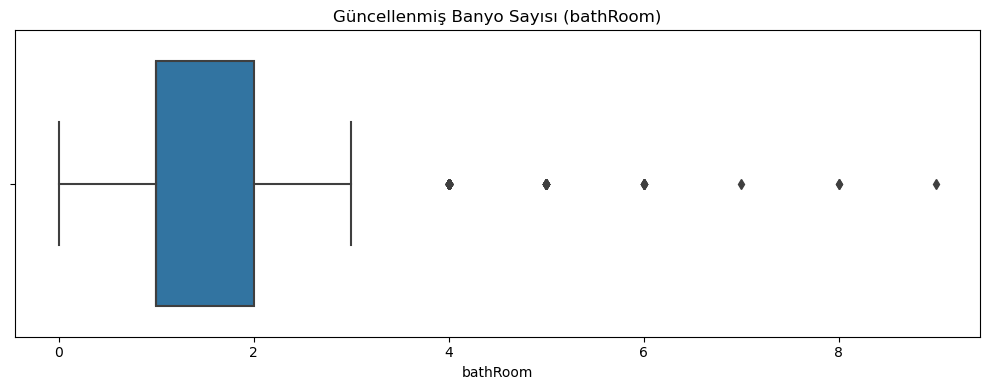

In [231]:


# Görselleştirme ile kontrol
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['bathRoom'])
plt.title('Güncellenmiş Banyo Sayısı (bathRoom)')
plt.tight_layout()
plt.show()

In [232]:
# Aykırı değer sınırlarını hesapla
q1 = df['bathRoom'].quantile(0.25)
q3 = df['bathRoom'].quantile(0.75)
iqr = q3 - q1

alt_sinir = q1 - 1.5 * iqr
ust_sinir = q3 + 1.5 * iqr

# Aykırı değerleri filtrele
outliers = df[(df['bathRoom'] < alt_sinir) | (df['bathRoom'] > ust_sinir)]['bathRoom']

print(f"Aykırı Değer Sınırları: Alt = {alt_sinir}, Üst = {ust_sinir}")
print(f"Toplam aykırı değer sayısı: {len(outliers)}")


Aykırı Değer Sınırları: Alt = -0.5, Üst = 3.5
Toplam aykırı değer sayısı: 138


In [233]:
# Aykırı olmayan veriler
normal_veriler = df[(df['bathRoom'] >= alt_sinir) & (df['bathRoom'] <= ust_sinir) & (df['bathRoom'] > 0)]

# Oda/banyo oranı
oda_banyo_orani = normal_veriler['room'] / normal_veriler['bathRoom']
ortalama_oran = oda_banyo_orani.mean()

# Oda sayısına göre banyo sayısı tahmin fonksiyonu
def banyo_tahmin_et(room):
    if room and room > 0:
        return max(1, round(room / ortalama_oran))
    return np.nan



In [234]:
# Ana düzeltici fonksiyon
def banyo_degeri_bul_akilli(row):
    mevcut = row['bathRoom']
    if pd.isna(mevcut) or (mevcut < alt_sinir) or (mevcut > ust_sinir):
        for col in ['description', 'detailDescription']:
            if isinstance(row.get(col), str):
                match = re.search(r'(\d+)\s*banyo', row[col].lower())
                if match:
                    return int(match.group(1))
        
        if isinstance(row.get('attributes'), str):
            try:
                attr = json.loads(row['attributes'])
                if 'banyo' in attr:
                    return int(attr['banyo'])
                elif 'bathroom' in attr:
                    return int(attr['bathroom'])
                elif 'WC' in attr:
                    return int(attr['WC'])
                elif 'wc' in attr:
                    return int(attr['wc'])
                elif 'tuvalet' in attr:
                    return int(attr['tuvalet'])
            except:
                pass

        return banyo_tahmin_et(row.get('room'))

    return mevcut


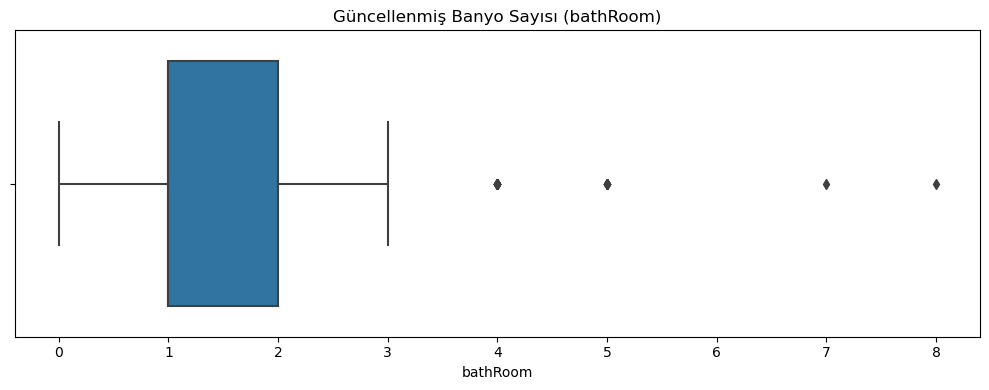

In [235]:

# Güncelleme işlemi (aynı sütunun üzerine yaz)
df['bathRoom'] = df.apply(banyo_degeri_bul_akilli, axis=1)

# Görselleştirme ile kontrol
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['bathRoom'])
plt.title('Güncellenmiş Banyo Sayısı (bathRoom)')
plt.tight_layout()
plt.show()


In [236]:
df[df['listingId'].isin(['152668-7', '141500-58'])]['bathRoom']


1227    1
2084    2
Name: bathRoom, dtype: int64

In [237]:
# IQR sınırlarını hesapla
q1 = df['bathRoom'].quantile(0.25)
q3 = df['bathRoom'].quantile(0.75)
iqr = q3 - q1
alt_sinir = q1 - 1.5 * iqr
ust_sinir = q3 + 1.5 * iqr

# Aykırı değerleri bul
aykiri_maskesi = (df['bathRoom'] < alt_sinir) | (df['bathRoom'] > ust_sinir)
aykiri_sayisi = aykiri_maskesi.sum()

print(f"🔍 Güncel 'bathRoom' sütunundaki aykırı değer sayısı: {aykiri_sayisi}")


🔍 Güncel 'bathRoom' sütunundaki aykırı değer sayısı: 24


In [238]:
df['bathRoom'].describe()

count    2177.000000
mean        1.576481
std         0.833996
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: bathRoom, dtype: float64

In [239]:
df['bathRoom'].value_counts()

bathRoom
1    1265
2     520
3     339
0      29
4      15
5       7
8       1
7       1
Name: count, dtype: int64

In [240]:
df[df['bathRoom'].isin([5])]

,listingId,title,description,price,currency,residence,timeShareName,room,livingRoom,bathRoom,...,latitude,longitude,distance_to_sakarya_center_km,distance_to_karasu_km,distance_to_sapanca_km,distance_to_sakarya_university_km,sakarya_center_category,karasu_category,sapanca_category,sakarya_university_category
21,138402-2086,FİYAT DÜŞTÜ!! SATILIK SERDİVAN'DA MÜSTAKİL BAH...,"<p><br></p> \n<p><br></p> \n<p style=\""color:r...",12350000,TL,NaN,NaN,5,1,5,...,40.793101,30.360920,3.852736,103.883496,24.854305,4.794555,0-5 km,20+ km,20+ km,0-5 km
37,134880-745,LÜKS TRİPLEKS VİLLA REMAX AY ERTANCAN ERYADINDAN,<p>LÜKS TRİPLEKS VİLLA REMAX AY ERTANCAN ERYAD...,28500000,TL,NaN,NaN,6,1,5,...,40.852817,30.302116,11.716116,96.880194,24.211501,12.649536,10-20 km,20+ km,20+ km,10-20 km
159,0-43684653,Sapanca'da güvenlikli site içerisinde satılık...,<p>Sapanca’da Satılık Lüks Villa</p>\n<p><br><...,16500000,TL,"{""id"":101001,""name"":""Bahçe Dubleksi""}","""""",5,1,5,...,40.679142,30.176419,22.265703,116.112481,7.938149,22.740243,20+ km,20+ km,5-10 km,20+ km
353,3995-26559,REMAX REKOR ELİF GÜMRAH Sapanca Kuruçeşme Mah....,"<p style=\""margin-left: 10em;\""><strong style=...",52000000,TL,"{""id"":101008,""name"":""Tripleks""}",NaN,5,2,5,...,40.677715,30.282924,15.328831,116.232631,16.648429,15.537437,10-20 km,20+ km,10-20 km,10-20 km
406,133590-719,SAPANCA KURTKÖYDE SİTE İÇİ HAVUZLU SIFIR VİLLA,"<span style=\""-webkit-tap-highlight-color: rgb...",20750000,TL,"{""id"":101007,""name"":""Müstakil Ev""}","""""",4,1,5,...,40.690167,30.200390,19.898397,114.820025,9.535619,20.375753,10-20 km,20+ km,5-10 km,20+ km
561,148295-79,SAPANCA'DA SEÇKİN ZEVKLER İÇİN DOĞANIN KALBİND...,"<div style=\""text-align:center\""> \n</div> \n<...",11100000,TL,NaN,NaN,4,1,5,...,40.682090,30.286104,14.787593,115.756474,16.827054,15.004828,10-20 km,20+ km,10-20 km,10-20 km
1530,145085-44,DOĞA GAYRİMENKUL DEN NARLI BAHÇE VİLLALARI,<p>Göl mahallesinde tamamlanmak üzere olan &nb...,15000000,TL,NaN,NaN,4,1,5,...,40.691500,30.279690,14.418400,114.693607,16.150802,14.706109,10-20 km,20+ km,10-20 km,10-20 km


In [241]:
df[df['bathRoom'].isin([8])]

,listingId,title,description,price,currency,residence,timeShareName,room,livingRoom,bathRoom,...,latitude,longitude,distance_to_sakarya_center_km,distance_to_karasu_km,distance_to_sapanca_km,distance_to_sakarya_university_km,sakarya_center_category,karasu_category,sapanca_category,sakarya_university_category
251,85563-1848,SAPANCA GÖL EMLAK TAN 670 M² ARSA IÇERISINDE 9...,"<h1><strong style=\""font-family: Arial; color:...",35500000,TL,"{""id"":101008,""name"":""Tripleks""}",NaN,9,2,8,...,40.693097,30.258112,15.680512,114.4722,14.318324,16.044329,10-20 km,20+ km,10-20 km,10-20 km


In [242]:
# bedCount sütununa genel bakış
total_rows = len(df)
null_count = df['bedCount'].isna().sum()
zero_count = (df['bedCount'] == 0).sum()
non_null_rows = df['bedCount'].notna().sum()

print("📊 'bedCount' Sütun Özeti:")
print(f"- Veri tipi: {df['bedCount'].dtype}")
print(f"- Toplam satır: {total_rows}")
print(f"- Null (eksik) değer sayısı: {null_count} ({(null_count / total_rows) * 100:.2f}%)")
print(f"- 0 olan değer sayısı: {zero_count} ({(zero_count / total_rows) * 100:.2f}%)")
print(f"- Null olmayan satır sayısı: {non_null_rows} ({(non_null_rows / total_rows) * 100:.2f}%)")


📊 'bedCount' Sütun Özeti:
- Veri tipi: float64
- Toplam satır: 2177
- Null (eksik) değer sayısı: 76 (3.49%)
- 0 olan değer sayısı: 2101 (96.51%)
- Null olmayan satır sayısı: 2101 (96.51%)


In [243]:
#bedCount sütunu sadece 0 ve null değerlerden oluştuğu için siliyoruz

df = df.drop(columns=['bedCount'])


In [244]:
df['floor'].head(10)

0        {"id":101216,"count":4,"name":"2. Kat"}
1        {"id":101216,"count":3,"name":"2. Kat"}
2              {"id":null,"count":2,"name":null}
3        {"id":101217,"count":3,"name":"3. Kat"}
4              {"id":null,"count":3,"name":null}
5    {"id":101214,"count":3,"name":"En Üst Kat"}
6              {"id":null,"count":2,"name":null}
7        {"id":101217,"count":3,"name":"3. Kat"}
8              {"id":null,"count":3,"name":null}
9              {"id":null,"count":3,"name":null}
Name: floor, dtype: object

In [245]:
df['floor'].value_counts()

floor
{"id":null,"count":3,"name":null}              340
{"id":null,"count":2,"name":null}              217
{"id":101216,"count":3,"name":"2. Kat"}        214
{"id":101217,"count":3,"name":"3. Kat"}        168
{"id":101237,"count":3,"name":"Ara Kat"}       132
                                              ... 
{"id":101203,"count":4,"name":"Bodrum"}          1
{"id":101205,"count":5,"name":"Zemin"}           1
{"id":101207,"count":1,"name":"Bah�e Kati"}      1
{"id":101215,"count":3,"name":"1.Kat"}           1
{"id":101207,"count":5,"name":"Bahçe Katı"}      1
Name: count, Length: 91, dtype: int64

In [246]:
null_count = df['floor'].isna().sum()
total_count = len(df)
null_percentage = (null_count / total_count) * 100

print(f"Null değer sayısı: {null_count}")
print(f"Null değer yüzdesi: %{null_percentage:.2f}")

Null değer sayısı: 10
Null değer yüzdesi: %0.46


## Floor (Kat) Verisinin İşlenmesi

Bu adımda, **floor** sütunundaki eksik ve aykırı verileri temizlemek ve doğru bir şekilde işlemek amacıyla aşağıdaki işlemler yapılacaktır.

### 1. **floor Sütununun Ayrılması**

İlk olarak, **floor** sütunu 3 ayrı sütuna ayrılacaktır:

- **floorID**: Binanın kat kimliği.
- **floorName**: Binadaki kat ismi (örneğin, "1. Kat", "2. Kat", vb.).
- **floorCount**: Binadaki toplam kat sayısı.

Bu adım, kat ile ilgili bilgilerin daha anlamlı ve işlenebilir bir şekilde düzenlenmesini sağlar.

### 2. **Null Değerlerin Tespiti ve Doldurulması**

- **floorID** ve **floorName** sütunlarındaki **null** değerler kontrol edilecektir. Bu iki sütundaki eksik veriler, **birbirleriyle ilişkilendirilerek** tamamlanacaktır. Yani, bir sütundaki değer eksikse, diğer sütundaki veriler kullanılarak eksik veri tamamlanacaktır.

- **floorCount** sütunundaki **null** değerler, **Description** ve diğer açıklama sütunlarındaki bilgilerle doldurulmaya çalışılacaktır. Eğer bu da mümkün değilse, eksik verileri doldurmak için farklı bir strateji belirlenerek uygun şekilde tamamlanacaktır.

### 3. **floorFloat ve countFloat Sütunlarının Oluşturulması**

- **floorName** sütununun sayısal bir karşılığını oluşturmak amacıyla yeni bir sütun **floorFloat** oluşturulacaktır. Bu sütun, **floorName** değerlerinin **float64** tipine dönüştürülmesiyle elde edilecektir.
  
- Aynı şekilde, **floorCount** sütunu da **float64** tipine dönüştürülerek yeni bir sütun olan **countFloat** oluşturulacaktır.

### 4. **floorRatio Sütununun Hesaplanması**

Son olarak, **floorFloat** ve **countFloat** sütunları kullanılarak **floorRatio** adlı yeni bir sütun oluşturulacaktır. Bu sütun, bir dairenin bulunduğu kat ile binadaki toplam kat sayısının oranını gösterecektir. Bu oran, dairenin hangi kat ve hangi binada yer aldığı bilgilerini daha anlaşılır bir şekilde sunacaktır.


In [247]:

def parse_floor_info(val):
    try:
        floor_data = json.loads(val.replace("'", "\"")) if isinstance(val, str) else {}
        return pd.Series({
            'floorID': floor_data.get('id', np.nan),
            'floorName': floor_data.get('name', np.nan),
            'floorCount': floor_data.get('count', np.nan)
        })
    except:
        return pd.Series({'floorID': np.nan, 'floorName': np.nan, 'floorCount': np.nan})

df[['floorID', 'floorName', 'floorCount']] = df['floor'].apply(parse_floor_info)

# Her bir yeni sütundaki null (NaN) değer sayısını yazdırıyoruz
print("Null değer sayıları:")
print(f"floorID      : {df['floorID'].isna().sum()}")
print(f"floorName    : {df['floorName'].isna().sum()}")
print(f"floorCount   : {df['floorCount'].isna().sum()}")

Null değer sayıları:
floorID      : 605
floorName    : 606
floorCount   : 10


In [248]:
# Aynı ID'ye sahip satırlar varsa, o ID'ye ait floorName'i boş olanlara atama
df['floorName'] = df.groupby('floorID')['floorName'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Aynı floorName'e sahip satırlar varsa, ID'si boş olanlara ID'yi atama
df['floorID'] = df.groupby('floorName')['floorID'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


C:\Users\dilar\AppData\Local\Temp\ipykernel_2532\1497221182.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['floorName'] = df.groupby('floorID')['floorName'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
C:\Users\dilar\AppData\Local\Temp\ipykernel_2532\1497221182.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['floorID'] = df.groupby('floorName')['floorID'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [249]:
# floorName ve floorID sütunlarında kalan null değer sayısı
print("Güncel null değer sayıları:")
print("floorName null sayısı:", df['floorName'].isna().sum())
print("floorID null sayısı:", df['floorID'].isna().sum())


Güncel null değer sayıları:
floorName null sayısı: 606
floorID null sayısı: 606


In [250]:
# Kat ifadelerini eşleştiren sözlük
kat_terimleri = {
    "zemin": "Zemin Kat",
    "giriş": "Zemin Kat",
    "bahçe": "Zemin Kat",
    "bodrum": "Bodrum Kat",
    "1. kat": "1. Kat",
    "birinci kat": "1. Kat",
    "2. kat": "2. Kat",
    "ikinci kat": "2. Kat",
    "3. kat": "3. Kat",
    "üçüncü kat": "3. Kat",
    "en üst": "En Üst Kat",
    "çatı": "Çatı Katı"
}

def floor_name_bul(row):
    if pd.isna(row['floorName']):
        text_sources = [row.get('description', ''), row.get('detailDescription', '')]
        for text in text_sources:
            if isinstance(text, str):
                text_lower = text.lower()
                for anahtar, deger in kat_terimleri.items():
                    if anahtar in text_lower:
                        return deger
    return row['floorName']

df['floorName'] = df.apply(floor_name_bul, axis=1)


In [251]:
df['floorName'].value_counts()

floorName
2. Kat          324
Zemin Kat       301
Bahçe Katı      279
3. Kat          211
Ara Kat         163
Yüksek Giriş    161
1. Kat          154
En Üst Kat      101
4. Kat           38
Giriş Katı       28
Zemin            19
Çatı Katı        11
Villa Katı       11
Bah�e Kati       10
YüksekGiriş       7
5. Kat            6
2.Kat             6
Y�ksek Giris      5
3. Floor          5
BahçeKatı         5
Kot 3             3
Kot 2             3
Middle Floor      2
2. Floor          2
1. Floor          2
EnÜstKat          2
3.Kat             2
AraKat            2
Bodrum            2
1.Kat             2
Kot 1             2
En �st Kat        2
4.Kat             1
Y�ksek Giri�      1
Bah�e Kat�        1
GirişKatı         1
Tripleks          1
Garden Floor      1
Ground Floor      1
Bodrum Kat        1
Teras Katı        1
Top Floor         1
Name: count, dtype: int64

In [252]:
#floorName sütunu için biraz düzeltme
# Düzgün eşleşmeler için normalize edilen kat adları
floor_mapping = {
    '2. Kat': '2. Kat', '2.Kat': '2. Kat', '2. Floor': '2. Kat',
    '3. Kat': '3. Kat', '3.Kat': '3. Kat', '3. Floor': '3. Kat',
    '4. Kat': '4. Kat', '4.Kat': '4. Kat',
    '5. Kat': '5. Kat',
    '1. Kat': '1. Kat', '1.Kat': '1. Kat', '1. Floor': '1. Kat',
    'Zemin Kat': 'Zemin Kat', 'Zemin': 'Zemin Kat',
    'Giriş Katı': 'Giriş Katı', 'GirişKatı': 'Giriş Katı',
    'Bahçe Katı': 'Bahçe Katı', 'BahçeKatı': 'Bahçe Katı', 'Bah�e Kati': 'Bahçe Katı', 'Bah�e Kat�': 'Bahçe Katı',
    'Yüksek Giriş': 'Yüksek Giriş', 'YüksekGiriş': 'Yüksek Giriş', 'Y�ksek Giris': 'Yüksek Giriş', 'Y�ksek Giri�': 'Yüksek Giriş',
    'Ara Kat': 'Ara Kat', 'AraKat': 'Ara Kat',
    'En Üst Kat': 'En Üst Kat', 'En �st Kat': 'En Üst Kat', 'EnÜstKat': 'En Üst Kat',
    'Çatı Katı': 'Çatı Katı',
    'Teras Katı': 'Teras Katı',
    'Kot 1': 'Kot -1', 'Kot 2': 'Kot -2', 'Kot 3': 'Kot -3',
    'Middle Floor': 'Ara Kat', 'Top Floor': 'En Üst Kat',
    'Ground Floor': 'Zemin Kat', 'Garden Floor': 'Bahçe Katı',
    'Villa Katı': 'Villa Katı',
    'Tripleks': 'Tripleks',
    'Bodrum': 'Bodrum Kat', 'Bodrum Kat': 'Bodrum Kat'
}

# Temizleme işlemi (eşleşmeyenler olduğu gibi kalır)
df['floorName'] = df['floorName'].map(floor_mapping).fillna(df['floorName'])


In [253]:
df['floorName'].value_counts()

floorName
2. Kat          332
Zemin Kat       321
Bahçe Katı      296
3. Kat          218
Yüksek Giriş    174
Ara Kat         167
1. Kat          158
En Üst Kat      106
4. Kat           39
Giriş Katı       29
Çatı Katı        11
Villa Katı       11
5. Kat            6
Bodrum Kat        3
Kot -3            3
Kot -2            3
Kot -1            2
Teras Katı        1
Tripleks          1
Name: count, dtype: int64

In [254]:
df['floorName'].isna().sum()

296

In [255]:
def floor_count_bul(row):
    if pd.isna(row['floorCount']):
        # Açıklamalardan sayısal kat bilgisi arama
        text_sources = [row.get('description', ''), row.get('detailDescription', '')]
        for text in text_sources:
            if isinstance(text, str):
                match = re.search(r'(\d+)\s*(katlı|kat)', text.lower())
                if match:
                    return int(match.group(1))
        # JSON içindeki attributes sütunundan floorCount arama
        if isinstance(row.get('attributes'), str):
            try:
                attr = json.loads(row['attributes'])
                for key in ['binaKatSayisi', 'floorCount']:
                    if key in attr and str(attr[key]).isdigit():
                        return int(attr[key])
            except:
                pass
    return row['floorCount']

df['floorCount'] = df.apply(floor_count_bul, axis=1)

In [256]:
print(df['floorCount'].value_counts())

floorCount
3.0      1369
2.0       474
4.0       203
1.0        63
5.0        54
8.0         2
10.0        1
11.0        1
314.0       1
Name: count, dtype: int64


In [257]:
df['floorCount'].head()

0    4.0
1    3.0
2    2.0
3    3.0
4    3.0
Name: floorCount, dtype: float64

In [258]:
print("floorCount sütunundaki kalan null değer sayısı:", df['floorCount'].isna().sum())

floorCount sütunundaki kalan null değer sayısı: 9


In [259]:
# 1. Eşleşme sözlüğü: floorName'e göre floorID eşlemesi
floor_mapping = {
    '2. kat': 101216.0,
    '2.kat': 101216.0,
    '3. kat': 101217.0,
    '3.kat': 101217.0,
    'en üst kat': 101214.0,
    'en st kat': 101214.0,
    'enüstkat': 101214.0,
    'bahçe katı': 101207.0,
    'bahçekatı': 101207.0,
    'bahe kati': 101207.0,
    'bahe kat': 101207.0,
    '1. kat': 101215.0,
    '1.kat': 101215.0,
    'zemin kat': 101209.0,
    'zemin': 101209.0,
    'bodrum kat': 101208.0,
    'bodrumkat': 101208.0,
    'bodrum': 101208.0,
    'bodrum katı': 101208.0,
    'giriş katı': 101210.0,
    'girişkatı': 101210.0,
    'ara kat': 101219.0,
    'arakat': 101219.0,
    'yüksek giriş': 101213.0,
    'yksk giris': 101213.0,
    'yksk giri': 101213.0,
    'yüksekgiriş': 101213.0,
    'teras katı': 101218.0,
    'teras kat': 101218.0,
    'villa katı': 101205.0,
    '5. kat': 101237.0,
    '5.kat': 101237.0,
    '4. kat': 101236.0,
    '4.kat': 101236.0,
    'kot 1': 101212.0,
    'kot 2': 101202.0,
    'kot 3': 101203.0,
    'çatı katı': 101201.0,
    'top floor': 101214.0,
    'ground floor': 101209.0,
    'garden floor': 101207.0,
    'middle floor': 101219.0,
    '1. floor': 101215.0,
    '2. floor': 101216.0,
    '3. floor': 101217.0
    # Diğerleri için de ihtiyaca göre ekleme yapılabilir
}

# 2. floorID sütunundaki null'ları, floorName'e göre eşleşen ID ile doldur
df['floorID'] = df.apply(
    lambda row: floor_mapping.get(row['floorName'], row['floorID']), axis=1
)
# 3. Sonuç: Kaç null kaldı?
null_count = df['floorID'].isna().sum()
print(f"Kalan null floorID sayısı: {null_count}")

Kalan null floorID sayısı: 606


In [260]:
# Kat isimlerini sayıya eşleyen sözlük
pd.options.display.float_format = '{:.0f}'.format

floorName_map = {
    "Bodrum Kat": -4,
    "Bodrum": -4,
    "Kot 3": -3,
    "Kot3": -3,
    "Kot 2": -2,
    "Kot2": -2,
    "Kot 1": -1,
    "Kot1": -1,
    "Kot -2": -2,
    "Kot -3": -3,
    "Kot -1": -1,
    "Zemin Kat": 0,
    "Giriş Katı": 0,
    "Zemin": 0,
    "Ground Floor": 0,
    "GirişKatı": 0,
    "1. Floor": 1,
    "1.Kat": 1,
    "1. Kat": 1,
    "2. Floor": 2,
    "2.Kat": 2,
    "2. Kat": 2,
    "3. Floor": 3,
    "3.Kat": 3,
    "3. Kat": 3,
    "4. Kat": 4,
    "4.Kat": 4,
    "5.Kat": 5,
    "5. Kat": 5,
    "AraKat": "Ara Kat",
    "Y�ksek Giri�": 1,
    "Y�ksek Giris": 1,
    "YüksekGiriş": 1,
    "EnÜstKat": "En Üst Kat",
    "Top Floor": "En Üst Kat",
    "En �st Kat": "En Üst Kat",
    "Bah�e Kati": 0,
    "BahçeKatı": 0,
    "Garden Floor": 0,
    "Bahçe Katı": 0,
    "Bah�e Kat�": 0
}

# floorName sütunundaki eşleşen stringleri sayısal değere çevir
df['floorNameFloat'] = df['floorName'].map(floorName_map)
df['floorNameFloat'].value_counts()

floorNameFloat
0     646
2     332
3     218
1     158
4      39
5       6
-4      3
-3      3
-2      3
-1      2
Name: count, dtype: int64

In [261]:
####ara kat flourcountın orta değerini alacak


In [262]:
# 1. floorCount sütununu float64'e çeviriyoruz
df['floorCount'] = df['floorCount'].astype('float64')

In [263]:
# 2. floorNameFloat null olan ve floorName belirli olan değerleri dolduruyoruz
import numpy as np

# 1. Sayısal karşılıkları eşleştir
df['floorNameFloat'] = df['floorName'].map(floorName_map)

# 2. En üst kat ve tripleks
df.loc[
    (df['floorNameFloat'].isnull()) & 
    (df['floorName'].isin(['En Üst Kat', 'Tripleks'])) & 
    (df['floorCount'].notnull()),
    'floorNameFloat'
] = df['floorCount']

# 3. Teras / çatı katı
df.loc[
    (df['floorNameFloat'].isnull()) & 
    (df['floorName'].isin(['Villa Katı', 'Çatı Katı','Teras Katı'])) & 
    (df['floorCount'].notnull()),
    'floorNameFloat'
] = df['floorCount'] + 1

# 4. Ara kat -> yukarı yuvarla
df.loc[
    (df['floorNameFloat'].isnull()) & 
    (df['floorName'].isin(['Ara Kat'])) & 
    (df['floorCount'].notnull()),
    'floorNameFloat'
] = np.ceil(df['floorCount'] / 2)


In [264]:
df['floorNameFloat'] = df['floorNameFloat'].astype('Int64')

In [265]:
df['floorNameFloat'].value_counts()

floorNameFloat
0     646
2     490
3     307
1     169
4      68
5      16
-4      3
-3      3
-2      3
-1      2
Name: count, dtype: Int64

In [266]:
df['floorCountFloat'] = pd.to_numeric(df['floorCount'], errors='coerce')
df['floorRatio'] = df['floorNameFloat'] / df['floorCountFloat']
print(f"'floorRatio' sütunundaki null (NaN) değer sayısı: {df['floorRatio'].isna().sum()}")

'floorRatio' sütunundaki null (NaN) değer sayısı: 474


In [267]:
df['floorID'].isna().sum()

606

In [268]:
df['floorName'].isna().sum()

296

In [269]:
df['floorCount'].isna().sum()

9

In [270]:
df['floorCount'].value_counts().get(0, 0)


0

In [271]:
# floorCount sütunu boş (NaN) olan satırları göster
missing_floorcount = df[df['floorCount'].isna()]
print(missing_floorcount[['listingId', 'floorName', 'floorCount']])

      listingId  floorName  floorCount
280  147368-153  Zemin Kat         NaN
282  147368-155        NaN         NaN
285  147368-158        NaN         NaN
286  147368-159  Zemin Kat         NaN
291  147368-164  Zemin Kat         NaN
292  147368-165        NaN         NaN
293  147368-166  Zemin Kat         NaN
297  120340-614        NaN         NaN
298  120340-615        NaN         NaN


arsa tarla bahçe bunların floorcount değerleri 0 ile dolduruluyor

In [272]:
# floorCount sütunu NaN olan (ve arsa/bahçe olduğu bilinen) satırları 0 yap
df.loc[df['floorCount'].isna(), 'floorCount'] = 0


In [273]:
# Koşul: property_type istenenlerden biri VE floorName 'Zemin Kat' veya NaN
condition = (
    df['property_type'].isin(['Bahçe', 'İmarlı Konut', 'Konut Ticaret', 'Tarla']) &
    (
        (df['floorName'].isna()) |
        (df['floorName'].str.lower() == 'zemin kat')
    )
)

# floorName değerini 'Yapı Yok' yap
df.loc[condition, 'floorName'] = 'Yapı Yok'

In [274]:
# Only run this once to store the original rooms per floor (must come BEFORE modifying 'room')
if 'rooms_per_floor' not in df.columns:
    df['rooms_per_floor'] = df['room']  # make a backup

# Filter only rows where the property type is 'bina'
bina_mask = df['property_type'] == 'Bina'

# Update 'room' only for 'bina' rows using the original per-floor value
df.loc[bina_mask, 'room'] = df.loc[bina_mask, 'floorCount'] * df.loc[bina_mask, 'rooms_per_floor']

# Print the updated rows to verify
print(df[bina_mask][['property_type', 'floorCount', 'room', 'roomAndLivingRoom']])


     property_type  floorCount  room roomAndLivingRoom
69            Bina           3    27               9+3
157           Bina           3    12               4+1
208           Bina           3    18               6+3
411           Bina           3    24               8+2
501           Bina           3     9               3+1
543           Bina           3    15               5+3
546           Bina           2     4               2+1
739           Bina           3     9               3+1
767           Bina           3    15               5+1
1019          Bina           2     4               2+1
1037          Bina           2    12               6+2
1249          Bina           3     9               3+3
1250          Bina           3     9               3+3
1323          Bina           3     9               3+1
1633          Bina           4     8               2+1
1635          Bina           3     9               3+1
1841          Bina           2     6               3+2
1916      

In [275]:
# Only run this once to store the original rooms per floor (must come BEFORE modifying 'room')
if 'livingroom_per_floor' not in df.columns:
    df['livingroom_per_floor'] = df['livingRoom']  # make a backup

# Filter only rows where the property type is 'bina'
bina_mask = df['property_type'] == 'Bina'

# Update 'room' only for 'bina' rows using the original per-floor value
df.loc[bina_mask, 'livingRoom'] = df.loc[bina_mask, 'floorCount'] * df.loc[bina_mask, 'livingroom_per_floor']

# Print the updated rows to verify
print(df[bina_mask][['property_type', 'floorCount','livingRoom','roomAndLivingRoom']])

     property_type  floorCount  livingRoom roomAndLivingRoom
69            Bina           3           9               9+3
157           Bina           3           3               4+1
208           Bina           3           9               6+3
411           Bina           3           6               8+2
501           Bina           3           3               3+1
543           Bina           3           9               5+3
546           Bina           2           2               2+1
739           Bina           3           3               3+1
767           Bina           3           3               5+1
1019          Bina           2           2               2+1
1037          Bina           2           4               6+2
1249          Bina           3           9               3+3
1250          Bina           3           9               3+3
1323          Bina           3           3               3+1
1633          Bina           4           4               2+1
1635          Bina      

In [276]:
if 'rooms_per_floor' in df.columns:
    df = df.drop(columns=['rooms_per_floor'])

if 'livingroom_per_floor' in df.columns:
    df = df.drop(columns=['livingroom_per_floor'])

In [277]:
#  Filter the DataFrame for 'bina' rows and print the selected columns
print(df[df['property_type'] == 'Bina'][['property_type', 'room', 'livingRoom', 'roomAndLivingRoom']])

     property_type  room  livingRoom roomAndLivingRoom
69            Bina    27           9               9+3
157           Bina    12           3               4+1
208           Bina    18           9               6+3
411           Bina    24           6               8+2
501           Bina     9           3               3+1
543           Bina    15           9               5+3
546           Bina     4           2               2+1
739           Bina     9           3               3+1
767           Bina    15           3               5+1
1019          Bina     4           2               2+1
1037          Bina    12           4               6+2
1249          Bina     9           9               3+3
1250          Bina     9           9               3+3
1323          Bina     9           3               3+1
1633          Bina     8           4               2+1
1635          Bina     9           3               3+1
1841          Bina     6           4               3+2
1916      

In [278]:
# Only run this once to store the original bathRooms per floor (must come BEFORE modifying 'bathRoom')
if 'bathRooms_per_floor' not in df.columns:
    df['bathRooms_per_floor'] = df['bathRoom']  # make a backup

# Filter only rows where the property type is 'bina'
bina_mask = df['property_type'] == 'Bina'

# Update 'bathRoom' only for 'bina' rows using the original per-floor value
df.loc[bina_mask, 'bathRoom'] = df.loc[bina_mask, 'floorCount'] * df.loc[bina_mask, 'bathRooms_per_floor']

# Print the updated rows to verify
print(df[bina_mask][['property_type', 'floorCount','bathRoom']])

     property_type  floorCount  bathRoom
69            Bina           3         9
157           Bina           3         3
208           Bina           3         9
411           Bina           3        12
501           Bina           3         3
543           Bina           3         9
546           Bina           2         2
739           Bina           3         3
767           Bina           3         6
1019          Bina           2         2
1037          Bina           2         4
1249          Bina           3         9
1250          Bina           3         9
1323          Bina           3         3
1633          Bina           4         4
1635          Bina           3         3
1841          Bina           2         4
1916          Bina           3         6
1963          Bina           2         2
1970          Bina           3         3
1996          Bina           4         8
2006          Bina           3         3
2080          Bina           2         2


In [279]:
if 'bathRooms_per_floor' in df.columns:
    df = df.drop(columns=['bathRooms_per_floor'])

In [280]:
#entranceHeight SÜTUNUNA BAKIYORUZ

#toplam satır sayısını alıyoruz
total_rows = len(df)

# 0 olan değerlerin sayısı ve yüzdesi
zero_count = (df['entranceHeight'] == 0).sum()
zero_percent = 100 * zero_count / total_rows

# Null (NaN) olan değerlerin sayısı ve yüzdesi
null_count = df['entranceHeight'].isna().sum()
null_percent = 100 * null_count / total_rows

# Sonuçları yazdır
print(f"0 olan entranceHeight değer sayısı: {zero_count} (%{zero_percent:.2f})")
print(f"NaN olan entranceHeight değer sayısı: {null_count} (%{null_percent:.2f})")


0 olan entranceHeight değer sayısı: 2101 (%96.51)
NaN olan entranceHeight değer sayısı: 76 (%3.49)


In [281]:
#entranceHeight SÜTUNU 0 VE NULL DEĞERELERDEN OLUŞUYOR BU SÜTUNU SİLİYORUZ
df = df.drop(columns=['entranceHeight'])
print("entranceHeight sütunu başarıyla silindi.")


entranceHeight sütunu başarıyla silindi.


In [282]:
#age SÜTUNUNA BAKIYORUZ

# 1. Temel istatistikler
mean_age = df['age'].mean()
median_age = df['age'].median()
min_age = df['age'].min()
max_age = df['age'].max()
std_age = df['age'].std()
print("Temel İstatistikler:")
print(f"Ortalama: {mean_age:.2f}")
print(f"Medyan: {median_age}")
print(f"Minimum: {min_age}")
print(f"Maksimum: {max_age}")
print(f"Standart Sapma: {std_age:.2f}")

# 2. Eşsiz değerler ve dağılım
print("\nEşsiz Değerler (ilk 20):")
print(df['age'].value_counts().tail(20).sort_index())

# 3. Null ve 0 kontrolü
null_count = df['age'].isna().sum()
zero_count = (df['age'] == 0).sum()
total = len(df)
print(f"\nNull Değer Sayısı: {null_count} ({(null_count/total)*100:.2f}%)")
print(f"0 Değer Sayısı: {zero_count} ({(zero_count/total)*100:.2f}%)")

# 4. Aykırı değer kontrolü (örneğin 100 yaş üstü)
outlier_count = (df['age'] > 100).sum()
print(f"100 üzeri yaş değeri sayısı: {outlier_count}")


Temel İstatistikler:
Ortalama: 6.81
Medyan: 4.0
Minimum: 0.0
Maksimum: 695.0
Standart Sapma: 17.48

Eşsiz Değerler (ilk 20):
age
9      14
13     14
14     10
17     11
18      6
19      4
22      4
23      3
24     10
27      6
28      3
32      6
34      2
35     12
40     10
42      1
45      4
46      1
50      1
695     1
Name: count, dtype: int64

Null Değer Sayısı: 86 (3.95%)
0 Değer Sayısı: 824 (37.85%)
100 üzeri yaş değeri sayısı: 1


C:\Users\dilar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


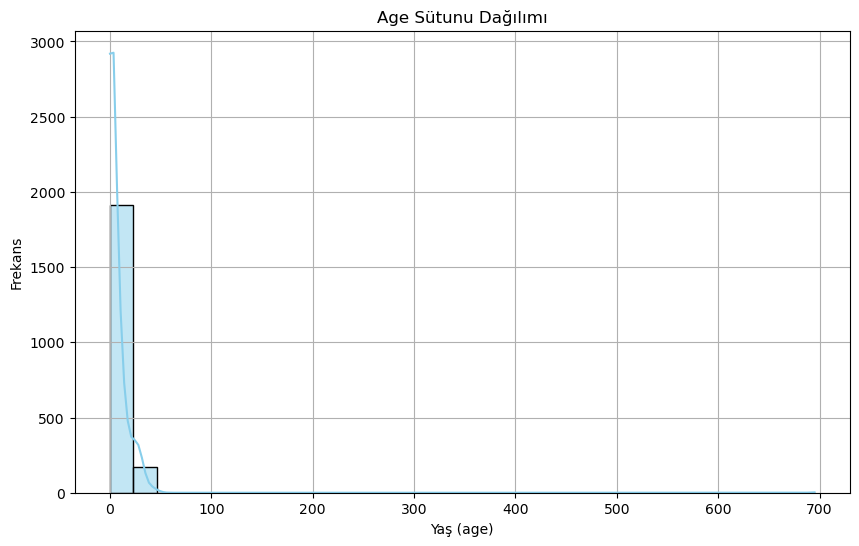

In [283]:
#AYKIRI DEĞER SINIRINI BULABİLMEK İÇİN AGE SÜTUNU DAĞILIMINA BAKIYORUZ

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=30, kde=True, color='skyblue')
plt.title('Age Sütunu Dağılımı')
plt.xlabel('Yaş (age)')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()


In [284]:
# Age sütununda 40'tan büyük olan değerleri NaN yap
df.loc[df['age'] > 40, 'age'] = np.nan

# Sonuçları kontrol et: Kaç tane değer değişti?
print("40'tan büyük olan ve NaN yapılan değer sayısı:", df['age'].isna().sum())

print(sorted(df['age'].dropna().unique())[-20:])

40'tan büyük olan ve NaN yapılan değer sayısı: 94
[15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 30.0, 31.0, 32.0, 34.0, 35.0, 40.0]


In [285]:
import warnings
warnings.filterwarnings('ignore')


# JSON formatındaki sütunları parse etmek için fonksiyon
def parse_json_column(json_str):
    if pd.isna(json_str):
        return None, None
    try:
        data = json.loads(json_str)
        return data.get('id'), data.get('name')
    except:
        return None, None

# 1. Adım: buildState sütunundan yaş çıkar
df['buildState_id'], df['buildState_name'] = zip(*df['buildState'].apply(parse_json_column))

def assign_age_from_buildstate(row):
    if not pd.isna(row['age']):
        return row['age']
    if row['buildState_name'] in ['Sıfır', 'Sifir', '0', 'Yapım Aşamasında']:
        return 0
    return np.nan

df['age'] = df.apply(assign_age_from_buildstate, axis=1)

# 2. Adım: description ve detailDescription'dan yaş çıkar
def extract_age_from_text(text):
    if pd.isna(text):
        return None
    patterns = [
        r'(\d+)\s*yaşında', r'(\d+)\s*yaşındadır', r'(\d+)\s*yıllık',
        r'(\d+)\s*yaşında\s*bina', r'bina\s*yaşı\s*(\d+)',
        r'(\d+)\s*yaş', r'yaş\s*:\s*(\d+)', r'yaş\s*(\d+)'
    ]
    for pattern in patterns:
        matches = re.findall(pattern, text.lower())
        if matches:
            try:
                age = int(matches[0])
                if 0 <= age <= 100:
                    return age
            except:
                continue
    return None

def extract_age_from_descriptions(row):
    if not pd.isna(row['age']):
        return row['age']
    for col in ['description', 'detailDescription']:
        age = extract_age_from_text(row.get(col))
        if age is not None:
            return age
    return row['age']

df['age'] = df.apply(extract_age_from_descriptions, axis=1)

# 3. Adım: district bazlı doldurma
# Burada doğru sütun adını kullanarak district sütunu üzerinde işlem yapıyoruz
df['district_id'], df['district_name'] = zip(*df['district_name'].apply(parse_json_column))  # district_name sütunu kullanıldı
district_avg_ages = df.groupby('district_id')['age'].mean().to_dict()

def fill_age_with_district_avg(row):
    if not pd.isna(row['age']):
        return row['age']
    return district_avg_ages.get(row['district_id'], np.nan)

df['age'] = df.apply(fill_age_with_district_avg, axis=1)

# 4. Adım: build bazlı doldurma
df['build_id'], df['build_name'] = zip(*df['build'].apply(parse_json_column))
build_avg_ages = df.groupby('build_id')['age'].mean().to_dict()

def fill_age_with_build_avg(row):
    if not pd.isna(row['age']):
        return row['age']
    return build_avg_ages.get(row['build_id'], np.nan)

df['age'] = df.apply(fill_age_with_build_avg, axis=1)

# 5. Adım: medyan ile doldurma
median_age = df['age'].median()           #KALANLARI MEDYAN İLE DOLDURMA AŞAMASI
df['age'] = df['age'].fillna(median_age)

# Yaşları yuvarla ve tipini düzenle
df['age'] = df['age'].round().astype('Int64')

# Sonuçları göster
print("\nDoldurma sonrası age sütunu null sayısı:", df['age'].isnull().sum())
print("\nAge sütunu istatistikleri:")
print(df['age'].describe())



Doldurma sonrası age sütunu null sayısı: 0

Age sütunu istatistikleri:
count   2177
mean       6
std        8
min        0
25%        0
50%        4
75%        8
max       40
Name: age, dtype: Float64


In [286]:
df = df.drop(columns = ['district_id', 'district_name', 'buildState_id', 'buildState_name', 'build_id', 'build_name'])

In [287]:
columns_to_analyze = ['room', 'livingRoom', 'bathRoom', 'floor', 'age']

null_counts = df[columns_to_analyze].isnull().sum()

print(null_counts)

room           0
livingRoom     0
bathRoom       0
floor         10
age            0
dtype: int64


In [288]:
def safe_parse(val):
    if pd.isna(val):
        return {"id": 101704, "name": "Belirtilmemiş"}
    try:
        data = ast.literal_eval(val)
        if data.get("name") is None:
            data["name"] = "Belirtilmemiş"
        return data
    except:
        return {"id": 101704, "name": "Belirtilmemiş"}

df['usage'] = df['usage'].apply(safe_parse)

In [289]:
df['usage']

0            {'id': 101701, 'name': 'Boş'}
1            {'id': 101701, 'name': 'Boş'}
2            {'id': 101701, 'name': 'Boş'}
3            {'id': 101701, 'name': 'Boş'}
4            {'id': 101701, 'name': 'Boş'}
                       ...                
2175         {'id': 101701, 'name': 'Boş'}
2176    {'id': 101702, 'name': 'Kiracılı'}
2177         {'id': 101701, 'name': 'Boş'}
2178         {'id': 101701, 'name': 'Boş'}
2179         {'id': 101701, 'name': 'Boş'}
Name: usage, Length: 2177, dtype: object

In [290]:
df['usage'].isnull().sum()

0

In [291]:
df['usage'].value_counts()

usage
{'id': 101701, 'name': 'Boş'}              1439
{'id': 101703, 'name': 'Mülk Sahibi'}       278
{'id': 101704, 'name': 'Belirtilmemiş'}     206
{'id': 101702, 'name': 'Kiracılı'}          172
{'id': 101701, 'name': 'Bos'}                44
{'id': 101701, 'name': 'Empty'}              17
{'id': 101703, 'name': 'M�lk Sahibi'}         8
{'id': 101703, 'name': 'MülkSahibi'}          4
{'id': 101702, 'name': 'Kiracili'}            3
{'id': 101701, 'name': 'Bo�'}                 3
{'id': 101703, 'name': 'Owner'}               2
{'id': 101702, 'name': 'Tenanted'}            1
Name: count, dtype: int64

In [292]:

# name alanını normalize et
def normalize_name(name):
    if isinstance(name, str):
        name = name.lower()
        if name in ["boş", "empty","bos","bo�"]:
            return "Boş"
        elif name in ["owner", "mülk sahibi","mülksahibi","m�lk sahibi"]:
            return "Mülk Sahibi"
        elif name in ["kiracılı","kiracili","tenanted"]:
            return "Kiracılı"
        elif name in ["belirtilmemiş", "none", "null"]:
            return "Belirtilmemiş"
    return name

df['usage'] = df['usage'].apply(lambda x: {"id": x["id"], "name": normalize_name(x["name"])})


In [293]:
"""ID ALANINI VE NAME'İ ATMAK İSTEDİM"""
# Fonksiyon: dict ise parçala, değilse boş dön
def extract_usage(x):
    if isinstance(x, dict):
        return pd.Series({'usage_id': x.get('id'), 'usage_name': x.get('name')})
    return pd.Series({'usage_id': None, 'usage_name': None})

# Uygula
df[['usage_id', 'usage_name']] = df['usage'].apply(extract_usage)

"""eski usage ve usage_id kısmını kaldırdım"""
df = df.drop(columns=['usage'])
df = df.drop(columns=['usage_id'])

In [294]:
df['usage_name'].value_counts()

usage_name
Boş              1503
Mülk Sahibi       292
Belirtilmemiş     206
Kiracılı          176
Name: count, dtype: int64

<h2> numberOfBuilding sütunu kaldırıldı çünkü çoğu satırda eksik (boş) değer vardı ve sadece çok azında veri bulunuyordu </h2>

In [295]:
df = df.drop(columns=['numberOfBuilding'])


- 'fuel', 'heating', 'build', 'buildState': Bu sütunlar normalize edilip temizlenmiştir.
   → Bu sütunlardan elde edilen bilgilerle aşağıdaki **yeni sütunlar** oluşturulmuştur:
    'yakit', 'isitma', 'yapi', 'yapiDurumu'
   → Temizleme ve daha okunabilir hale getirme amacıyla orijinal sütunlar **drop()** ile silinmiştir.
- 'land' sütunu: İçeriğinde JSON formatında yer alan veriler ('municipality', 'island', 'parcel') ayrıştırılarak yeni sütunlara aktarılmıştır.
    → Bu işlem sonrası 'land' sütunu da silinmiştir çünkü bilgi artık daha erişilebilir sütunlarda tutulmaktadır.
   → municipality' sütunu da çıkarılmış ancak tüm değerleri None olduğu için 
 - 'sqm' sütunu: Net alan, brüt alan vb. bilgileri içeren JSON yapıdadır. Bu veriler de ayrıştırılarak:
   'netSqm', 'grossSqm', 'indoorGrossSqm', 'outdoorGrossSqm', 'indoorNetSqm', 'outdoorNetSqm', 
   'openAreaSqm', 'closedAreaSqm', 'priceSqm', 'currencyCode' gibi yeni sütunlar oluşturulmuştur.
   → Daha sonra orijinal 'sqm' sütunu silinmiştir.



In [296]:
def safe_parse( x, mapping):
    try:
        if pd.isna(x) or not isinstance(x, str):
            return None
        d = ast.literal_eval(x)
        name = d.get('name') if isinstance(d, dict) else None
        if name is None:
            return None
        return mapping.get(str(name).lower(), name)
    except (ValueError, SyntaxError):
        return None

In [297]:
"""" fuel sütunu içerisinden anlamlı bilgi çıkarımı """
mapping_yakit = {
    'doğalgaz': 'Doğalgaz',
    'dogalgaz': 'Doğalgaz',
    'gas': 'Doğalgaz',
    'elektrik': 'Elektrik',
    'electric': 'Elektrik',
    'kömür-odun': 'Kömür-Odun',
    'akaryakıt': 'Akaryakıt',
    'yerden ısıtma': 'Yerden Isıtma',
    'null' : None
}

In [298]:
mapping_isitma = {
    # Isıtma türleri
    'kombi': 'Kombi',
    'combi boiler': 'Kombi',
    'merkezi': 'Merkezi Sistem',
    'merkezi (pay ölçer)': 'Merkezi Sistem',
    'merkezi (payölçer)': 'Merkezi Sistem',
    'soba': 'Soba',
    'heating stove': 'Soba',
    'klima': 'Klima',
    'güneş enerjisi': 'Güneş Enerjisi',
    'ısı pompası': 'Isı Pompası',
    'kat kaloriferi': 'Kat Kaloriferi',
    'jeotermal ısıtma': 'Jeotermal Isıtma',
    'belirtilmemiş': 'Belirtilmemiş',
    'ısıtma yok': 'Isıtma Yok',
    'null' : None,
    # Yerden Isıtma varyasyonları
    'yerden ısıtma': 'Yerden Isıtma',
    'yerden isitma': 'Yerden Isıtma',
    'yerdenısıtma': 'Yerden Isıtma',
    'yerden isıtma': 'Yerden Isıtma',
    'YerdenIsıtma' : 'Yerden Isıtma',
    'yerden is�tma': 'Yerden Isıtma',
    'underfloor heating': 'Yerden Isıtma',

    # Doğalgaz Sobası varyasyonları
    'doğalgaz sobası': 'Doğalgaz Sobası',
    'doğalgazsobası': 'Doğalgaz Sobası',

    # Yakıt türleri
    'doğalgaz': 'Doğalgaz',
    'dogalgaz': 'Doğalgaz',
    'gas': 'Doğalgaz',
    'elektrik': 'Elektrik',
    'electric': 'Elektrik',
    'kömür-odun': 'Kömür-Odun',
    'akaryakıt': 'Akaryakıt'}

In [299]:
mapping_yapi = {
    'betonarme': 'Betonarme',
    'bet tonarme': 'Betonarme',
    'reinforced concrete': 'Betonarme',

    'ahşap': 'Ahşap',

    'kagir': 'Kagir',

    'taş bina': 'Taş Bina',
    'taşbina': 'Taş Bina',

    'prefabrik': 'Prefabrik',

    'yığma': 'Yığma',

    'çelik': 'Çelik',
    
    'null' : None
}

In [300]:
mapping_durum = {
    # Durumlar
    'ikinci el': 'İkinci El',
    'ikinciel': 'İkinci El',
    'second hand': 'İkinci El',
    'İkinciEl' : 'İkinci El',
    
    'sıfır': 'Sıfır',
    'sifir': 'Sıfır',
    
    'kiracılı': 'Kiracılı',
    
    'yapım aşamasında': 'Yapım Aşamasında',
    
    '0': 'Sıfır',  # Burada 0'ı Sıfır olarak kabul ediyoruz
    
    'null' : None
}


In [301]:

df['yakit'] = df['fuel'].apply(lambda x: safe_parse(x, mapping_yakit))
df = df.drop(columns=['fuel'])
print('Yakıt null sayısı: ', df['yakit'].isnull().sum())

df['isitma'] = df['heating'].apply(lambda x: safe_parse(x, mapping_isitma))
df['isitma'] = df['isitma'].replace('YerdenIsıtma', 'Yerden Isıtma')
df = df.drop(columns=['heating'])
print('Isıtma null sayısı: ', df['isitma'].isnull().sum())

df['yapi'] = df['build'].apply(lambda x: safe_parse(x, mapping_yapi))
df = df.drop(columns=['build'])
print('Yapı null sayısı: ', df['yapi'].isnull().sum())

df['yapiDurumu'] = df['buildState'].apply(lambda x: safe_parse(x, mapping_durum))
df['yapiDurumu'] = df['yapiDurumu'].replace('İkinciEl', 'İkinci El')
df = df.drop(columns=['buildState'])
print('Yapı Durumu null sayısı: ', df['yapiDurumu'].isnull().sum())


Yakıt null sayısı:  1080
Isıtma null sayısı:  86
Yapı null sayısı:  1110
Yapı Durumu null sayısı:  1000


In [302]:
# yakit'taki boş değerler isitma'nın kombi olması takdirinde "Doğalgaz" olarak belirlendi
# isitma kombi ise yakit doğalgazdır
def yakit_doldur(row):
    if pd.isna(row['yakit']) and row['isitma'] == 'Kombi':
        return 'Doğalgaz'
    elif pd.isna(row['yakit']) and row['isitma'] == 'Soba':
        return 'Kömür-Odun'
    elif pd.isna(row['yakit']) and row['isitma'] == 'Doğalgaz Sobası':
        return 'Doğalgaz'
    return row['yakit']

df['yakit'] = df.apply(yakit_doldur, axis=1)

print('Yakit null sayısı 2: ', df['yakit'].isnull().sum())

Yakit null sayısı 2:  424


In [303]:
# Eksik yakit değerlerini doldurmak için yardımcı fonksiyon
def yakit_tahmin_et(row, yakit_mode_dict):
    if pd.isna(row['yakit']):
        key = (row['property_type'], row['age'], row['isitma'])
        return yakit_mode_dict.get(key, None)
    return row['yakit']

# property_type, age ve isitma'ya göre yakit modlarını hesapla
yakit_mode_dict = (
    df.groupby(['property_type', 'age', 'isitma'])['yakit']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .to_dict()
)

# Uygula
df['yakit'] = df.apply(lambda row: yakit_tahmin_et(row, yakit_mode_dict), axis=1)


print('Doldurulduktan sonra yakit null sayısı: ', df['yakit'].isnull().sum())

Doldurulduktan sonra yakit null sayısı:  140


In [304]:
# Yaş dütununa göre 1'den küçük olduğu durumlarda sıfır bilgisi girildi
def yapi_durumu_tahmin_et(row):
    if pd.isna(row['yapiDurumu']):
        if row['age'] <= 1:
            return 'Sıfır'
        else:
            return 'İkinci El'
    return row['yapiDurumu']

df['yapiDurumu'] = df.apply(yapi_durumu_tahmin_et, axis=1)

print('Yapı Durumu null sayısı 2: ', df['yapiDurumu'].isnull().sum())

Yapı Durumu null sayısı 2:  0


In [305]:
# yapiDurumu sütunundaki "Kiracılı" verisi ikinci el olarak değiştirildi
# "Kiracılı" olan satırları say
print('kiracılı sayısı :', (df['yapiDurumu'] == 'Kiracılı').sum())

kiracılı sayısı : 1


In [306]:
# "Kiracılı" olanları "İkinci El" ile değiştir
df['yapiDurumu'] = df['yapiDurumu'].replace('Kiracılı', 'İkinci El')

In [307]:
# Yaşı sıfırdan büyük sıfır evlerde yaş max 8 ise kabul edilebilir, ancak daha büyük
# olanlar İkinci El olarak değiştirilecek
durumSifir = df[(df['age'] > 1) & (df['yapiDurumu'] == 'Sıfır')]
# bu satırların ortalamasını al
ortalama_yas = round(df.loc[(df['yapiDurumu'] == 'Sıfır') & (df['age'] > 1), 'age'].mean(), 2)
print(f"Yaşı 1'den büyük olup 'Sıfır' olarak işaretlenen satır sayısı: {len(durumSifir)}")
print('bu satırlarıdaki ortalama yaş: ', str(ortalama_yas))

Yaşı 1'den büyük olup 'Sıfır' olarak işaretlenen satır sayısı: 63
bu satırlarıdaki ortalama yaş:  4.76


In [308]:
# burada ortalama yaş int çevrildiği için 5  olarak olınır
df.loc[(df['age'] >= int(ortalama_yas)) & (df['yapiDurumu'] == 'Sıfır'), 'yapiDurumu'] = 'İkinci El'

In [309]:
# Verilerde yapiDurumu sütunundaki tutarsız Yapım Aşamasında verilerini inceliyoruz
# ve gerekli değişiklikler yapılıyor
durumYapim = df[(df['yapiDurumu'] == 'Yapım Aşamasında') & (df['age'] > 0)]

print(f"'Yapım Aşamasında' olup yaşı girilmiş satır sayısı: {len(durumYapim)}")
# birinin age değeri 18 diğerinin 1 

'Yapım Aşamasında' olup yaşı girilmiş satır sayısı: 2


In [310]:
yapimAsamasinda = df[(df['yapiDurumu'] == 'Yapım Aşamasında')]
print('Yapım Aşamasında sayısı:', (df['yapiDurumu'] == 'Yapım Aşamasında').sum())


Yapım Aşamasında sayısı: 5


In [311]:
df.loc[(df['yapiDurumu'] == 'Yapım Aşamasında') & (df['age'] == 18), 'yapiDurumu'] = 'İkinci El'
df.loc[(df['yapiDurumu'] == 'Yapım Aşamasında') & (df['age'] == 1), 'age'] = 0

durumYapimKontrol = df[(df['yapiDurumu'] == 'Yapım Aşamasında') & (df['age'] > 0)]

In [312]:
# Kaç kayıt var?
print(f" Yapım Aşamasında olup yaşı 0'dan büyük olan kayıt sayısı: {len(durumYapimKontrol)}\n")


 Yapım Aşamasında olup yaşı 0'dan büyük olan kayıt sayısı: 0



In [313]:
# Yaşı 0 olup da ikinci el olarak girilenlerde kiricılı olma durumuna göre ikinci el 
# verisi korunacak yoksa veride yaş baz alınarak yapiDurumu Sıfır olarak güncellenecek
durum2 = df[(df['age'] == 0) & (df['yapiDurumu'] == 'İkinci El')]
print(f"Yaşı 0 olup 'İkinci El' olarak işaretlenen satır sayısı: {len(durum2)}")


Yaşı 0 olup 'İkinci El' olarak işaretlenen satır sayısı: 27


In [314]:
# Bir tanesi "Mülk Sahibi" diğerleri hepsi "Boş"
degistirilecek_veri = durum2[durum2['usage_name'] != 'Kiracılı']
# usage_name'i 'Kiracılı' olmayanları seç
degistirilecek_indexler = durum2[durum2['usage_name'] != 'Kiracılı'].index
# Bu satırların yapiDurumu değerini 'Sıfır' yap
df.loc[degistirilecek_indexler, 'yapiDurumu'] = 'Sıfır'

durum2kontrol = df[(df['age'] == 0) & (df['yapiDurumu'] == 'İkinci El')]


In [315]:
# Kaç kayıt var?
print(f" {len(durum2kontrol)}\n")

 0



In [316]:

# NaN veya None olan hücreleri kontrol et ve JSON parsing işlemi yapmadan önce boş string yap
df['land'] = df['land'].apply(lambda x: '' if pd.isna(x) else x)

# JSON string'lerini ayırma ve sözlük oluşturma
df['land'] = df['land'].apply(lambda x: json.loads(x) if x else None)

# Municipality, Island ve Parcel sütunlarını ayırma
# ilki belediye ait bilgiler/ gayrimenkulün hangi belediyeye ait olduğu bilgisi
df['municipality'] = df['land'].apply(lambda x: x['municipality'] if x and x['municipality'] != "" else None)
df['island'] = df['land'].apply(lambda x: x['island'] if x and x['island'] != "" else None)
df['parcel'] = df['land'].apply(lambda x: x['parcel'] if x and x['parcel'] != "" else None)


In [317]:
print(df[['municipality','island','parcel']].tail(10))

     municipality island parcel
2170         None   None   None
2171         None   None   None
2172         None   None   None
2173         None   None   None
2174         None   None   None
2175         None   None   None
2176         None   None   None
2177         None   None   None
2178         None   None   None
2179         None    446     97


In [318]:
df = df.drop(columns=['land'])
df = df.drop(columns=['municipality'])

In [319]:
df['island']

0        225
1       None
2       None
3       None
4       None
        ... 
2175    None
2176    None
2177    None
2178    None
2179     446
Name: island, Length: 2177, dtype: object

In [320]:
df['parcel']

0         18
1       None
2       None
3       None
4       None
        ... 
2175    None
2176    None
2177    None
2178    None
2179      97
Name: parcel, Length: 2177, dtype: object

In [321]:
df.shape

(2177, 80)

In [322]:
# JSON string'ini ayırma ve Python sözlüğüne dönüştürme
df['sqm'] = df['sqm'].apply(lambda x: json.loads(x) if pd.notna(x) else {})


# NaN veya None olan hücreleri kontrol et ve boş string yap
df['sqm'] = df['sqm'].apply(lambda x: '' if pd.isna(x) else x)

# JSON string'lerini sözlüğe dönüştürme, sadece string olanlar için
df['sqm'] = df['sqm'].apply(lambda x: json.loads(x) if isinstance(x, str) and x else x)

# Sadece sqm sütunlarını ayıralım: netSqm, grossSqm, indoorGrossSqm vb.
sqm_columns = ['netSqm', 'grossSqm', 'indoorGrossSqm', 'outdoorGrossSqm', 'indoorNetSqm', 'outdoorNetSqm', 'openAreaSqm', 'closedAreaSqm', 'priceSqm', 'currencyCode']
# netSqm kullanılabilir net alan
# grossSqm brüt alan, binanın tüm yüze alanı (duvarlar vb. dahil)


# Her bir sqm sütununu ayrı ayıralım
for col in sqm_columns:
    df[col] = df['sqm'].apply(lambda x: x[col] if isinstance(x, dict) and col in x else None)

df['grossSqm'] = df['grossSqm'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

In [323]:
df = df.drop(columns=['sqm'])

In [324]:
print(df[['netSqm', 'grossSqm', 'indoorGrossSqm', 'outdoorGrossSqm', 'indoorNetSqm', 'outdoorNetSqm', 'openAreaSqm', 'closedAreaSqm', 'priceSqm', 'currencyCode']].head(5))

   netSqm  grossSqm  indoorGrossSqm  outdoorGrossSqm  indoorNetSqm  \
0     110       122               0                0             0   
1      75        80               0                0             0   
2     200       250               0                0             0   
3     120       130               0                0             0   
4     140       160               0                0             0   

   outdoorNetSqm  openAreaSqm  closedAreaSqm priceSqm currencyCode  
0              0            0              0     None         None  
1              0            0              0     None         None  
2              0            0              0     None         None  
3              0            0              0     None         None  
4              0            0              0     None         None  


In [325]:
df = df.drop(columns=['indoorGrossSqm', 'outdoorGrossSqm', 'indoorNetSqm', 'outdoorNetSqm', 'priceSqm', 'currencyCode'])


In [326]:
print(df.columns.tolist())


['listingId', 'title', 'description', 'price', 'currency', 'residence', 'timeShareName', 'room', 'livingRoom', 'bathRoom', 'isMapHidden', 'mapLocation', 'streetView', 'floor', 'age', 'credit', 'barter', 'landRegisterName', 'housingComplex', 'rental', 'authorizedRealtor', 'furnished', 'detailUrl', 'detailDescription', 'firm', 'firmUser', 'category', 'subCategory', 'mainCategory', 'fee', 'roomAndLivingRoom', 'isVideoTypeVimeo', 'onlineVisit', 'hasBranded', 'hasUpdateBooster', 'registerState', 'listingPropertyOrder', 'image_count', 'bulunan_yonler', 'property_type', 'Contact', 'inAttributes_count', 'outAttributes_count', 'locationAttributes_count', 'inAttributes_count_is_missing', 'outAttributes_count_is_missing', 'locationAttributes_count_is_missing', 'price_category', 'fee_is_missing', 'days_since_update', 'Stale_corrected', 'duration', 'area_name', 'county_name', 'city_name', 'tier', 'latitude', 'longitude', 'distance_to_sakarya_center_km', 'distance_to_karasu_km', 'distance_to_sapanca

In [327]:
# 'openAreaSqm' ve 'closedAreaSqm' sütunları için 0 ve null değerlerinin sayısını hesaplama
print('OpenAreaSqm 0 sayısı: ', (df['openAreaSqm'] == 0).sum())
print('OpenAreaSqm null sayısı: ', df['openAreaSqm'].isnull().sum())
print('ClosedAreaSqm 0 sayısı: ', (df['closedAreaSqm'] == 0).sum())
print('ClosedAreaSqm null sayısı: ', df['closedAreaSqm'].isnull().sum())

# aynı şekilde diğerleri için de 
print('Net m2 null sayısı: ', df['netSqm'].isnull().sum())
print('Net 0 sayısı: ', (df['netSqm'] == 0).sum())
print('Brüt m2 null sayısı: ', df['grossSqm'].isnull().sum())
print('Brüt 0 sayısı: ', (df['grossSqm'] == 0).sum())
print('Island null sayısı: ', df['island'].isnull().sum())
print('Parcel null sayısı: ', df['parcel'].isnull().sum())



OpenAreaSqm 0 sayısı:  2100
OpenAreaSqm null sayısı:  76
ClosedAreaSqm 0 sayısı:  2100
ClosedAreaSqm null sayısı:  76
Net m2 null sayısı:  0
Net 0 sayısı:  10
Brüt m2 null sayısı:  0
Brüt 0 sayısı:  0
Island null sayısı:  1969
Parcel null sayısı:  1955


In [328]:
df = df.drop(columns=['openAreaSqm', 'closedAreaSqm'])



In [329]:
# Sıfır olmayan değerleri filtrele
df_valid = df[(df['netSqm'] > 0) & (df['grossSqm'] > 0)].copy()
df_valid['ratio'] = df_valid['netSqm'] / df_valid['grossSqm']

# Her property türü için ortalama oran
property_ratios = df_valid.groupby('property_type')['ratio'].mean()
print(property_ratios)

property_type
Bina          1
Bungalov      1
Daire         1
Köy Evi       0
Köşk          1
Müstakil Ev   1
Prefabrik     1
Villa         1
Yazlık        1
Çiftlik Evi   1
Name: ratio, dtype: float64


In [330]:
(df['netSqm'] == 0).sum()


10

In [331]:
# Net = 0 olanları bul
mask = df['netSqm'] == 0

# Tahmin fonksiyonu
def estimate_net(row):
    try:
        ratio = property_ratios[row['propertyType']]
        return row['grossSqm'] * ratio
    except KeyError:
        return row['netSqm']  # oran yoksa değiştirme

# Net değeri 0 olanlara tahmini değer ata
df.loc[mask, 'netSqm'] = df[mask].apply(estimate_net, axis=1)

In [332]:
# Genel oran ortalamasını hesapla
genel_oran = df_valid['ratio'].mean()

# Kalan 0 netSqm olan satırları tekrar seç
mask_kalan = df['netSqm'] == 0

# Genel oranla tahmin et
df.loc[mask_kalan, 'netSqm'] = df.loc[mask_kalan, 'grossSqm'] * genel_oran


In [333]:
(df['netSqm'] == 0).sum()

0

In [334]:
from scipy.stats import zscore
# netSqm ve grossSqm birbirleriyle ilişkili sütunlardır kontrolü sağlanmalı 
# Fark sütunu oluştur
df['sqm_fark'] = df['grossSqm'] - df['netSqm']

In [335]:
df['sqm_fark'].describe()

count   2177
mean      38
std      245
min        1
25%        5
50%       10
75%       20
max     6803
Name: sqm_fark, dtype: float64

In [336]:
df['sqm_fark']

0      12
1       5
2      50
3      10
4      20
       ..
2175   10
2176   24
2177   10
2178   10
2179   10
Name: sqm_fark, Length: 2177, dtype: float64

In [337]:
# Mantıksız durumlar: net > gross
mantiksiz_durumlar = df['sqm_fark'] < 0

# Absürt farklar: fark > 100 m²
absurt_farklar = df['sqm_fark'] > 100

# Sayılarını yazdır
print(f"Mantıksız (net > gross) kayıt sayısı: {mantiksiz_durumlar.sum()}")
print(f"Absürt (gross - net > 100 m²) kayıt sayısı: {absurt_farklar.sum()}")

Mantıksız (net > gross) kayıt sayısı: 0
Absürt (gross - net > 100 m²) kayıt sayısı: 63


Absürt durumlar yani aradaki farkın çok büyük olduğu satırların düzeltme işlemi;
Farkın çok büyük olan satrıları al 
netSqm'e bak
netSqm kendi sütununda aykırı değer ifade etmiyorsa hesaplanan ortalama farkını bunun üzerine ekleyerek grossSqm elde et
netSqm kendi satırında aykırı bir değer ise grossSqm'e bak ve ortakama farkı bu değerden çıkartarak netSqm elde et

In [338]:
absurt_farklar = df[df['sqm_fark'] > 100]

# 100 metrekareden büyük farklara sahip satırlar
print(f"100 metrekareden büyük farklara sahip satır sayısı: {len(absurt_farklar)}")


100 metrekareden büyük farklara sahip satır sayısı: 63


In [339]:

# absürt farkı olanların indexlerini al
absurt_indexes = absurt_farklar.index
# İndeksleri yazdır
print("Farkı 100 metrekareden büyük olanların indeksleri:", absurt_indexes)


Farkı 100 metrekareden büyük olanların indeksleri: Index([   6,   32,   37,   39,   69,  159,  251,  280,  285,  286,  291,  293,
        297,  325,  346,  374,  423,  479,  508,  670,  673,  714,  807,  914,
        919, 1051, 1092, 1099, 1184, 1256, 1276, 1289, 1318, 1326, 1341, 1343,
       1345, 1377, 1418, 1501, 1521, 1561, 1645, 1650, 1674, 1681, 1684, 1687,
       1691, 1729, 1730, 1792, 1829, 1833, 1944, 1974, 1976, 1982, 1986, 1996,
       2070, 2075, 2098],
      dtype='int64')


In [340]:
# property_type 'bina' olanların indexlerini al
binalar = df[df['property_type'] == 'Bina']
# property_type 'bina' olanların indexlerini al
bina_indexes = df[df['property_type'] == 'Bina'].index
# İndeksleri yazdır
print("Bina olanların indeksleri:", bina_indexes)
# absurt indexlerle karşılaştımak için yazdırdık
# 69  1996   absurt indekslerinin property_type'ları bina
# daha sonrasında karmaşıklık olmasın diye bunun kontrolğnğ yapıyoruz 

Bina olanların indeksleri: Index([  69,  157,  208,  411,  501,  543,  546,  739,  767, 1019, 1037, 1249,
       1250, 1323, 1633, 1635, 1841, 1916, 1963, 1970, 1996, 2006, 2080],
      dtype='int64')


In [341]:
# Ortalama farkı hesapla (düzgün satırlardan)
ortalama_fark = df[df['sqm_fark'] < 100]['sqm_fark'].mean()

In [342]:
# Düzeltme işlemi: 
for index, row in absurt_farklar.iterrows():
    # Eğer netSqm düzgünse
    if pd.notna(row['netSqm']) and row['netSqm'] > 0:
        # NetSqm kullanarak grossSqm'i güncelle
        new_grossSqm = row['netSqm'] + ortalama_fark
        df.at[index, 'grossSqm'] = new_grossSqm
    # Eğer grossSqm düzgünse
    elif pd.notna(row['grossSqm']) and row['grossSqm'] > 0:
        # GrossSqm kullanarak netSqm'i güncelle
        new_netSqm = row['grossSqm'] - ortalama_fark
        df.at[index, 'netSqm'] = new_netSqm

In [343]:
# Yeniden fark hesapla
df['sqm_fark'] = df['grossSqm'] - df['netSqm']

# Yeni farkları kontrol et
aykiri_farklar_sonra = df[df['sqm_fark'] >= 100]
print(f"Yeniden hesaplanan farklar: {len(aykiri_farklar_sonra)}")

Yeniden hesaplanan farklar: 8


Daire bazlı girilen bina metrekarelerinin kat ile çarpılarak gerçek değerinin elde edilmesi

In [344]:

# Binaların ortalama net metrekare değerini al
esik_deger = binalar['netSqm'].mean()
print('Binalar için ortalama net metrekare: ', esik_deger)
esik_deger_up = math.ceil(binalar['netSqm'].mean())
print(f"Yukarı yuvarlanmış eşik değer: {esik_deger_up}")

# Belirli koşulları sağlayan binaların indexlerini al
guncellenecek_indexler = binalar[(binalar['netSqm'] < esik_deger_up) & (binalar['floorCount'] > 0)].index
print('Güncellenecek indexler: ', guncellenecek_indexler)

# netSqm'i floorCount ile çarp
df.loc[guncellenecek_indexler, 'netSqm'] = (
    df.loc[guncellenecek_indexler, 'floorCount'] * df.loc[guncellenecek_indexler, 'netSqm']
)
# Binalar için net ve brüt arasındaki farkı bul 
# Her satır için sqm_fark = mevcut sqm_fark * floorCount
sqm_carpim_fark = df.loc[guncellenecek_indexler, 'sqm_fark'] * df.loc[guncellenecek_indexler, 'floorCount']
# grossSqm = netSqm + ortalama fark
df.loc[guncellenecek_indexler, 'grossSqm'] = (
    df.loc[guncellenecek_indexler, 'netSqm'] + sqm_carpim_fark
)

print('Toplam bina sayısı: ', len(binalar))
guncellenen_satirlar = df.loc[guncellenecek_indexler]
# Kaç satırda işlem yapıldığını yazdır
print(f"Güncellenen satır sayısı: {len(guncellenen_satirlar)}")

# sqm_fark'ı yeniden hesapla
df['sqm_fark'] = df['grossSqm'] - df['netSqm']


Binalar için ortalama net metrekare:  249.8695652173913
Yukarı yuvarlanmış eşik değer: 250
Güncellenecek indexler:  Index([157, 501, 546, 739, 767, 1019, 1249, 1250, 1323, 1633, 1841, 1916, 1970,
       2006],
      dtype='int64')
Toplam bina sayısı:  23
Güncellenen satır sayısı: 14


In [345]:
# Ayrı ayrı sütunlardaki aykırı değerlerin hesaplanması 
# Neyse ki aynı satırlar

# Z-score hesapla
df['netSqm_z'] = zscore(df['netSqm'])

# Aykırı değer: Z-score değeri > 3 veya < -3
netSqm_aykirilar = df[(df['netSqm_z'] > 3) | (df['netSqm_z'] < -3)]

print(f"netSqm sütunundaki aykırı değer sayısı: {len(netSqm_aykirilar)}")

print('aykırı satırların netSqm değerleri', netSqm_aykirilar['netSqm'])

netSqm sütunundaki aykırı değer sayısı: 20
aykırı satırların netSqm değerleri 69      760
280    3592
282     681
285    1232
286    2245
291    1186
293    1230
297    3254
507    3608
607     990
909     693
1295   1255
1697   1450
1813    743
1958   1190
1996   1000
2005   1600
2084    930
2121    998
2143   1900
Name: netSqm, dtype: float64


In [346]:

# Z-score hesapla
df['grossSqm_z'] = zscore(df['grossSqm'])

# Aykırı değer: Z-score değeri > 3 veya < -3
grossSqm_aykirilar = df[(df['grossSqm_z'] > 3) | (df['grossSqm_z'] < -3)]

print(f"grossSqm sütunundaki aykırı değer sayısı: {len(grossSqm_aykirilar)}")

print('aykırı satırların grossSqm değerleri', netSqm_aykirilar['grossSqm'])

grossSqm sütunundaki aykırı değer sayısı: 20
aykırı satırların grossSqm değerleri 69      775
280    3607
282     775
285    1247
286    2260
291    1201
293    1245
297    3269
507    3609
607    1000
909     720
1295   1260
1697   1500
1813    744
1958   1200
1996   1015
2005   1700
2084   1000
2121   1000
2143   1920
Name: grossSqm, dtype: float64


In [347]:
# Aykırı değerleri çıkar (Z-score mutlak değeri 3'ten büyük olanlar)
df = df[
    (df['grossSqm_z'].abs() <= 3) & 
    (df['netSqm_z'].abs() <= 3)
].copy()


In [348]:
# Artık z-score sütunlarına ihtiyaç yok
df = df.drop(columns = ['grossSqm_z', 'netSqm_z'])

In [349]:
# Bütün sütunları yazdır
print(df.columns)


Index(['listingId', 'title', 'description', 'price', 'currency', 'residence',
       'timeShareName', 'room', 'livingRoom', 'bathRoom', 'isMapHidden',
       'mapLocation', 'streetView', 'floor', 'age', 'credit', 'barter',
       'landRegisterName', 'housingComplex', 'rental', 'authorizedRealtor',
       'furnished', 'detailUrl', 'detailDescription', 'firm', 'firmUser',
       'category', 'subCategory', 'mainCategory', 'fee', 'roomAndLivingRoom',
       'isVideoTypeVimeo', 'onlineVisit', 'hasBranded', 'hasUpdateBooster',
       'registerState', 'listingPropertyOrder', 'image_count',
       'bulunan_yonler', 'property_type', 'Contact', 'inAttributes_count',
       'outAttributes_count', 'locationAttributes_count',
       'inAttributes_count_is_missing', 'outAttributes_count_is_missing',
       'locationAttributes_count_is_missing', 'price_category',
       'fee_is_missing', 'days_since_update', 'Stale_corrected', 'duration',
       'area_name', 'county_name', 'city_name', 'tier', 'latit

Çok büyük olan aykırı değerler kaldırıldı yine bir aykırı değer kontrolü yapıyoruz 
ancak bu sefer çok saptıran değerler yok. Kalan değerler üzerinden yeniden aykırı
veri tespitinde farklı satırlarla karşılaşıyoruz

In [350]:
# IQR (Interquartile Range) yöntemi ile aykırılık tespiti fonksiyonu
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Aykırı değerleri al
outliers_net = detect_outliers_iqr(df, 'netSqm')
outliers_gross = detect_outliers_iqr(df, 'grossSqm')

# netSqm için
print("🟠 Aykırı Net Alan (netSqm) Kayıt Sayısı:", len(outliers_net))
print(outliers_net['netSqm'].describe())

# grossSqm için
print("\n🔵 Aykırı Brüt Alan (grossSqm) Kayıt Sayısı:", len(outliers_gross))
print(outliers_gross['grossSqm'].describe())


🟠 Aykırı Net Alan (netSqm) Kayıt Sayısı: 77
count    77
mean    364
std      92
min     280
25%     300
50%     320
75%     400
max     600
Name: netSqm, dtype: float64

🔵 Aykırı Brüt Alan (grossSqm) Kayıt Sayısı: 57
count    57
mean    435
std      94
min     325
25%     350
50%     400
75%     500
max     665
Name: grossSqm, dtype: float64


In [351]:
from scipy.stats import zscore

# Z-score hesapla
df['z_net'] = zscore(df['netSqm'])
df['z_gross'] = zscore(df['grossSqm'])

# Z-score'ları yazdır
print("Z-score (netSqm):")
print(df['z_net'].describe())

print("\nZ-score (grossSqm):")
print(df['z_gross'].describe())


Z-score (netSqm):
count   2157
mean      -0
std        1
min       -2
25%       -1
50%       -0
75%        0
max        7
Name: z_net, dtype: float64

Z-score (grossSqm):
count   2157
mean      -0
std        1
min       -1
25%       -1
50%       -0
75%        1
max        7
Name: z_gross, dtype: float64


In [352]:
# Aykırı değer sayısı
outliers_z_net = df[df['z_net'].abs() > 3]
outliers_z_gross = df[df['z_gross'].abs() > 3]

print(f"\n🔺 Aykırı netSqm (|z| > 3) kayıt sayısı: {len(outliers_z_net)}")
print(f"🔻 Aykırı grossSqm (|z| > 3) kayıt sayısı: {len(outliers_z_gross)}")


🔺 Aykırı netSqm (|z| > 3) kayıt sayısı: 34
🔻 Aykırı grossSqm (|z| > 3) kayıt sayısı: 38


In [353]:
print('Netteki aykırı satırların netSqm sütunu verileri \n', outliers_z_net['netSqm'])

Netteki aykırı satırların netSqm sütunu verileri 
 37     350
157    420
232    340
251    550
298    449
353    500
377    357
384    450
404    600
406    505
411    500
494    575
501    345
654    350
712    535
739    435
767    570
798    390
850    350
1037   405
1246   411
1375   400
1573   350
1596   535
1633   476
1687   480
1777   400
1841   380
1845   360
1860   600
2006   345
2096   400
2098   596
2137   350
Name: netSqm, dtype: float64


In [354]:
print('Netteki aykırı satırların netSqm sütunu verileri \n', outliers_z_gross['grossSqm'])

Netteki aykırı satırların netSqm sütunu verileri 
 105    420
157    450
251    565
298    511
353    600
377    450
384    500
404    665
406    550
411    545
494    579
501    390
611    375
654    400
660    400
712    536
715    380
739    450
740    380
767    660
798    420
850    400
951    420
1037   460
1128   380
1246   500
1375   450
1573   400
1596   536
1633   520
1687   495
1777   500
1841   400
1845   385
1860   650
2096   401
2098   611
2137   450
Name: grossSqm, dtype: float64


Önceki aykırı değerlerden çok daha küçük verilerimiz kaldı aykırı olarak sayılabilecek 

In [355]:
df = df.drop(columns = ['z_net','z_gross'])

In [356]:
# DataFrame'in satır ve sütun sayısı
print(f"Satır sayısı: {df.shape[0]}")
print(f"Sütun sayısı: {df.shape[1]}")

Satır sayısı: 2157
Sütun sayısı: 82


contact, firmUser ve whatsAppNumber sütunları gereksiz veya fazla detaylı bilgi içerdiği için tamamen silindi.

firm sütunundaki karmaşık sözlük yapısından yalnızca firm_id bilgisi çıkarılarak yeni bir sütun olarak tutuldu, geri kalanı atıldı.

authorizedRealtor ve onlineVisit sütunları veride kalmaya devam etti, çünkü ileride analiz edilebilir ya da kullanılabilirler.

In [357]:
print(df[['firm', 'firmUser', 'registerState']].head())

                                                firm  \
0  {"id":78883,"name":"ÇİFTÇİ EMLAK","shortName":...   
1  {"id":54537,"name":"EMRE FİLİZFİDANOĞLU İNŞAAT...   
2  {"id":116181,"name":"İLKAY SORUCU / WEN GAYRİM...   
3  {"id":18262,"name":"KIROĞLU EMLAK","shortName"...   
4  {"id":131612,"name":"DENİZ EMLAK","shortName":...   

                                            firmUser  registerState  
0  {"id":1507968,"firstName":"Erdem","lastName":"...  Kat Mülkiyeti  
1  {"id":1022375,"firstName":"EMRE","lastName":"F...  Kat Mülkiyeti  
2  {"id":2522559,"firstName":"İLKAY","lastName":"...  Kat Mülkiyeti  
3  {"id":2475970,"firstName":"CAN BERK","lastName...   Kat İrtifakı  
4  {"id":3421189,"firstName":"Nihan","lastName":"...  Kat Mülkiyeti  


In [358]:
df = df.drop(columns=['firmUser'])

In [359]:
import ast

# firmdan sadecec id'si cikarmak
def extract_firm_id(val):
    try:
        firm_dict = ast.literal_eval(val)
        return firm_dict.get("id")
    except:
        return None

# Replace the 'firm' column with just the firm ID
df['firm'] = df['firm'].apply(extract_firm_id)


In [360]:
print(df[['landRegisterName', 'registerState']].head())

  landRegisterName  registerState
0    Kat Mülkiyeti  Kat Mülkiyeti
1    Kat Mülkiyeti  Kat Mülkiyeti
2    Kat Mülkiyeti  Kat Mülkiyeti
3     Kat İrtifakı   Kat İrtifakı
4    Kat Mülkiyeti  Kat Mülkiyeti


In [361]:
df[['landRegisterName', 'registerState']].value_counts()

landRegisterName  registerState  
Kat Mülkiyeti     Kat Mülkiyeti      1318
Kat İrtifakı      Kat İrtifakı        473
Tapu Yok          Tapu Yok             54
Kat M�lkiyeti     Kat M�lkiyeti        53
Arsa              Arsa                 46
KatMülkiyeti      KatMülkiyeti         23
Condominium       Condominium          13
Katİrtifakı       Katİrtifakı          13
Hisseli Tapu      Hisseli Tapu         10
KatMülkiyeti      Kat Mülkiyeti         9
Katİrtifakı       Kat İrtifakı          5
Floor Easement    Floor Easement        5
Yabancıdan        Yabancıdan            5
Kat Irtifaki      Kat Irtifaki          4
Müstakil Parsel   Müstakil Parsel       3
Kat �rtifak�      Kat �rtifak�          2
Land              Land                  1
TapuYok           TapuYok               1
Yabancidan        Yabancidan            1
Name: count, dtype: int64

In [362]:
df = df.drop(columns=['landRegisterName'])

In [363]:
import pandas as pd

# Extended cleaning function with comprehensive normalization
def clean_register_state(val):
    if pd.isna(val):
        return val
    
    # Normalize Turkish characters (ü, ı, etc.)
    val = val.replace("�", "ü")
    val = val.replace("ı", "i")  # Handles Turkish dotted 'i'
    
    # Normalize known variations to consistent naming
    val = val.replace("katirtifaki", "Kat Irtifakı")  
    val = val.replace("katürtifakü", "Kat Irtifakı")  
    val = val.replace("katirtifakı", "Kat Irtifakı")  
    val = val.replace("Kat Irtifaki", "Kat Irtifakı")
    val = val.replace("Kat İrtifaki", "Kat Irtifakı")  
    val = val.replace("Katİrtifaki", "Kat Irtifakı")  
    
    
    val = val.replace("katmülkiyeti", "Kat Mülkiyeti")
    val = val.replace("katmülkiyeti", "Kat Mülkiyeti")
    val = val.replace("KatMülkiyeti", "Kat Mülkiyeti")
    val = val.replace("condominium", "Kat Mülkiyeti")
    val = val.replace("Condominium", "Kat Mülkiyeti")
    
    val = val.replace("katmülkiyeti", "Kat Mülkiyeti")
    val = val.replace("kat mülkiyeti", "Kat Mülkiyeti")  # Handle without capital letter variations
    val = val.replace("flooreasement", "Kat Irtifakı")  # Handle floor easement variation
    val = val.replace("Floor Easement", "Kat Irtifakı")  # Handle floor easement variation
    val = val.replace("land", "Arsa")
    val = val.replace("Land", "Arsa")
    val = val.replace("arsa", "Arsa")  # Normalize to one name
    val = val.replace("katmülkiyeti", "Kat Mülkiyeti")
    val = val.replace("hisselitapu", "Hisseli Tapu")
    val = val.replace("yabancidan", "Yabancıdan")
    val = val.replace("tapuyok", "Tapu Yok")
    val = val.replace("TapuYok", "Tapu Yok")
    
    # Handle extra variations
    val = val.replace("katürfitaki", "Kat İrtifakı")
    val = val.replace("kat irtifaki", "Kat İrtifakı")
    val = val.replace("katırtifakı", "Kat İrtifakı")
    val = val.replace("kat ürtifakü", "Kat İrtifakı")
    val = val.replace("Kat ürtifakü", "Kat İrtifakı")
    val = val.replace("Kat Irtifakı", "Kat İrtifakı")
    
    val = val.replace("katırtifaki", "Kat İrtifakı")
    val = val.replace("katirtifak", "Kat Irtifakı")
    
    return val

# Apply the clean function to the registerState column
df['registerState'] = df['registerState'].apply(clean_register_state)

# Now let's check the value counts after cleaning
print(df['registerState'].value_counts(dropna=False))

registerState
Kat Mülkiyeti      1416
Kat İrtifakı        502
NaN                 118
Tapu Yok             55
Arsa                 47
Hisseli Tapu         10
Yabancidan            6
Müstakil Parsel       3
Name: count, dtype: int64


NaN nasil doldurulmali karar verilmedi daha 

   
    furnished sütunundaki boş değerleri en sık görülen değerle dolduruyoruz
    
    Usage sütunu üzerinde gerekli düzeltmeler yapıldı ve ID ile isimleri çıkardık.
    
    residence sütunundaki sözlük yapıları ayrıldı ve id, name sütunlarına atandı.
    
    TimeShareName sütunu boş olduğu için kaldırıldı.
    
    HousingComplex sütununda eksik değerleri 'Hayır' olarak işaretledik ama diğer sütunlardan değer çıkartılabilir
    
    Rental sütunundaki sözlük yapıları ayrıldı ve yeni sütunlar oluşturuldu.
  


In [364]:
print(df.columns.tolist())


['listingId', 'title', 'description', 'price', 'currency', 'residence', 'timeShareName', 'room', 'livingRoom', 'bathRoom', 'isMapHidden', 'mapLocation', 'streetView', 'floor', 'age', 'credit', 'barter', 'housingComplex', 'rental', 'authorizedRealtor', 'furnished', 'detailUrl', 'detailDescription', 'firm', 'category', 'subCategory', 'mainCategory', 'fee', 'roomAndLivingRoom', 'isVideoTypeVimeo', 'onlineVisit', 'hasBranded', 'hasUpdateBooster', 'registerState', 'listingPropertyOrder', 'image_count', 'bulunan_yonler', 'property_type', 'Contact', 'inAttributes_count', 'outAttributes_count', 'locationAttributes_count', 'inAttributes_count_is_missing', 'outAttributes_count_is_missing', 'locationAttributes_count_is_missing', 'price_category', 'fee_is_missing', 'days_since_update', 'Stale_corrected', 'duration', 'area_name', 'county_name', 'city_name', 'tier', 'latitude', 'longitude', 'distance_to_sakarya_center_km', 'distance_to_karasu_km', 'distance_to_sapanca_km', 'distance_to_sakarya_unive

In [365]:
df['furnished'].isnull().sum()


294

In [366]:
# Sadece gerçekten True olanları tut, diğerlerini NaN yap
df['furnished'] = df['furnished'].apply(lambda x: True if x is True else np.nan)

# Kontrol: kaç tane True kaldı?
print("Adım 1 - İlk True sayısı:", df['furnished'].sum())

Adım 1 - İlk True sayısı: 227


In [367]:
# Negatif eşleşmeler için desen
neg_pattern = r'\b(eşyasız|boş daire|eşya yok|mobilyasız|bos daire)\b'
text_cols = ['title', 'description', 'detailDescription']

# Negatif eşleşme maskesi
neg_mask = pd.Series(False, index=df.index)
for col in text_cols:
    neg_mask |= df[col].fillna('').str.contains(neg_pattern, case=False, regex=True)

# Negatif eşleşenleri False yap
df.loc[neg_mask, 'furnished'] = False

# Kontrol: Kaç tane False var?
print("Adım 2 - False sayısı:", (df['furnished'] == False).sum())

Adım 2 - False sayısı: 22


In [368]:
# Pozitif eşleşme deseni
pos_pattern = r'\b(eşyalı|eşya|mobilya|mobilyalı|esyalı|furnished)\b'

# Pozitif eşleşme maskesi
pos_mask = pd.Series(False, index=df.index)
for col in text_cols:
    pos_mask |= df[col].fillna('').str.contains(pos_pattern, case=False, regex=True)

# Pozitif eşleşenleri True yap
df.loc[pos_mask, 'furnished'] = True

# Kontrol: Şu anki True sayısı
print("Adım 3 - Pozitif metin eşleşmesi sonrası True sayısı:", df['furnished'].sum())

Adım 3 - Pozitif metin eşleşmesi sonrası True sayısı: 279


In [369]:
# Tek odalı ve furnished değeri boş olanları True yap
df.loc[(df['room'] == 1) & (df['furnished'].isna()), 'furnished'] = True

# Son kontrol: Kaç tane True oldu?
print("Adım 4 - room == 1 ile doldurma sonrası True sayısı:", df['furnished'].sum())

Adım 4 - room == 1 ile doldurma sonrası True sayısı: 449


In [370]:
# Fiyatı etkileyebilecek sütunlara göre grup ortalaması
group_cols = ['county_name', 'room', 'property_type']
group_means = df.groupby(group_cols)['price'].mean().reset_index()

# Kolon ismini değiştir
group_means.rename(columns={'price': 'expected_price'}, inplace=True)

# İlk 5 satırı kontrol
print("Grup ortalamaları:")
print(group_means.head())

Grup ortalamaları:
  county_name  room property_type  expected_price
0   adapazari     1         Daire         1875000
1   adapazari     2         Daire         2400000
2   adapazari     3         Daire         2224750
3   adapazari     5         Daire         4700000
4   adapazarı     1         Daire         1561250


In [371]:
# Beklenen fiyatı ana veri ile birleştir
df = df.merge(group_means, on=group_cols, how='left')

# Kontrol: Yeni sütun eklendi mi?
print("Birleştirme sonrası kolonlar:")
print(df[['price', 'expected_price']].head())


Birleştirme sonrası kolonlar:
      price  expected_price
0   2500000         3185761
1   1500000         2176899
2  19500000        18921186
3   3350000         3102093
4   3700000         4439597


In [372]:
# Şartlı doldurma
df.loc[
    (df['furnished'].isna()) & (df['price'] > df['expected_price'] * 1.3),
    'furnished'
] = True

# Kontrol: Kaç yeni True geldi?
print("Beklenenin çok üstündeki fiyatlara göre True sayısı:", df['furnished'].sum())


Beklenenin çok üstündeki fiyatlara göre True sayısı: 661


In [373]:
df['furnished'].isnull().sum()

1485

In [374]:
# Eksikleri False ile doldur
df['furnished'] = df['furnished'].fillna(False)

# Son kontrol
print("Toplam True sayısı:", df['furnished'].sum())
print("Toplam False sayısı:", (df['furnished'] == False).sum())


Toplam True sayısı: 661
Toplam False sayısı: 1496


In [375]:
df['furnished'].isnull().sum()

0

In [376]:
# Temizlik
df = df.drop(columns=['expected_price'])

In [377]:
print(df['residence'].isnull().sum())   

1015


In [378]:
# Fonksiyon: string ise literal_eval ile dict'e çevir, sonra parçala
def extract_residence(x):
    try:
        if isinstance(x, str):
            x = ast.literal_eval(x)
        if isinstance(x, dict):
            return pd.Series({
                'residence_id': x.get('id'),
                'residence_name': x.get('name')
            })
    except:
        pass
    return pd.Series({'residence_id': None, 'residence_name': None})

# Uygula
df[['residence_id', 'residence_name']] = df['residence'].apply(extract_residence)

"""eski residence ve residence_id kısmını kaldırdım"""
df = df.drop(columns=['residence','residence_id'])


In [379]:
df['residence_name'].value_counts()

residence_name
Daire              512
Tripleks           281
Müstakil Ev         93
Dubleks             91
Bahçe Katı          75
Bahçe Dubleksi      34
Çatı Dubleksi       20
İkiz Ev              5
MüstakilEv           3
Ara Kat Dubleks      2
Ters Dubleks         1
�ati Dubleksi        1
BahçeKatı            1
BahçeDubleksi        1
Name: count, dtype: int64

In [380]:
# Konut türü düzenleme sözlüğü
replace_map = {
    'MüstakilEv': 'Müstakil Ev',
    'BahçeKatı': 'Bahçe Katı',
    'BahçeDubleksi': 'Bahçe Dubleksi',
    '�ati Dubleksi': 'Çatı Dubleksi'
}

# residence_name sütununda düzeltmeleri yap
df['residence_name'] = df['residence_name'].replace(replace_map)

# Eğer boşluklara dikkat etmek istersen (örneğin "BahçeKatı" gibi), regex ile de temizlenebilir:
df['residence_name'] = df['residence_name'].str.replace(r'(?<=[a-z])(?=[A-Z])', ' ', regex=True)

# Ardından kategori sayısını yeniden görelim
print(df['residence_name'].value_counts())


residence_name
Daire              512
Tripleks           281
Müstakil Ev         96
Dubleks             91
Bahçe Katı          76
Bahçe Dubleksi      35
Çatı Dubleksi       21
İkiz Ev              5
Ara Kat Dubleks      2
Ters Dubleks         1
Name: count, dtype: int64


In [381]:
import re

# Anahtar kelimeler
keywords = [
    'tripleks', 'dubleks', 'bahçe dubleksi', 'bahçe katı', 'çatı dubleksi','ikiz ev','ters dubleks','ara kat dubleks','çatıdubleksi'
]

# Anahtar kelimeleri regex pattern'e çevir (küçük-büyük harf duyarsız)
pattern = '|'.join([re.escape(word) for word in keywords])

# Tüm metin sütunlarında ara
mask = (
    df['title'].str.contains(pattern, case=False, na=False) |
    df['description'].str.contains(pattern, case=False, na=False) |
    df['detailDescription'].str.contains(pattern, case=False, na=False)
)

# Eşleşen satırları göster
matching_rows = df[mask]
print(matching_rows[['title', 'description', 'detailDescription']])

# Küçük harfli eşleşme için tüm metinleri küçült
for keyword in keywords:
    pattern = re.escape(keyword)
    mask = (
        df['residence_name'].isna() & (
            df['title'].str.lower().str.contains(pattern, na=False) |
            df['description'].str.lower().str.contains(pattern, na=False) |
            df['detailDescription'].str.lower().str.contains(pattern, na=False)            
        )
    )
    df.loc[mask, 'residence_name'] = keyword.title()  # Baş harfleri büyük yaz

print(df['residence_name'].value_counts(dropna=False))

                                                  title  \
6     SAPANCA GÖL EMLAKDAN 920 MT ARSA İÇİNDE 6+1 DU...   
19    EVARSAL EMLAK OFİSİNDEN ÇARŞI MERKEZDE 2 KATLI...   
37     LÜKS TRİPLEKS VİLLA REMAX AY ERTANCAN ERYADINDAN   
43                KARASUDA SATILIK SIFIR LÜKS 5+1 VİLLA   
52    HAVUZ BAŞINDA DENİZ MANZARASI: KOCAALİ'DE 3+1 ...   
...                                                 ...   
2140  AYPER&AYLA SAPANCA KIRKPINAR'DA YEŞİLLİKLER İÇ...   
2142  SATILIK DUBLEKS EŞYALI DAİRE HARİKA KONUMDA FE...   
2152  **BU FIRSAT KAÇMAZ**KARASU SAHİLDE DENİZE 2.PA...   
2154  KIR YAPI İNŞAAT'TAN SON 2 VİLLA MÜSTAKİL BAHÇE...   
2155  KARASU'DA EN UCUZ DENİZ GÖREN 2 +1 MUTFAK AYRI...   

                                            description  \
6     <p>GÖL MAHALLESİNDE</p> \n<p>FULL GÖL MANZARAL...   
19    <p><span style=\"font-size: 14px; background-c...   
37    <p>LÜKS TRİPLEKS VİLLA REMAX AY ERTANCAN ERYAD...   
43    <p style=\"text-align:center\"><u>SAKARYA KARA...

In [382]:
df.loc[df['residence_name'] == 'Daire', 'residence_name'] = np.nan
df.loc[df['residence_name'] == 'Müstakil Ev', 'residence_name'] = np.nan

print(df['residence_name'].value_counts(dropna=False))

residence_name
None               983
NaN                608
Tripleks           286
Dubleks            136
Bahçe Katı          80
Bahçe Dubleksi      35
Çatı Dubleksi       21
İkiz Ev              5
Ara Kat Dubleks      2
Ters Dubleks         1
Name: count, dtype: int64


In [383]:
# null degerleri (delirtilmedi) olarak doldurmak istesek
df['residence_name'] = df['residence_name'].fillna('Belirtilmemiş')

print(df['residence_name'].value_counts(dropna=False))

residence_name
Belirtilmemiş      1591
Tripleks            286
Dubleks             136
Bahçe Katı           80
Bahçe Dubleksi       35
Çatı Dubleksi        21
İkiz Ev               5
Ara Kat Dubleks       2
Ters Dubleks          1
Name: count, dtype: int64


In [384]:
df = df.drop(columns=['timeShareName'])

In [385]:
"""housingComplex"""
"""1765 boş satır var çok fazla bence ne yapmalıyız"""
print(df['housingComplex'].isnull().sum())  

def classify_housing_complex(x):
    try:
        if isinstance(x, str):
            # JSON string içindeki "null"ları Python None olarak tanıması için
            x = json.loads(x)
        if isinstance(x, dict):
            name = x.get('name', '').strip()
            if name:  # boş string değilse
                return 'Evet'
    except Exception as e:
        pass
    return 'Hayır'

# Uygula
df['housingComplex_cleaned'] = df['housingComplex'].apply(classify_housing_complex)
df = df.drop(columns=['housingComplex'])

1762


In [386]:
# Anahtar kelimeler
keywords = [
    'evleri', 'sitesi', 'housing complex', 'blok', 'bloğu','kompleksi','siteleri','housingcomplex','site','toki'
]

# Anahtar kelimeleri regex pattern'e çevir (küçük-büyük harf duyarsız)
pattern = '|'.join([re.escape(word) for word in keywords])

# Tüm metin sütunlarında ara
mask = (
    df['title'].str.contains(pattern, case=False, na=False) |
    df['description'].str.contains(pattern, case=False, na=False) |
    df['detailDescription'].str.contains(pattern, case=False, na=False)
)

# Eşleşen satırları göster
matching_rows = df[mask]
print(matching_rows)


        listingId                                              title  \
2      116181-160             Sapanca,Kırkpınar’da Satılık 4+1 Villa   
3       18262-757  EMSALSİZ PROJE KARASU MERKEZDE HAVUZLU LÜKS 3+...   
5      147708-188  HAVUZLU SİTEDE, GENİŞ m2, HİÇ OTURUM OLMAMIŞ 2...   
8       153064-88  KOCAALİ'DE YERDEN ISITMA 90 MT BAHÇE KULLANIM ...   
14    115668-2225  YAZLIK ÇAĞER LOCA 3 TE 2+1  FIRSAT OTURUMA HAZ...   
...           ...                                                ...   
2144  131681-1040  ^^HAVUZLU BUTİK SİTEDE MÜSTAKİL BAHÇELİ 1+1 FU...   
2147  122716-1098  KARASU'DA EVİNİZ HAZIR HAVUZLU GÜVENLİKLİ SİTE...   
2148   93427-1675  Karasu Çiğdem Emlaktan HAVUZLU sitede GENİŞ ba...   
2149   84727-1786  VERANDALI GİRİŞ KAT HAVUZLU SİTE İÇİ YAZLIK DA...   
2150    153746-35  SAKARYA KARASU DA MASRAFSIZ ARA KAT GENİŞ 1+1 ...   

                                            description     price currency  \
2     <p>https://app.immoviewer.com/portal/tour/2907...  

In [387]:
# Anahtar kelime geçen satırları "Evet" yap
df.loc[mask, 'housingComplex_cleaned'] = 'Evet'

# --- 3. Son olarak 'Evet' ve 'Hayır' ifadelerini bool tipe çevir ---
df['housingComplex_cleaned'] = df['housingComplex_cleaned'].replace({'Evet': True, 'Hayır': False})

# --- 4. Sonuç kontrolü ---

print(f"{df['housingComplex_cleaned'].isnull().sum()} satırda eksik (NaN) değer var.")

print(df['housingComplex_cleaned'].sum())


0 satırda eksik (NaN) değer var.
789


In [388]:

"""rental"""
print(df['rental'].isnull().sum())   

"""en sık görülen değere göre doldurdum"""
mode_value = df['rental'].mode()[0]
print(df['rental'].fillna(mode_value, inplace=True))

"""rentalı dictionary yapısına çevirip oradan ayırıyoruz"""
# Veriyi dict'e çevir
df['rental'] = df['rental'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


print(df['rental'].head())

df['rental_amount'] = df['rental'].apply(lambda x: x.get('amount') if isinstance(x, dict) else None)
df['rental_currency_code'] = df['rental'].apply(lambda x: x.get('currencyCode') if isinstance(x, dict) else None)

rentalzero_count = (df['rental_amount'] == 0).sum() 

76
None
0    {'amount': 15000, 'currencyCode': 'TL'}
1        {'amount': 0, 'currencyCode': 'TL'}
2    {'amount': 25000, 'currencyCode': 'TL'}
3        {'amount': 0, 'currencyCode': 'TL'}
4        {'amount': 0, 'currencyCode': 'TL'}
Name: rental, dtype: object


In [389]:
df.shape

(2157, 81)

In [390]:
df.head()

,listingId,title,description,price,currency,room,livingRoom,bathRoom,isMapHidden,mapLocation,...,yapiDurumu,island,parcel,netSqm,grossSqm,sqm_fark,residence_name,housingComplex_cleaned,rental_amount,rental_currency_code
0,78883-704,ÇİFTÇİ EMLAK 'tan BİLGE HAST. YANI ARA KAT ANA...,"<h2 style=\""text-align: center;\""><strong styl...",2500000,TL,3,1,1,0,"{""lat"":40.78177696011071,""lon"":30.400175993150...",...,İkinci El,225,18,110,122,12,Belirtilmemiş,False,15000,TL
1,54537-3457,SAKARYA KARASU'DA YAZLIK DAİRENİZ EMRE FİLİZFİ...,"<p style=\""text-align: center;\""><br></p>\n<p ...",1500000,TL,2,1,1,0,"{""lat"":41.10962272499753,""lon"":30.692469430880...",...,Sıfır,None,None,75,80,5,Belirtilmemiş,False,0,TL
2,116181-160,"Sapanca,Kırkpınar’da Satılık 4+1 Villa",<p>https://app.immoviewer.com/portal/tour/2907...,19500000,TL,4,1,2,0,"{""lat"":40.701133631737555,""lon"":30.21435713528...",...,İkinci El,None,None,200,250,50,Dubleks,True,25000,TL
3,18262-757,EMSALSİZ PROJE KARASU MERKEZDE HAVUZLU LÜKS 3+...,"<p><br></p>\n<p style=\""text-align: center;\"">...",3350000,TL,3,1,1,0,"{""lat"":41.10212238429355,""lon"":30.681114194206...",...,Sıfır,None,None,120,130,10,Belirtilmemiş,True,0,TL
4,131612-1792,"3+1 MERKEZİ KONUMDA , BAHÇELİ , DENİZE YAKIN S...",<p><strong>SATILIK OLAN VİLLA İSTANBUL'A 2 SAA...,3700000,TL,3,1,3,0,"{""lat"":41.07494321848645,""lon"":30.85647390116245}",...,Sıfır,None,None,140,160,20,Tripleks,False,0,TL


In [391]:
# Tüm sütun isimlerini görmek için:
print(df.columns)


Index(['listingId', 'title', 'description', 'price', 'currency', 'room',
       'livingRoom', 'bathRoom', 'isMapHidden', 'mapLocation', 'streetView',
       'floor', 'age', 'credit', 'barter', 'rental', 'authorizedRealtor',
       'furnished', 'detailUrl', 'detailDescription', 'firm', 'category',
       'subCategory', 'mainCategory', 'fee', 'roomAndLivingRoom',
       'isVideoTypeVimeo', 'onlineVisit', 'hasBranded', 'hasUpdateBooster',
       'registerState', 'listingPropertyOrder', 'image_count',
       'bulunan_yonler', 'property_type', 'Contact', 'inAttributes_count',
       'outAttributes_count', 'locationAttributes_count',
       'inAttributes_count_is_missing', 'outAttributes_count_is_missing',
       'locationAttributes_count_is_missing', 'price_category',
       'fee_is_missing', 'days_since_update', 'Stale_corrected', 'duration',
       'area_name', 'county_name', 'city_name', 'tier', 'latitude',
       'longitude', 'distance_to_sakarya_center_km', 'distance_to_karasu_km',
   

In [392]:
df = df.drop(columns=['isMapHidden','authorizedRealtor', 'hasUpdateBooster', 'floorID'])


In [393]:
df = df.drop(columns=['detailUrl','detailDescription','category','subCategory','mainCategory','isVideoTypeVimeo','listingPropertyOrder'])


In [394]:
df.shape

(2157, 70)

In [395]:
df['onlineVisit'].value_counts()

onlineVisit
False    1341
True      816
Name: count, dtype: int64

HasBranded İŞLEMLERİ


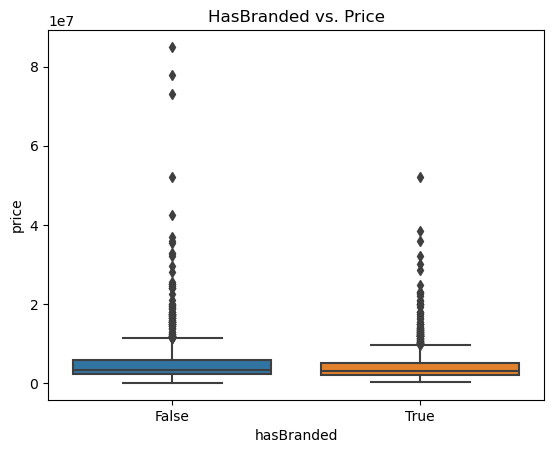

In [396]:
sb.boxplot(data=df, x='hasBranded', y='price')
plt.title('HasBranded vs. Price')
plt.show()

In [397]:
#Markasız ilanlarda çok fazla aykırı değer var. Bunları model bilsin.
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df['is_outlier_price'] = (df['price'] > upper_bound).astype(int)

In [398]:
# Tier analizi
tier_rate = df.groupby('tier')['hasBranded'].mean()
print("Her Tier için hasBranded ortalaması:\n", tier_rate)

Her Tier için hasBranded ortalaması:
 tier
2   1
3   0
4   1
Name: hasBranded, dtype: float64


In [399]:
# tier'a göre markalı oran 1 veya 0 mı?
tier_brand_ratio = df.groupby('tier')['hasBranded'].mean()
df['tier_brand_ratio'] = df['tier'].map(tier_brand_ratio)
df['tier_is_branded_only'] = ((df['tier_brand_ratio'] == 1.0) | (df['tier_brand_ratio'] == 0.0)).astype(int)


In [400]:
# Bazı ilçeler markalı ilanlara daha yatkın. Bu trendi modele öğret.
county_brand_ratio = df.groupby('county_name')['hasBranded'].mean()
df['county_brand_ratio'] = df['county_name'].map(county_brand_ratio)


In [401]:
# Property_type bazında markalı ilan (hasBranded) oranını hesapla
branded_ratio = df.groupby('property_type')['hasBranded'].mean()

# Bu oranı ana veriyle birleştir
df['property_type_branded_ratio'] = df['property_type'].map(branded_ratio)


In [402]:
df['property_type_branded_ratio']

0      1 
1      1 
2      1 
3      1 
4      1 
       ..
2152   1 
2153   1 
2154   1 
2155   1 
2156   1 
Name: property_type_branded_ratio, Length: 2157, dtype: float64

In [403]:
df['property_type_branded_ratio'].unique()


array([0.5474732 , 0.56464812, 0.4       , 0.83333333, 0.29787234,
       0.0952381 , 0.        , 0.5       ])

In [404]:
df['property_type_branded_ratio'].value_counts()

property_type_branded_ratio
1    1306
1     611
0     155
0      47
0      21
0       9
1       6
0       2
Name: count, dtype: int64

In [405]:
df.groupby('property_type')['property_type_branded_ratio'].value_counts()


property_type  property_type_branded_ratio
Bina           0                                21
Bungalov       0                                 2
Daire          1                              1306
Konut Ticaret  0                                 1
Köy Evi        0                                 1
Köşk           0                                 2
Müstakil Ev    0                               155
Prefabrik      0                                 3
Tarla          0                                 1
Villa          1                               611
Yazlık         0                                47
Çiftlik Evi    1                                 6
İmarlı Konut   0                                 1
Name: count, dtype: int64

In [406]:
df.columns.tolist()

['listingId',
 'title',
 'description',
 'price',
 'currency',
 'room',
 'livingRoom',
 'bathRoom',
 'mapLocation',
 'streetView',
 'floor',
 'age',
 'credit',
 'barter',
 'rental',
 'furnished',
 'firm',
 'fee',
 'roomAndLivingRoom',
 'onlineVisit',
 'hasBranded',
 'registerState',
 'image_count',
 'bulunan_yonler',
 'property_type',
 'Contact',
 'inAttributes_count',
 'outAttributes_count',
 'locationAttributes_count',
 'inAttributes_count_is_missing',
 'outAttributes_count_is_missing',
 'locationAttributes_count_is_missing',
 'price_category',
 'fee_is_missing',
 'days_since_update',
 'Stale_corrected',
 'duration',
 'area_name',
 'county_name',
 'city_name',
 'tier',
 'latitude',
 'longitude',
 'distance_to_sakarya_center_km',
 'distance_to_karasu_km',
 'distance_to_sapanca_km',
 'distance_to_sakarya_university_km',
 'sakarya_center_category',
 'karasu_category',
 'sapanca_category',
 'sakarya_university_category',
 'floorName',
 'floorCount',
 'floorNameFloat',
 'floorCountFloat',

In [407]:
import pandas as pd

# Tüm sütunların gösterilmesi için ayar
pd.set_option('display.max_rows', None)

# Null değer sayısını yazdır
print(df.isnull().sum())


listingId                                 0
title                                     0
description                              76
price                                     0
currency                                  3
room                                      0
livingRoom                                0
bathRoom                                  0
mapLocation                               0
streetView                                0
floor                                     3
age                                       0
credit                                    0
barter                                    0
rental                                    0
furnished                                 0
firm                                   2157
fee                                    1861
roomAndLivingRoom                         0
onlineVisit                               0
hasBranded                                0
registerState                           118
image_count                     

In [408]:
df = df.drop(columns=['firm', 'floor', 'streetView', 'island','parcel', 'rental'])

In [409]:
df.shape

(2157, 69)

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157 entries, 0 to 2156
Data columns (total 69 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   listingId                            2157 non-null   object 
 1   title                                2157 non-null   object 
 2   description                          2081 non-null   object 
 3   price                                2157 non-null   int64  
 4   currency                             2154 non-null   object 
 5   room                                 2157 non-null   int64  
 6   livingRoom                           2157 non-null   int64  
 7   bathRoom                             2157 non-null   int64  
 8   mapLocation                          2157 non-null   object 
 9   age                                  2157 non-null   Int64  
 10  credit                               2157 non-null   bool   
 11  barter                        

In [411]:
df.to_csv("modeloncesi_veri.csv", index=False)

In [412]:
df = df.drop(columns=['title', 'description', 'currency', 'mapLocation', 'Contact', 'fee','city_name',
                      'latitude', 'longitude', 'rental_currency_code','yapi','listingId'])

In [413]:
df.shape

(2157, 57)

In [414]:
df.to_csv("modelhazir_veri.csv", index=False)

# Model çalışmaları sırasında eklenmesi gerekliliği ile karşılaşılan sütunlar 

#### kategorik verilerle çalışamayan algoritmalar için bazı sütunların sayısal verilere dönüştürülmesi 
örn floorName'in sayısallaştırılmasında floorNameFloat sütunu dikkate alınabilir

fiyat tahmininde lineer regresyon için bazı önemli sütunlara encoding işlemlerinin uygulanması 

### Label encoding

In [415]:
df['bulunan_yonler'].unique()

array(['kuzey', '', 'kuzey, dogu, bati', 'bati', 'kuzey, bati', 'dogu',
       'kuzey, dogu', 'dogu, bati'], dtype=object)

In [416]:
# Boş değerleri 'Belirtilmemiş' olarak güncelle
df['bulunan_yonler'] = df['bulunan_yonler'].replace('', 'Belirtilmemiş')

# Label Encoding sözlüğü (mantıklı sıralama ile)
direction_map = {
    'kuzey, dogu, bati': 7,
    'dogu, bati': 6,
    'kuzey, dogu': 5,
    'kuzey, bati': 4,
    'dogu': 3,
    'bati': 2,
    'kuzey': 1,
    'Belirtilmemiş': 0  # Eski boş değerler
}

In [417]:
# Sözlüğü kullanarak yeni bir sütun oluştur
df['direction_encoded'] = df['bulunan_yonler'].map(direction_map)

In [418]:
# bulunan_yonler sütunu sayısallaştırılmalı 
# Eğer hücre NaN değilse, ',' sayısını say + 1; değilse 0 yaz
df['yon_sayisi'] = df['bulunan_yonler'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

In [419]:
df['yapiDurumu'].unique()

array(['İkinci El', 'Sıfır', 'Yapım Aşamasında'], dtype=object)

In [420]:
# yapiDurumu sütunu da label encoding ile sayısallaştırılırsa;
# Özel label encoding sözlüğü
yapi_durumu_map = {
    'İkinci El': 0,
    'Yapım Aşamasında': 1,
    'Sıfır': 2
}

# Sütunu bu haritaya göre dönüştür
df['yapiDurumu_encoded'] = df['yapiDurumu'].map(yapi_durumu_map)


In [421]:
df['yakit'].unique()

array(['Doğalgaz', 'Elektrik', None, 'Kömür-Odun', 'Yerden Isıtma',
       'Akaryakıt'], dtype=object)

In [422]:
df['isitma'].unique()

array(['Kombi', 'Merkezi Sistem', 'Yerden Isıtma', 'Belirtilmemiş',
       'Soba', 'Isıtma Yok', None, 'Klima', 'Doğalgaz Sobası',
       'Güneş Enerjisi', 'Isı Pompası', 'Kat Kaloriferi',
       'Jeotermal Isıtma'], dtype=object)

In [423]:
df['yakit'] = df['yakit'].fillna('Belirtilmemiş')
df['isitma'] = df['isitma'].fillna('Belirtilmemiş')

Bu sütunlardan yakit sütununun kullanılmasına karar verildi (çünkü isitma için çok fazla farklı değer vardı). label encoding yapıyoruz.

In [424]:
# Isıtma türlerini puanlayan sözlük (label encoding gibi çalışır)
heating_map = {
    'Yerden Isıtma': 5,
    'Doğalgaz': 4,
    'Akaryakıt': 3,
    'Elektrik': 2,
    'Kömür-Odun': 1,
    'Belirtilmemiş': 0  # None olan verilerin yerine geçiyor
}

In [425]:
# Label encoding uygulayalım
df['yakit_encoded'] = df['yakit'].map(heating_map)

### One-hot encoding işleminde;
değerlerin hepsi one-hot kodlanırsa sütunlar arasında doğrusal ilişki olur bu da istatistiksel modellerde (lineer regresyon gibi doğrusal modellerde) sorun çıkartır. Alfabetik sıraya göre ilk sütun diğerlerinden tahmin edilebilir olur, bunu drop_first=True yaparak dikkate almıyoruz.

drop='first', bir kategoriyi bilinçli olarak atar. Amaç:
🔺 "Dummy Variable Trap"’ten kaçmak (yani değişkenler arasında çoklu doğrusal bağlantı – multicollinearity – oluşturmamak).

In [426]:
df['usage_name'].unique()

array(['Boş', 'Mülk Sahibi', 'Kiracılı', 'Belirtilmemiş'], dtype=object)

In [427]:
encoded = pd.get_dummies(df['usage_name'], prefix='usage', drop_first=True)
df = pd.concat([df, encoded], axis=1)

Örneğin burada da residence_name sütununda none değerler için atanan 'Belirtilmemiş' değeri alfabetik olarak başta gelmez. Bu yüzden
drop_first=False ile birlikte Belirtilmemiş sütunu manuel olarak çıkartılır.

In [428]:
df['residence_name_copy'] = df['residence_name'].copy()

In [429]:
df['residence_name'].unique()

array(['Belirtilmemiş', 'Dubleks', 'Tripleks', 'Bahçe Dubleksi',
       'Bahçe Katı', 'Çatı Dubleksi', 'İkiz Ev', 'Ters Dubleks',
       'Ara Kat Dubleks'], dtype=object)

In [430]:
# residence_name sütununu one-hot encode et
residence_encoded = pd.get_dummies(df['residence_name_copy'], prefix='residence', drop_first=False)

# 'residence_Belirtilmemiş' sütununu manuel olarak çıkar
if 'residence_Belirtilmemiş' in residence_encoded.columns:
    residence_encoded = residence_encoded.drop(columns=['residence_Belirtilmemiş'])

# Orijinal df'den residence_name sütununu kaldır ve encoded olanlarla birleştir
df = pd.concat([df.drop(columns=['residence_name_copy']), residence_encoded], axis=1)

In [431]:
df['property_type'].unique()

array(['Daire', 'Villa', 'Müstakil Ev', 'Çiftlik Evi', 'Yazlık', 'Bina',
       'Köy Evi', 'Konut Ticaret', 'İmarlı Konut', 'Tarla', 'Bungalov',
       'Prefabrik', 'Köşk'], dtype=object)

In [432]:
# 'property_type' sütunu için One-Hot Encoding uygulayalım
property_type_encoded = pd.get_dummies(df['property_type'], prefix='property', drop_first=False)

# Orijinal dataframe ile encoded olanları birleştir
df = pd.concat([df, property_type_encoded], axis=1)

In [433]:
df.shape

(2157, 85)

In [434]:
# Tüm sütun isimlerini görmek için:
print(df.columns)

Index(['price', 'room', 'livingRoom', 'bathRoom', 'age', 'credit', 'barter',
       'furnished', 'roomAndLivingRoom', 'onlineVisit', 'hasBranded',
       'registerState', 'image_count', 'bulunan_yonler', 'property_type',
       'inAttributes_count', 'outAttributes_count', 'locationAttributes_count',
       'inAttributes_count_is_missing', 'outAttributes_count_is_missing',
       'locationAttributes_count_is_missing', 'price_category',
       'fee_is_missing', 'days_since_update', 'Stale_corrected', 'duration',
       'area_name', 'county_name', 'tier', 'distance_to_sakarya_center_km',
       'distance_to_karasu_km', 'distance_to_sapanca_km',
       'distance_to_sakarya_university_km', 'sakarya_center_category',
       'karasu_category', 'sapanca_category', 'sakarya_university_category',
       'floorName', 'floorCount', 'floorNameFloat', 'floorCountFloat',
       'floorRatio', 'usage_name', 'yakit', 'isitma', 'yapiDurumu', 'netSqm',
       'grossSqm', 'sqm_fark', 'residence_name', 'hou